In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [2]:
df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

/tmp/ipykernel_19/3504100315.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')


In [3]:
def optimize_memory(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == object: 
            continue

        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    return df

In [4]:
df=optimize_memory(df)

/tmp/ipykernel_19/2883683459.py:15: RuntimeWarning: invalid value encountered in less
  if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:


In [5]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

    int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0  13.990000   123.029999     C        C4  ...                            NaN   
1  11.990000   820.280029     C        C1  ...                            NaN   
2  10.780000   432.660004     B        B4  ...                            NaN   
3  14.850000   829.900024     C        C5  ...                            NaN   
4  22.450001   289.910004     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [6]:
df.shape

(2260701, 151)

In [7]:
# Convert all object (string) columns to lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().values

array([2195456, 2260701,      33,      33,      33,      33,      33,
            33,      33,      33,  167002,  146940,      33,      37,
            33,      33,      33,      33,      33, 2134636,      33,
         23359,      34,      33,    1744,      62,      62,      33,
            33,      63, 1158535, 1901545,      62,      62,      33,
          1835,      62,      33,      33,      33,      33,      33,
            33,      33,      33,      33,      33,    2460,      33,
       1345343,     105,      33,      33,     178, 1679926,      33,
            33, 2139991, 2139995, 2144971,      62,   70309,   70309,
        866163,  866162,  866162,  866162,  909957,  866162, 1068883,
        866162,  866162,  866162,  866381,   70309,  866162,  866163,
        866163,   50063,   70379,   74968,   76104,     178,      62,
        139104,   70310,   70310,   70309,   50063,   73445, 1741000,
        295468, 1520342,   70309,   70309,   70309,   58623,   70309,
         70309,   70

In [10]:
df=df.loc[~(df['loan_status'].isna())] #Because loan_status is our target variable, we won't impute it

In [11]:
df_navalues=pd.DataFrame({'Missing count':df.isnull().sum(),'Percentage':(df.isnull().sum()/df.shape[0])*100},index=df.isnull().sum().index)

In [12]:
df_navalues.head()

Missing count  Percentage
id                     2195456   97.115366
member_id              2260668  100.000000
loan_amnt                    0    0.000000
funded_amnt                  0    0.000000
funded_amnt_inv              0    0.000000

In [13]:
np.array(df.columns).shape

(151,)

In [14]:
df.drop(columns=['id','member_id'],inplace=True)

In [15]:
df_navalues.drop(['id','member_id'],axis=0,inplace=True)

In [16]:
df_navalues

Missing count  Percentage
loan_amnt                          0    0.000000
funded_amnt                        0    0.000000
funded_amnt_inv                    0    0.000000
term                               0    0.000000
int_rate                           0    0.000000
...                              ...         ...
settlement_status            2226422   98.485138
settlement_date              2226422   98.485138
settlement_amount            2226422   98.485138
settlement_percentage        2226422   98.485138
settlement_term              2226422   98.485138

[149 rows x 2 columns]

In [17]:
df_navalues.loc[df_navalues['Percentage']>=50]

Missing count  Percentage
desc                                              2134603   94.423551
mths_since_last_delinq                            1158502   51.246003
mths_since_last_record                            1901512   84.112837
next_pymnt_d                                      1345310   59.509402
mths_since_last_major_derog                       1679893   74.309585
annual_inc_joint                                  2139958   94.660428
dti_joint                                         2139962   94.660605
verification_status_joint                         2144938   94.880717
mths_since_recent_bc_dlq                          1740967   77.011175
mths_since_recent_revol_delinq                    1520309   67.250432
revol_bal_joint                                   2152648   95.221766
sec_app_fico_range_low                            2152647   95.221722
sec_app_fico_range_high                           2152647   95.221722
sec_app_earliest_cr_line                          2152647   95.221722
sec_app_inq_last_6mths                            2152647   95.221722
sec_app_mort_acc                                  2152647   95.221722
sec_app_open_acc                                  2152647   95.221722
sec_app_revol_util                                2154484   95.302981
sec_app_open_act_il                               2152647   95.221722
sec_app_num_rev_accts                             2152647   95.221722
sec_app_chargeoff_within_12_mths                  2152647   95.221722
sec_app_collections_12_mths_ex_med                2152647   95.221722
sec_app_mths_since_last_major_derog               2224726   98.410116
hardship_type                                     2249751   99.517090
hardship_reason                                   2249751   99.517090
hardship_status                                   2249751   99.517090
deferral_term                                     2249751   99.517090
hardship_amount                                   2249751   99.517090
hardship_start_date                               2249751   99.517090
hardship_end_date                                 2249751   99.517090
payment_plan_start_date                           2249751   99.517090
hardship_length                                   2249751   99.517090
hardship_dpd                                      2249751   99.517090
hardship_loan_status                              2249751   99.517090
orig_projected_additional_accrued_interest        2252017   99.617325
hardship_payoff_balance_amount                    2249751   99.517090
hardship_last_payment_amount                      2249751   99.517090
debt_settlement_flag_date                         2226422   98.485138
settlement_status                                 2226422   98.485138
settlement_date                                   2226422   98.485138
settlement_amount                                 2226422   98.485138
settlement_percentage                             2226422   98.485138
settlement_term                                   2226422   98.485138

In [18]:
nan_col_50_per=list(df_navalues.loc[df_navalues['Percentage']>=50].index)

In [19]:
df_navalues.loc[df_navalues.index.isin(nan_col_50_per)]

Missing count  Percentage
desc                                              2134603   94.423551
mths_since_last_delinq                            1158502   51.246003
mths_since_last_record                            1901512   84.112837
next_pymnt_d                                      1345310   59.509402
mths_since_last_major_derog                       1679893   74.309585
annual_inc_joint                                  2139958   94.660428
dti_joint                                         2139962   94.660605
verification_status_joint                         2144938   94.880717
mths_since_recent_bc_dlq                          1740967   77.011175
mths_since_recent_revol_delinq                    1520309   67.250432
revol_bal_joint                                   2152648   95.221766
sec_app_fico_range_low                            2152647   95.221722
sec_app_fico_range_high                           2152647   95.221722
sec_app_earliest_cr_line                          2152647   95.221722
sec_app_inq_last_6mths                            2152647   95.221722
sec_app_mort_acc                                  2152647   95.221722
sec_app_open_acc                                  2152647   95.221722
sec_app_revol_util                                2154484   95.302981
sec_app_open_act_il                               2152647   95.221722
sec_app_num_rev_accts                             2152647   95.221722
sec_app_chargeoff_within_12_mths                  2152647   95.221722
sec_app_collections_12_mths_ex_med                2152647   95.221722
sec_app_mths_since_last_major_derog               2224726   98.410116
hardship_type                                     2249751   99.517090
hardship_reason                                   2249751   99.517090
hardship_status                                   2249751   99.517090
deferral_term                                     2249751   99.517090
hardship_amount                                   2249751   99.517090
hardship_start_date                               2249751   99.517090
hardship_end_date                                 2249751   99.517090
payment_plan_start_date                           2249751   99.517090
hardship_length                                   2249751   99.517090
hardship_dpd                                      2249751   99.517090
hardship_loan_status                              2249751   99.517090
orig_projected_additional_accrued_interest        2252017   99.617325
hardship_payoff_balance_amount                    2249751   99.517090
hardship_last_payment_amount                      2249751   99.517090
debt_settlement_flag_date                         2226422   98.485138
settlement_status                                 2226422   98.485138
settlement_date                                   2226422   98.485138
settlement_amount                                 2226422   98.485138
settlement_percentage                             2226422   98.485138
settlement_term                                   2226422   98.485138

In [20]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt  funded_amnt  funded_amnt_inv        term   int_rate  \
0     3600.0       3600.0           3600.0   36 months  13.990000   
1    24700.0      24700.0          24700.0   36 months  11.990000   
2    20000.0      20000.0          20000.0   60 months  10.780000   
3    35000.0      35000.0          35000.0   60 months  14.850000   
4    10400.0      10400.0          10400.0   60 months  22.450001   

   installment grade sub_grade                    emp_title emp_length  ...  \
0   123.029999     c        c4                      leadman  10+ years  ...   
1   820.280029     c        c1                     engineer  10+ years  ...   
2   432.660004     b        b4                 truck driver  10+ years  ...   
3   829.900024     c        c5  information systems officer  10+ years  ...   
4   289.910004     f        f1          contract specialist    3 years  ...   

  hardship_payoff_balance_amount  hardship_last_payment_amount  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

  disbursement_method debt_settlement_flag debt_settlement_flag_date  \
0                cash                    n                       NaN   
1                cash                    n                       NaN   
2                cash                    n                       NaN   
3                cash                    n                       NaN   
4                cash                    n                       NaN   

  settlement_status settlement_date settlement_amount settlement_percentage  \
0               NaN             NaN               NaN                   NaN   
1               NaN             NaN               NaN                   NaN   
2               NaN             NaN               NaN                   NaN   
3               NaN             NaN               NaN                   NaN   
4               NaN             NaN               NaN                   NaN   

  settlement_term  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 149 columns]

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
nan_col_50_per

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status'

In [23]:
normal_cols=[x for x in df.columns if x not in nan_col_50_per]

In [24]:
df_navalues.loc[(df_navalues.index.isin(normal_cols)) & (df_navalues['Missing count']>0)]

Missing count  Percentage
emp_title                          166969    7.385826
emp_length                         146907    6.498389
annual_inc                              4    0.000177
title                               23326    1.031819
zip_code                                1    0.000044
...                                   ...         ...
tax_liens                             105    0.004645
tot_hi_cred_lim                     70276    3.108639
total_bal_ex_mort                   50030    2.213063
total_bc_limit                      50030    2.213063
total_il_high_credit_limit          70276    3.108639

[69 rows x 2 columns]

In [25]:
df[normal_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Columns: 106 entries, loan_amnt to debt_settlement_flag
dtypes: float32(83), object(23)
memory usage: 1.1+ GB


In [26]:
df[normal_cols].describe().T

count           mean            std     min  \
loan_amnt                   2260668.0   15046.930664    9199.281250  500.00   
funded_amnt                 2260668.0   15041.664062    9197.460938  500.00   
funded_amnt_inv             2260668.0   15023.437500    9205.149414    0.00   
int_rate                    2260668.0      13.092829       4.827580    5.31   
installment                 2260668.0     445.806824     266.971100    4.93   
...                               ...            ...            ...     ...   
tax_liens                   2260563.0       0.046771       0.375209    0.00   
tot_hi_cred_lim             2190392.0  178242.765625  181476.296875    0.00   
total_bal_ex_mort           2210638.0   51022.933594   49861.382812    0.00   
total_bc_limit              2210638.0   23193.767578   22986.804688    0.00   
total_il_high_credit_limit  2190392.0   43732.011719   44995.347656    0.00   

                                     25%           50%            75%  \
loan_amnt                    8000.000000   12900.00000   20000.000000   
funded_amnt                  8000.000000   12875.00000   20000.000000   
funded_amnt_inv              8000.000000   12800.00000   20000.000000   
int_rate                        9.490000      12.62000      15.990000   
installment                   251.649994     377.98999     593.320007   
...                                  ...           ...            ...   
tax_liens                       0.000000       0.00000       0.000000   
tot_hi_cred_lim             50731.000000  114298.50000  257755.000000   
total_bal_ex_mort           20892.000000   37864.00000   64350.000000   
total_bc_limit               8300.000000   16300.00000   30300.000000   
total_il_high_credit_limit  15000.000000   32696.00000   58804.250000   

                                     max  
loan_amnt                   4.000000e+04  
funded_amnt                 4.000000e+04  
funded_amnt_inv             4.000000e+04  
int_rate                    3.099000e+01  
installment                 1.719830e+03  
...                                  ...  
tax_liens                   8.500000e+01  
tot_hi_cred_lim             9.999999e+06  
total_bal_ex_mort           3.408095e+06  
total_bc_limit              1.569000e+06  
total_il_high_credit_limit  2.118996e+06  

[83 rows x 8 columns]

In [27]:
df['loan_status'].value_counts()

loan_status
fully paid                                             1076751
current                                                 878317
charged off                                             268559
late (31-120 days)                                       21467
in grace period                                           8436
late (16-30 days)                                         4349
does not meet the credit policy. status:fully paid        1988
does not meet the credit policy. status:charged off        761
default                                                     40
Name: count, dtype: int64

In [28]:
df['loan_status'].isnull().sum()

0

In [29]:
# Define mapping for binary target
target_map = {
    'fully paid': 0,
    'current': 0,  # or np.nan if you want to ignore
    'in grace period': 0,
    'late (16-30 days)': 0,  # usually considered not default
    'late (31-120 days)': 1,
    'charged off': 1,
    'default': 1,
    'does not meet the credit policy. status:fully paid': 0,
    'does not meet the credit policy. status:charged off': 1
}

# Apply mapping
df['y'] = df['loan_status'].map(target_map)

# Check distribution
print(df['y'].value_counts())


y
0    1969841
1     290827
Name: count, dtype: int64


/tmp/ipykernel_19/3799908234.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['y'] = df['loan_status'].map(target_map)


In [30]:
df['y'].isnull().sum()

0

<Axes: xlabel='y'>

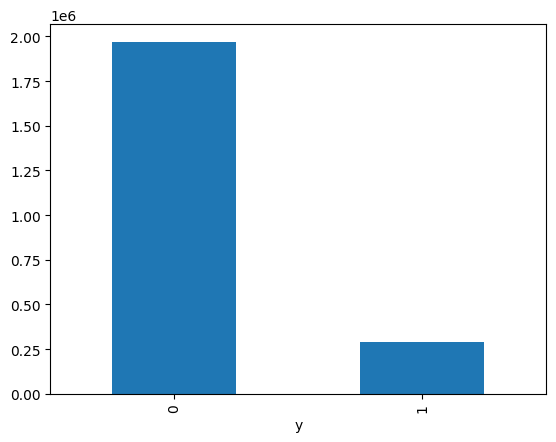

In [31]:
df['y'].value_counts().plot(kind='bar')

In [32]:
normal_cols.append('y')

In [33]:
df.drop(columns='loan_status',inplace=True)

In [34]:
normal_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',


In [35]:
normal_cols.remove('loan_status')

In [36]:
df[normal_cols]

loan_amnt  funded_amnt  funded_amnt_inv        term   int_rate  \
0           3600.0       3600.0           3600.0   36 months  13.990000   
1          24700.0      24700.0          24700.0   36 months  11.990000   
2          20000.0      20000.0          20000.0   60 months  10.780000   
3          35000.0      35000.0          35000.0   60 months  14.850000   
4          10400.0      10400.0          10400.0   60 months  22.450001   
...            ...          ...              ...         ...        ...   
2260694    24000.0      24000.0          24000.0   60 months  12.790000   
2260695    24000.0      24000.0          24000.0   60 months  10.490000   
2260696    40000.0      40000.0          40000.0   60 months  10.490000   
2260697    24000.0      24000.0          24000.0   60 months  14.490000   
2260698    14000.0      14000.0          14000.0   60 months  14.490000   

         installment grade sub_grade                    emp_title emp_length  \
0         123.029999     c        c4                      leadman  10+ years   
1         820.280029     c        c1                     engineer  10+ years   
2         432.660004     b        b4                 truck driver  10+ years   
3         829.900024     c        c5  information systems officer  10+ years   
4         289.910004     f        f1          contract specialist    3 years   
...              ...   ...       ...                          ...        ...   
2260694   543.500000     c        c1                unit operator    7 years   
2260695   515.739990     b        b3       database administrator  10+ years   
2260696   859.559998     b        b3              vice president     9 years   
2260697   564.559998     c        c4              program manager    6 years   
2260698   329.329987     c        c4  customer service technician  10+ years   

         ... pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
0        ...                  0.0        0.0        178050.0   
1        ...                  0.0        0.0        314017.0   
2        ...                  0.0        0.0        218418.0   
3        ...                  0.0        0.0        381215.0   
4        ...                  0.0        0.0        439570.0   
...      ...                  ...        ...             ...   
2260694  ...                  0.0        0.0        102517.0   
2260695  ...                  0.0        1.0        227883.0   
2260696  ...                  0.0        0.0         55970.0   
2260697  ...                  1.0        0.0         84664.0   
2260698  ...                  0.0        0.0        163804.0   

        total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0                  7746.0         2400.0                    13734.0   
1                 39475.0        79300.0                    24667.0   
2                 18696.0         6200.0                    14877.0   
3                 52226.0        62500.0                    18000.0   
4                 95768.0        20300.0                    88097.0   
...                   ...            ...                        ...   
2260694          104422.0            0.0                    52017.0   
2260695          140118.0        27900.0                   172283.0   
2260696           28398.0        12300.0                    42670.0   
2260697           62426.0        20700.0                    58764.0   
2260698           44215.0         9500.0                    34169.0   

        hardship_flag disbursement_method debt_settlement_flag  y  
0                   n                cash                    n  0  
1                   n                cash                    n  0  
2                   n                cash                    n  0  
3                   n                cash                    n  0  
4                   n                cash                    n  0  
...               ...                 ...                  ... ..  
2260694             n                cash        

In [37]:
# Object/string columns
obj_cols = df[normal_cols].select_dtypes(include='object').columns.tolist()
# Numerical columns
num_cols = df[normal_cols].select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()

In [38]:
for col in num_cols:
    if df[col].nunique() <= 10:  # check number of unique values
        print(f"\nColumn: {col}")
        print(df[col].value_counts())
        num_cols.remove(col)
        obj_cols.append(col)
print(obj_cols)
print(num_cols)


Column: policy_code
policy_code
1.0    2260668
Name: count, dtype: int64

Column: num_tl_120dpd_2m
num_tl_120dpd_2m
0.0    2105738
1.0       1219
2.0         46
3.0          5
6.0          1
7.0          1
4.0          1
Name: count, dtype: int64

Column: y
y
0    1969841
1     290827
Name: count, dtype: int64
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'policy_code', 'num_tl_120dpd_2m', 'y']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_p

In [39]:
df_sample = df.sample(100000, random_state=42)

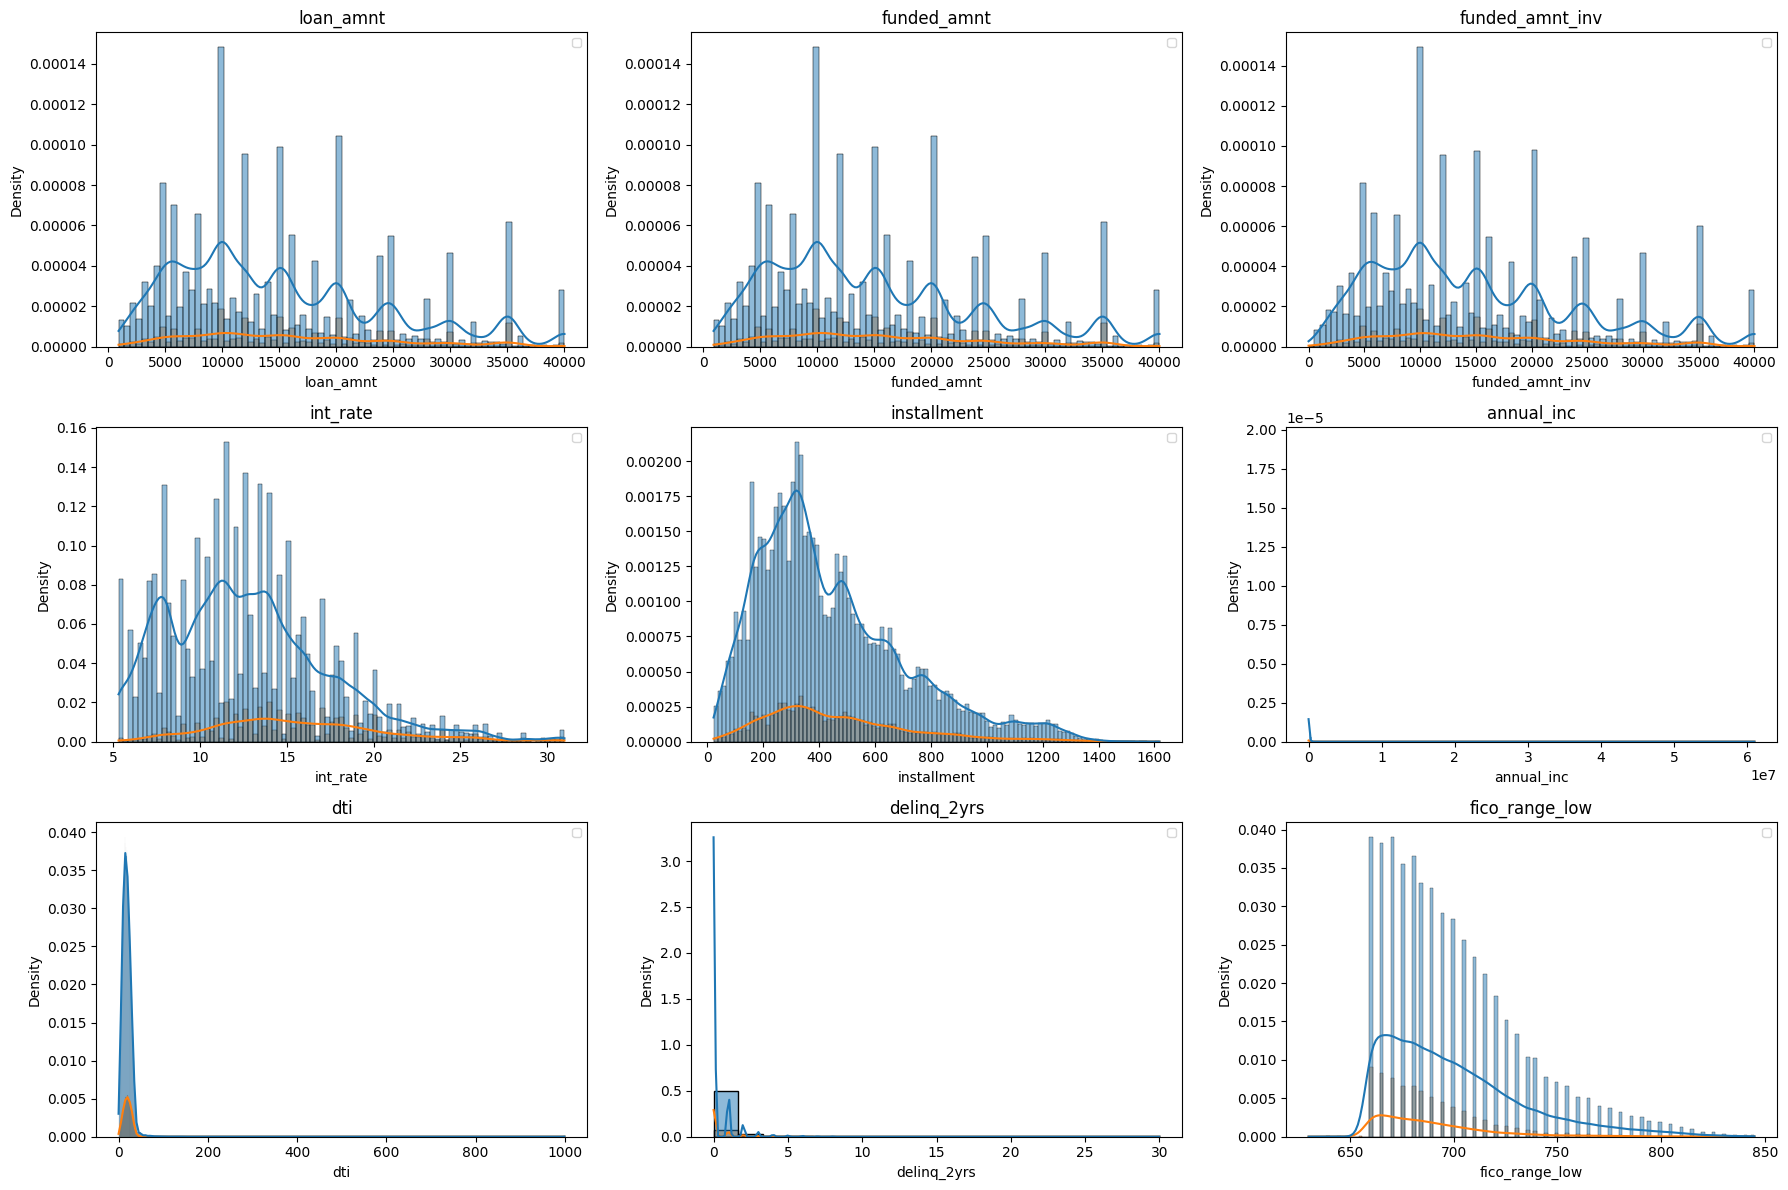

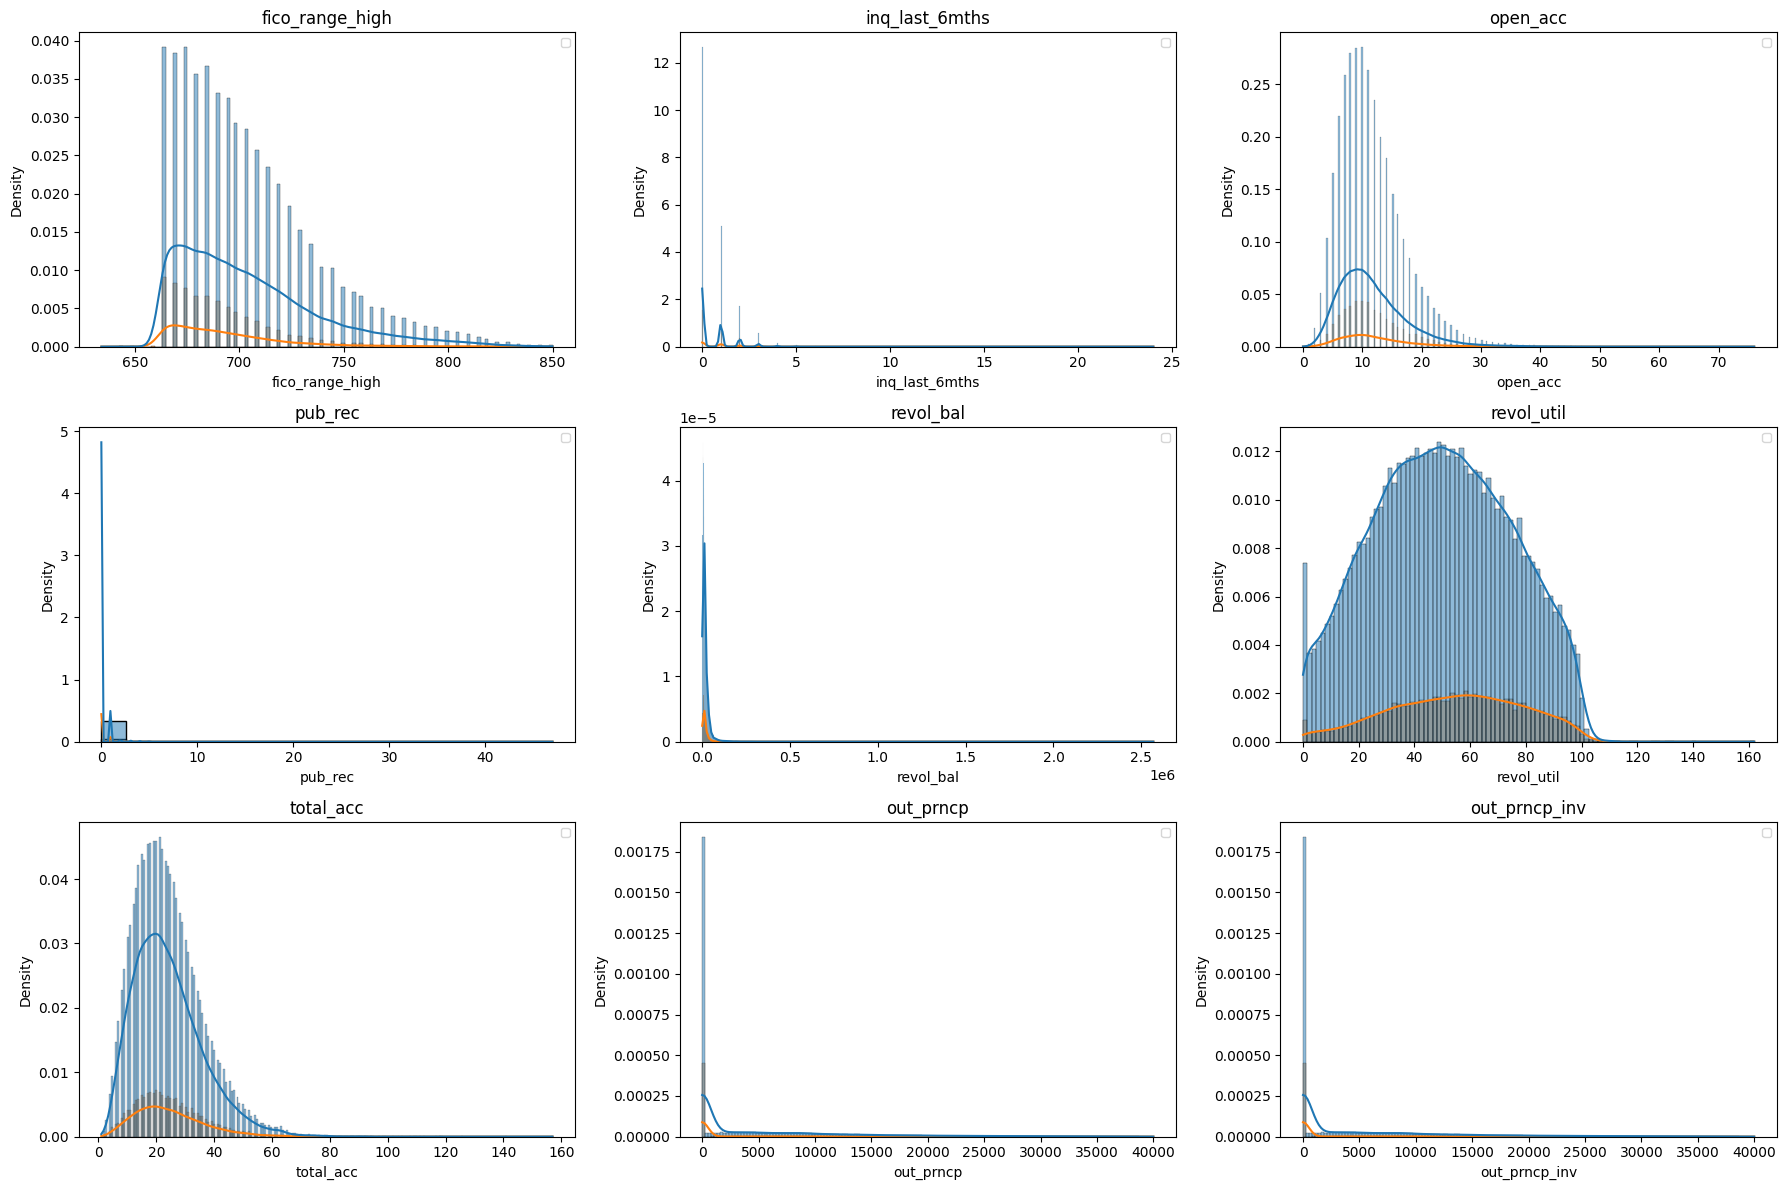

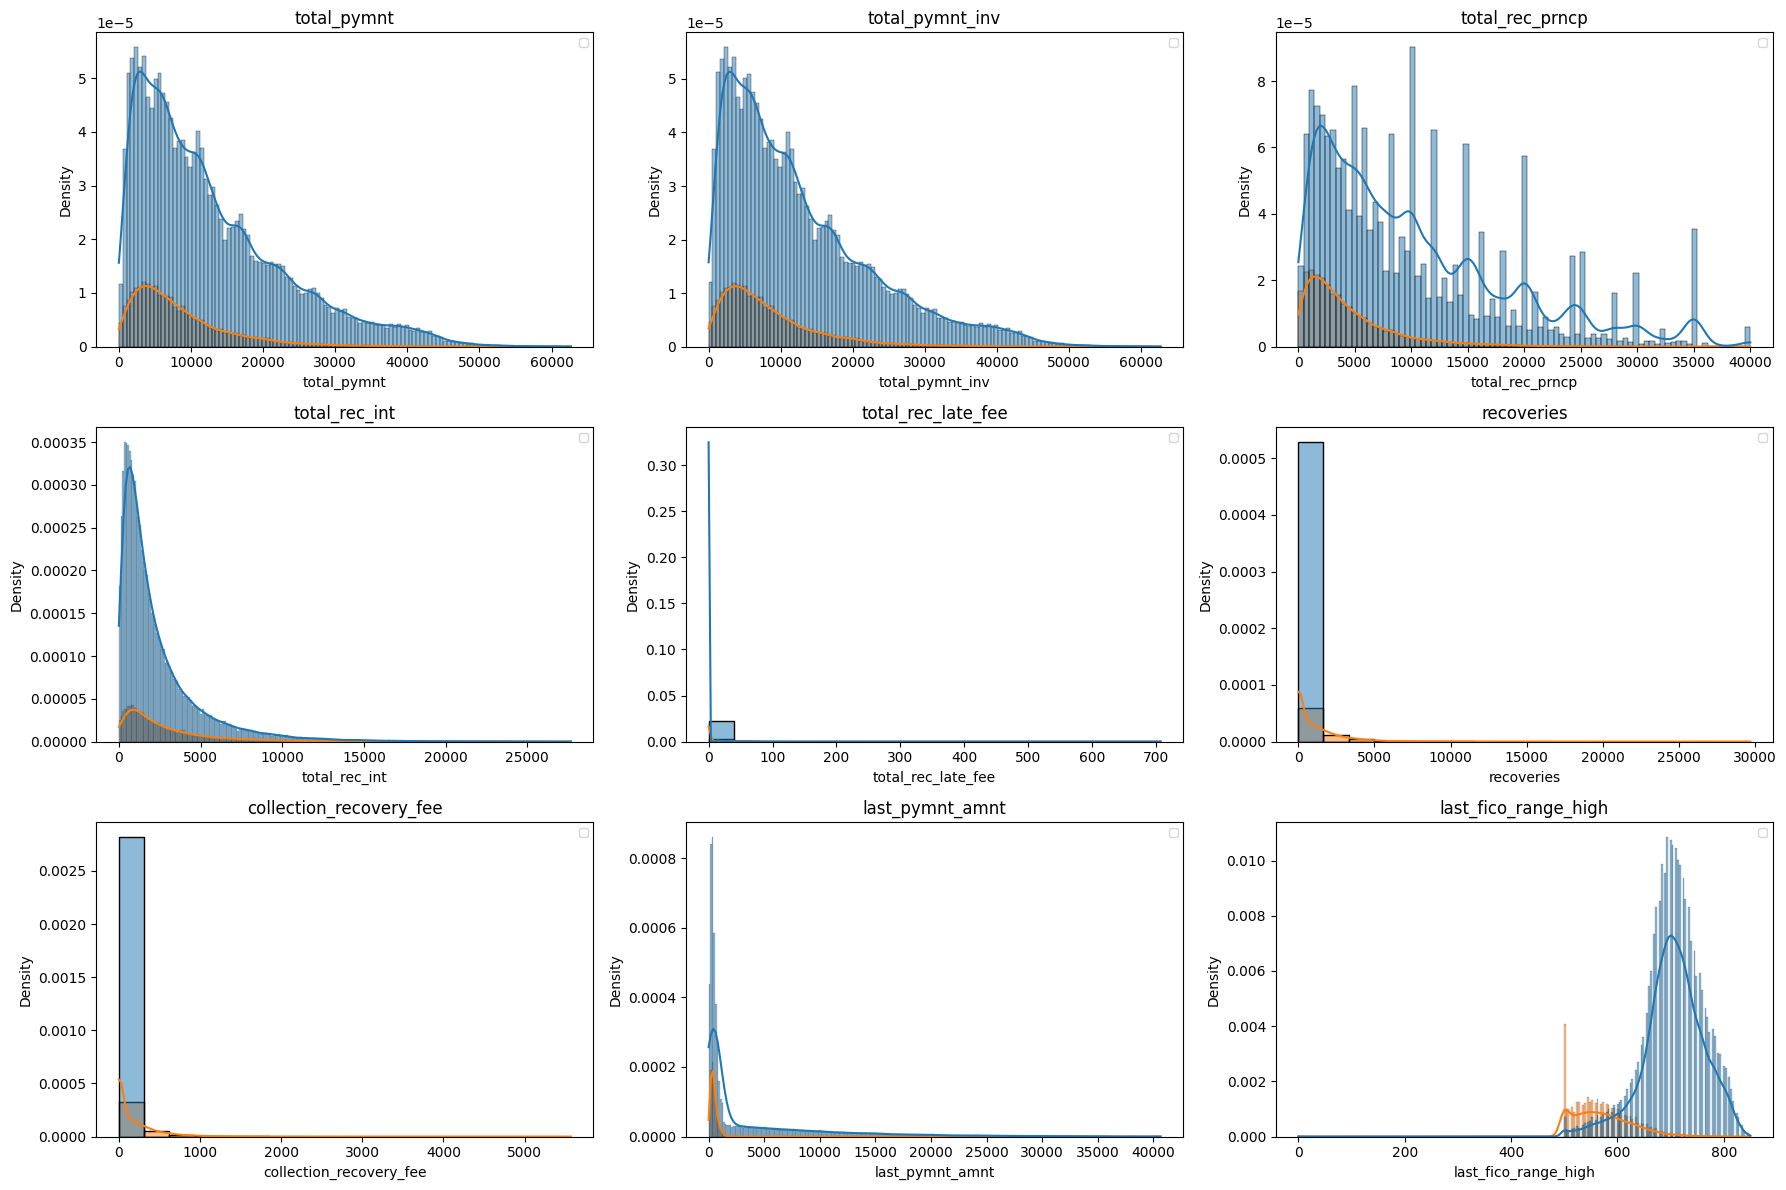

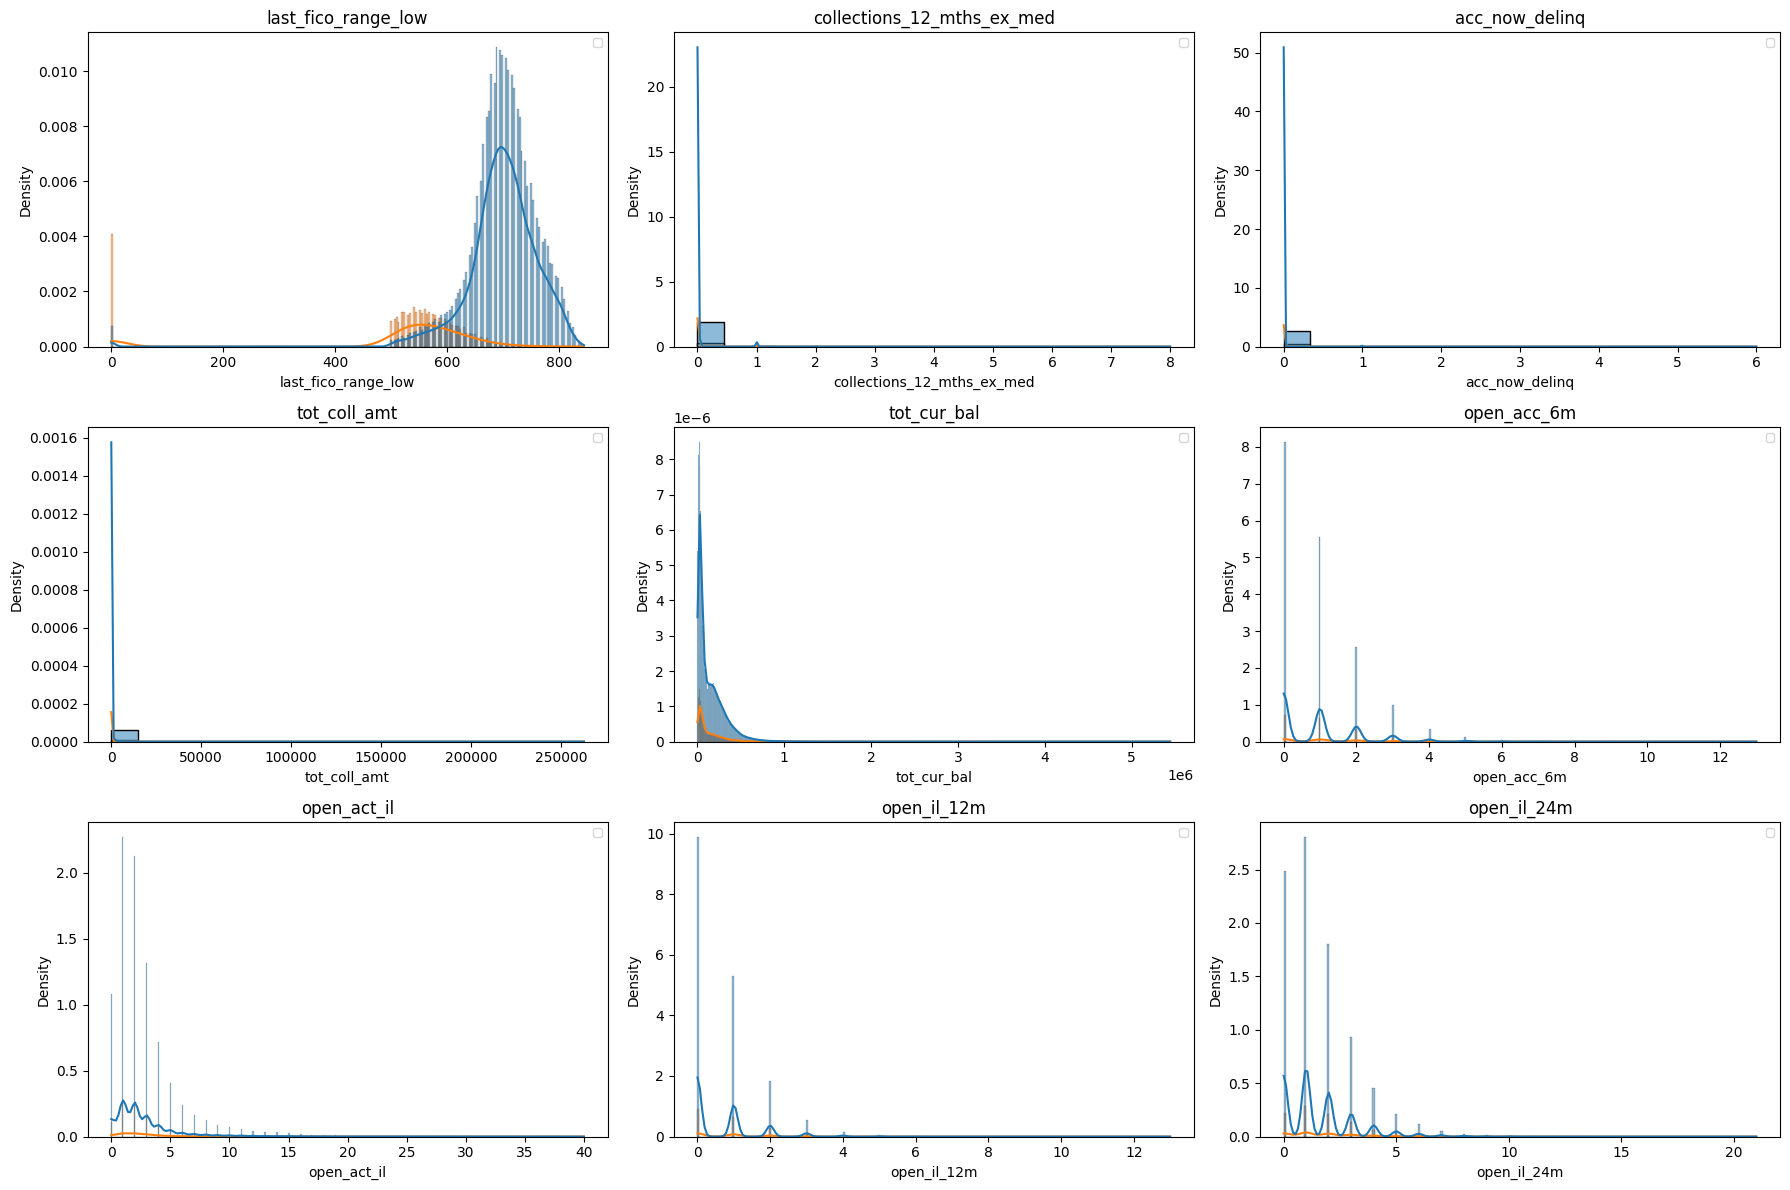

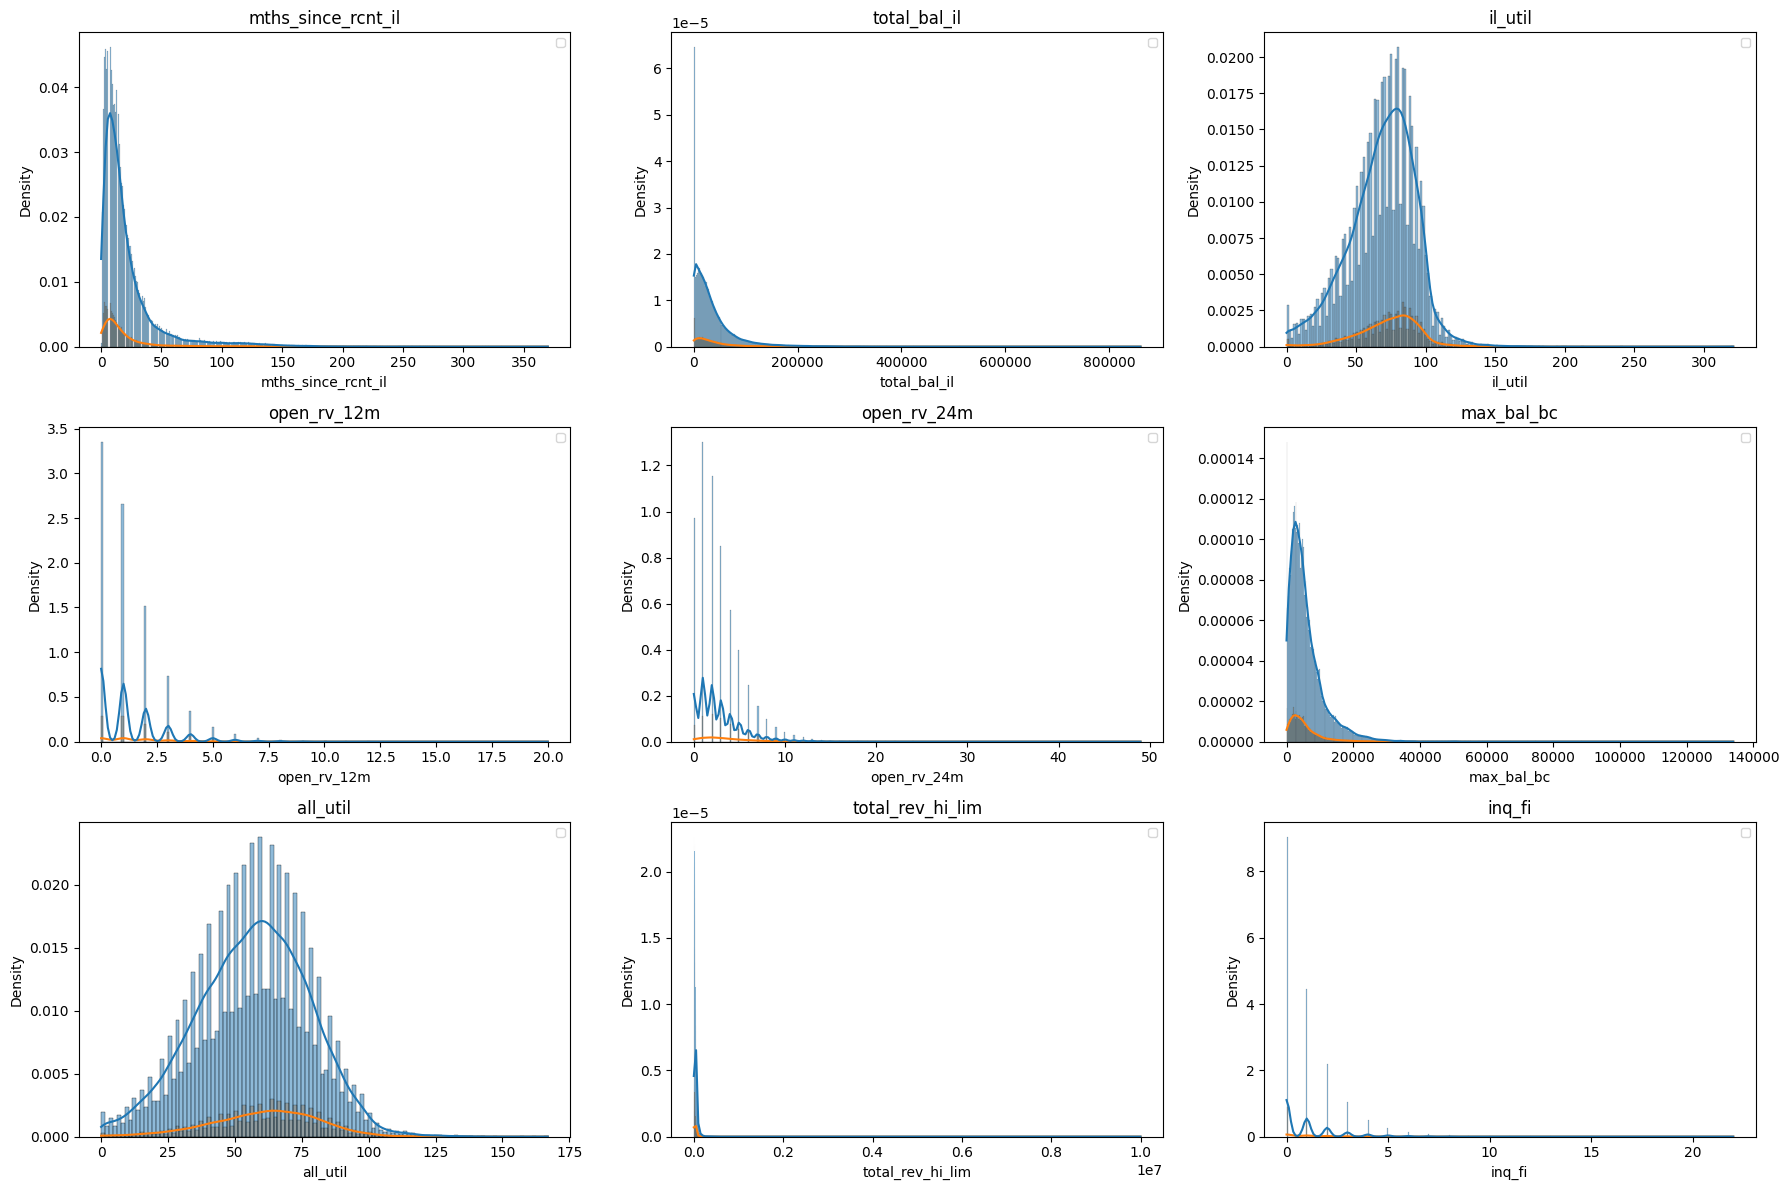

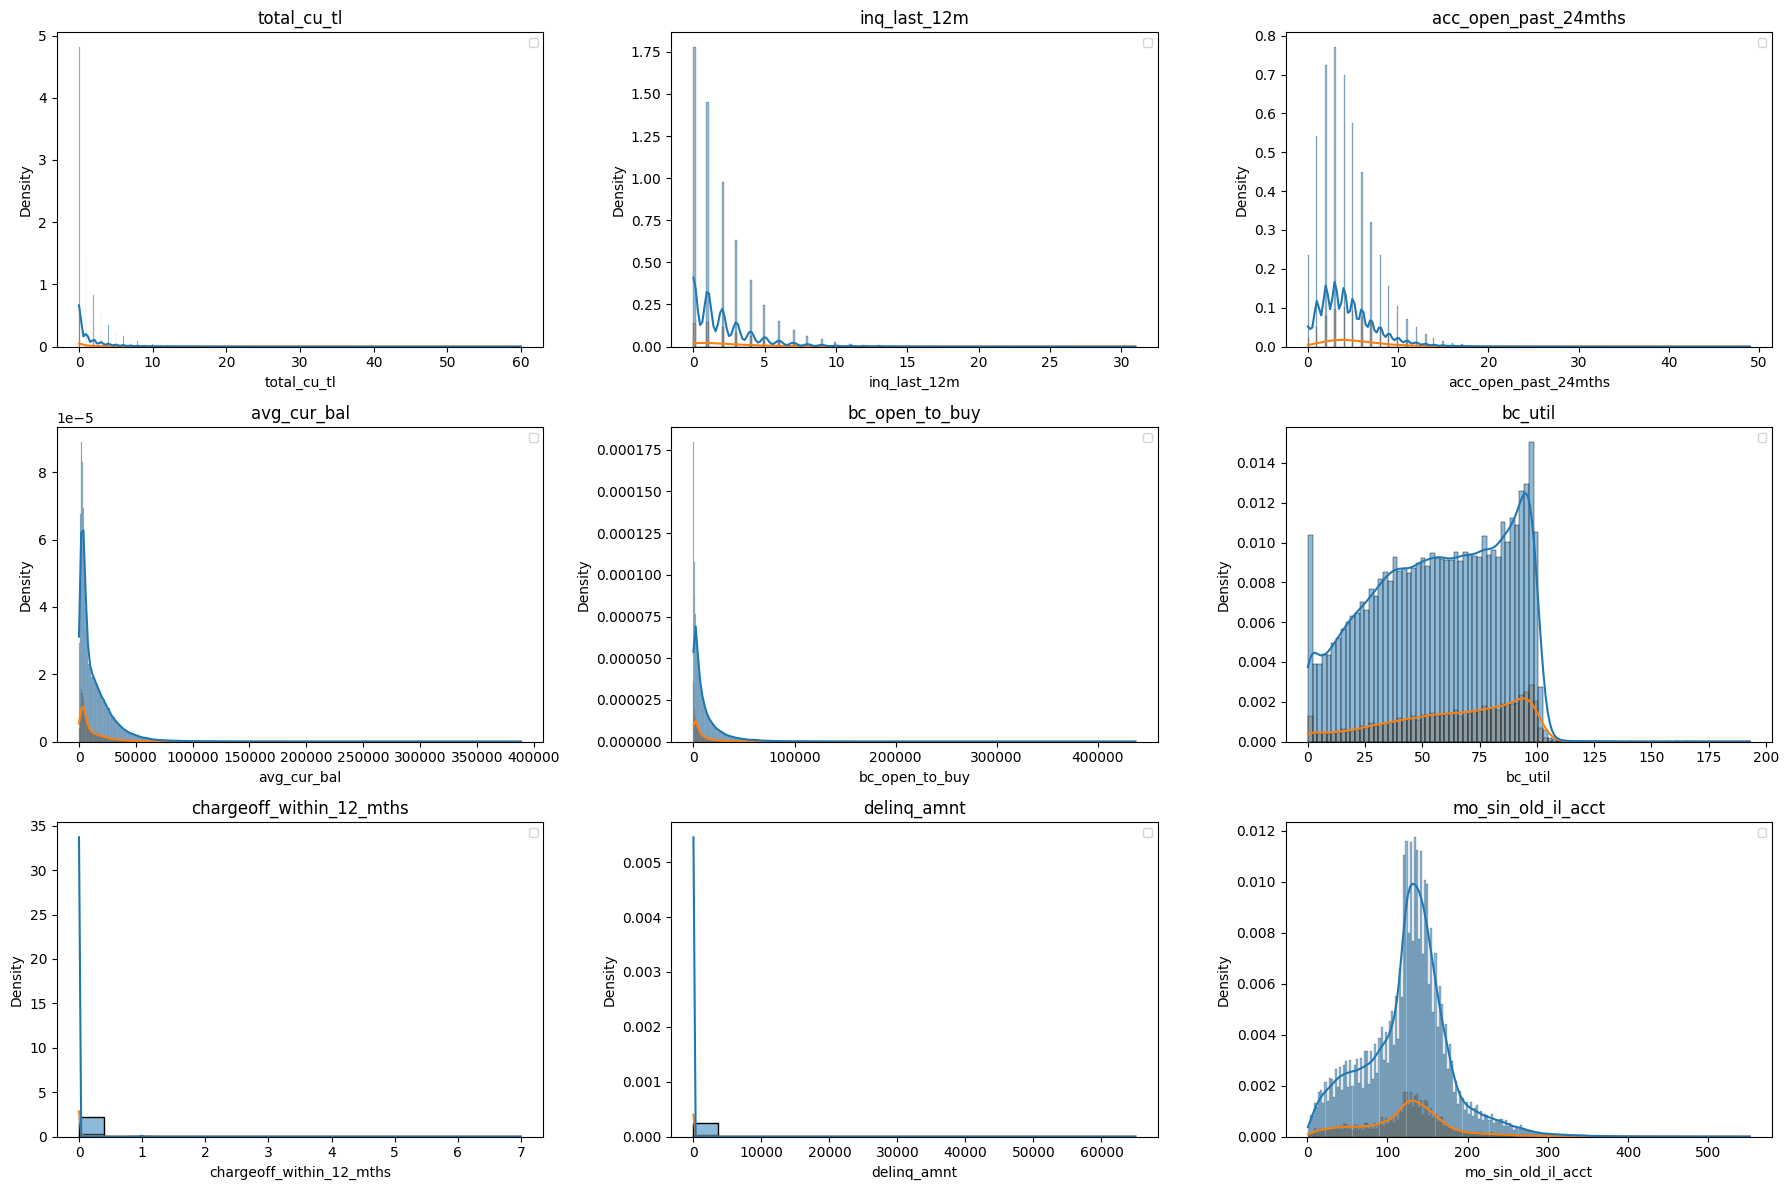

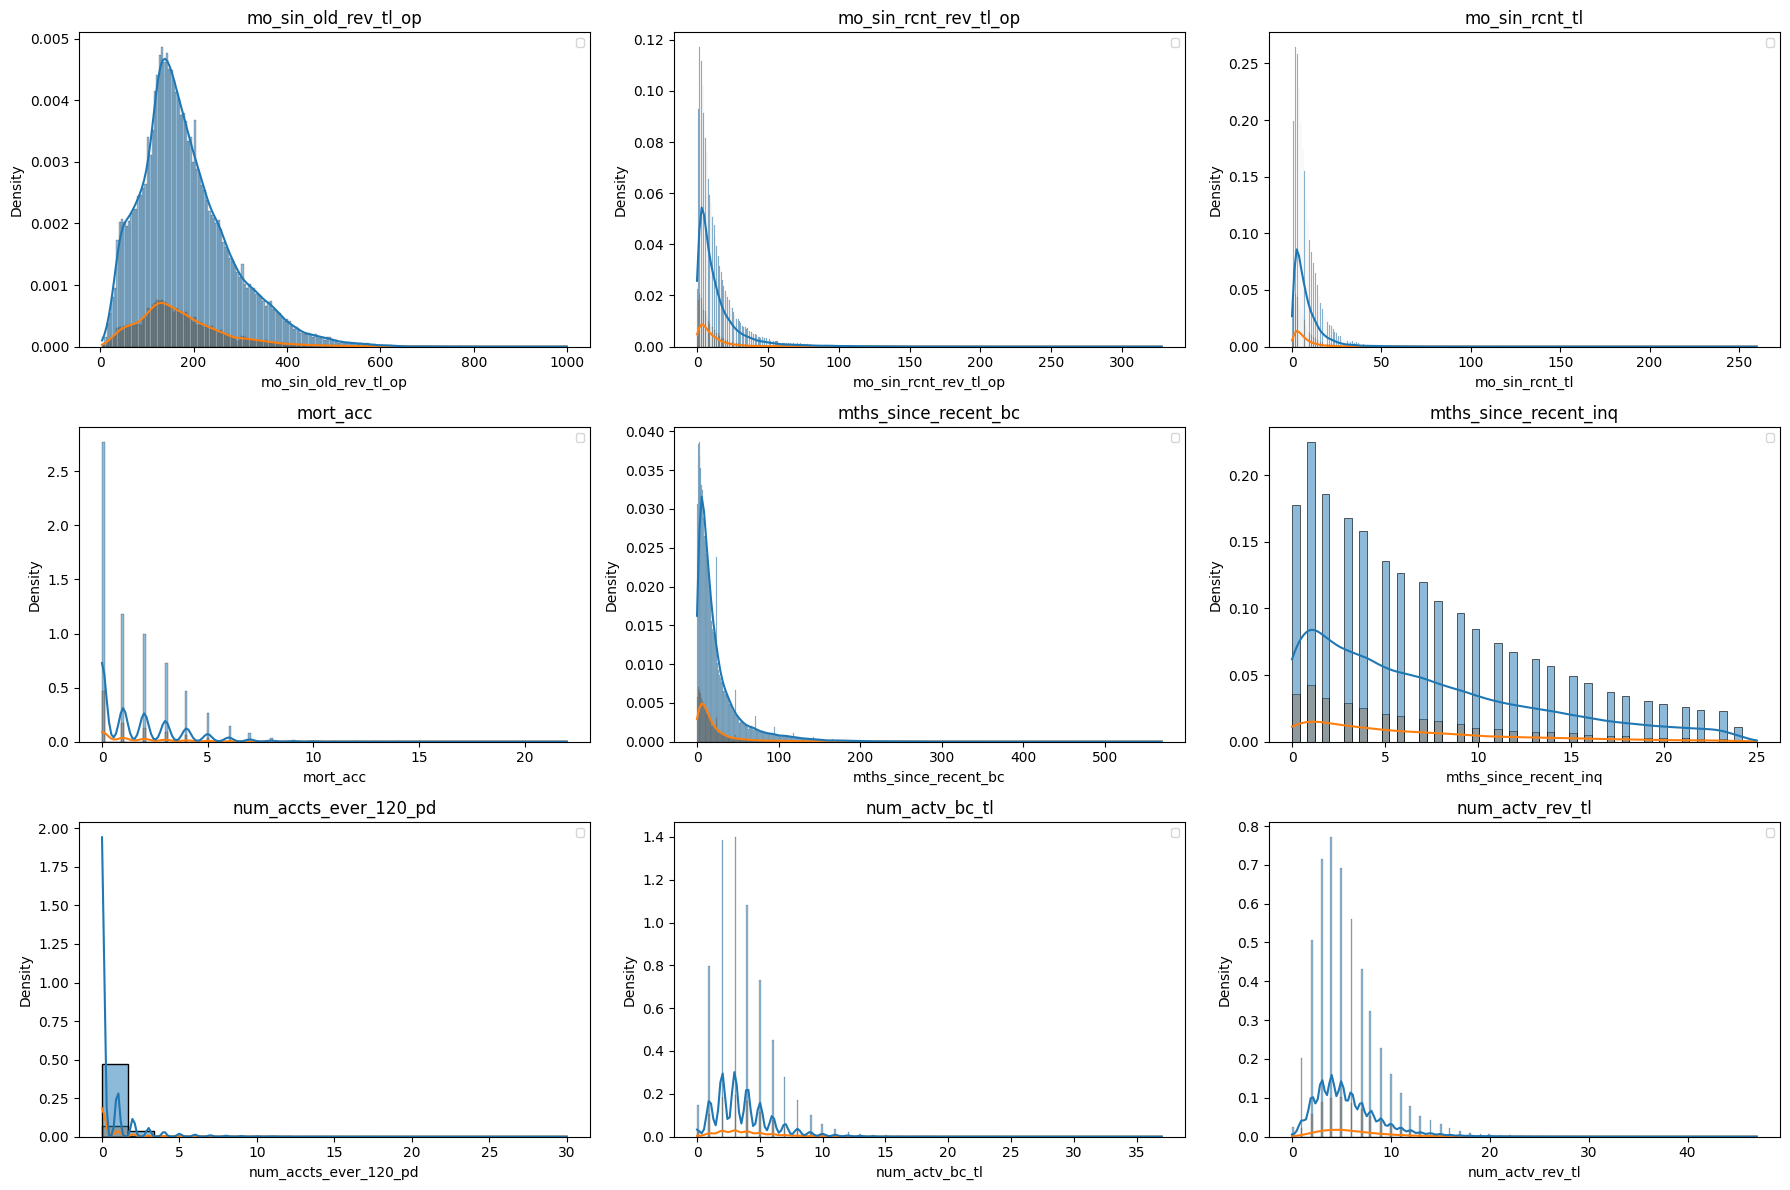

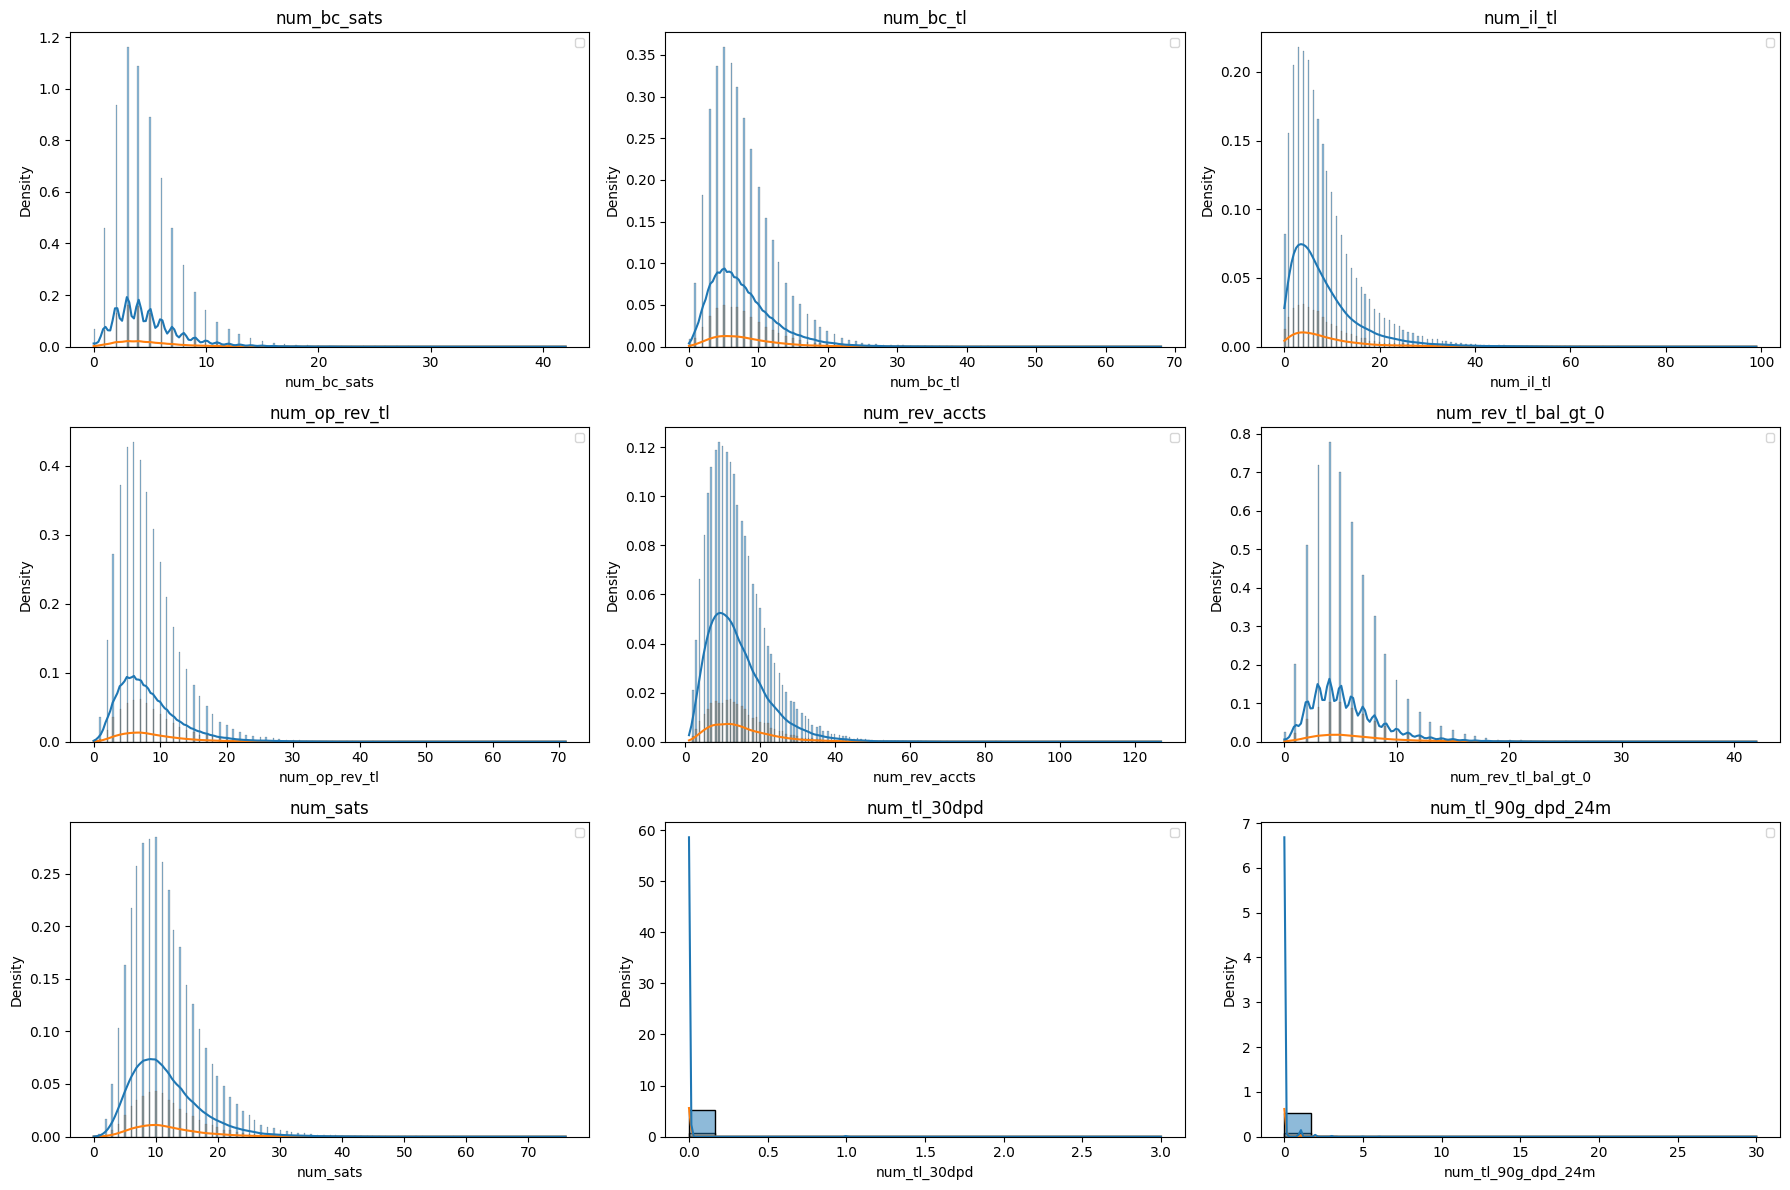

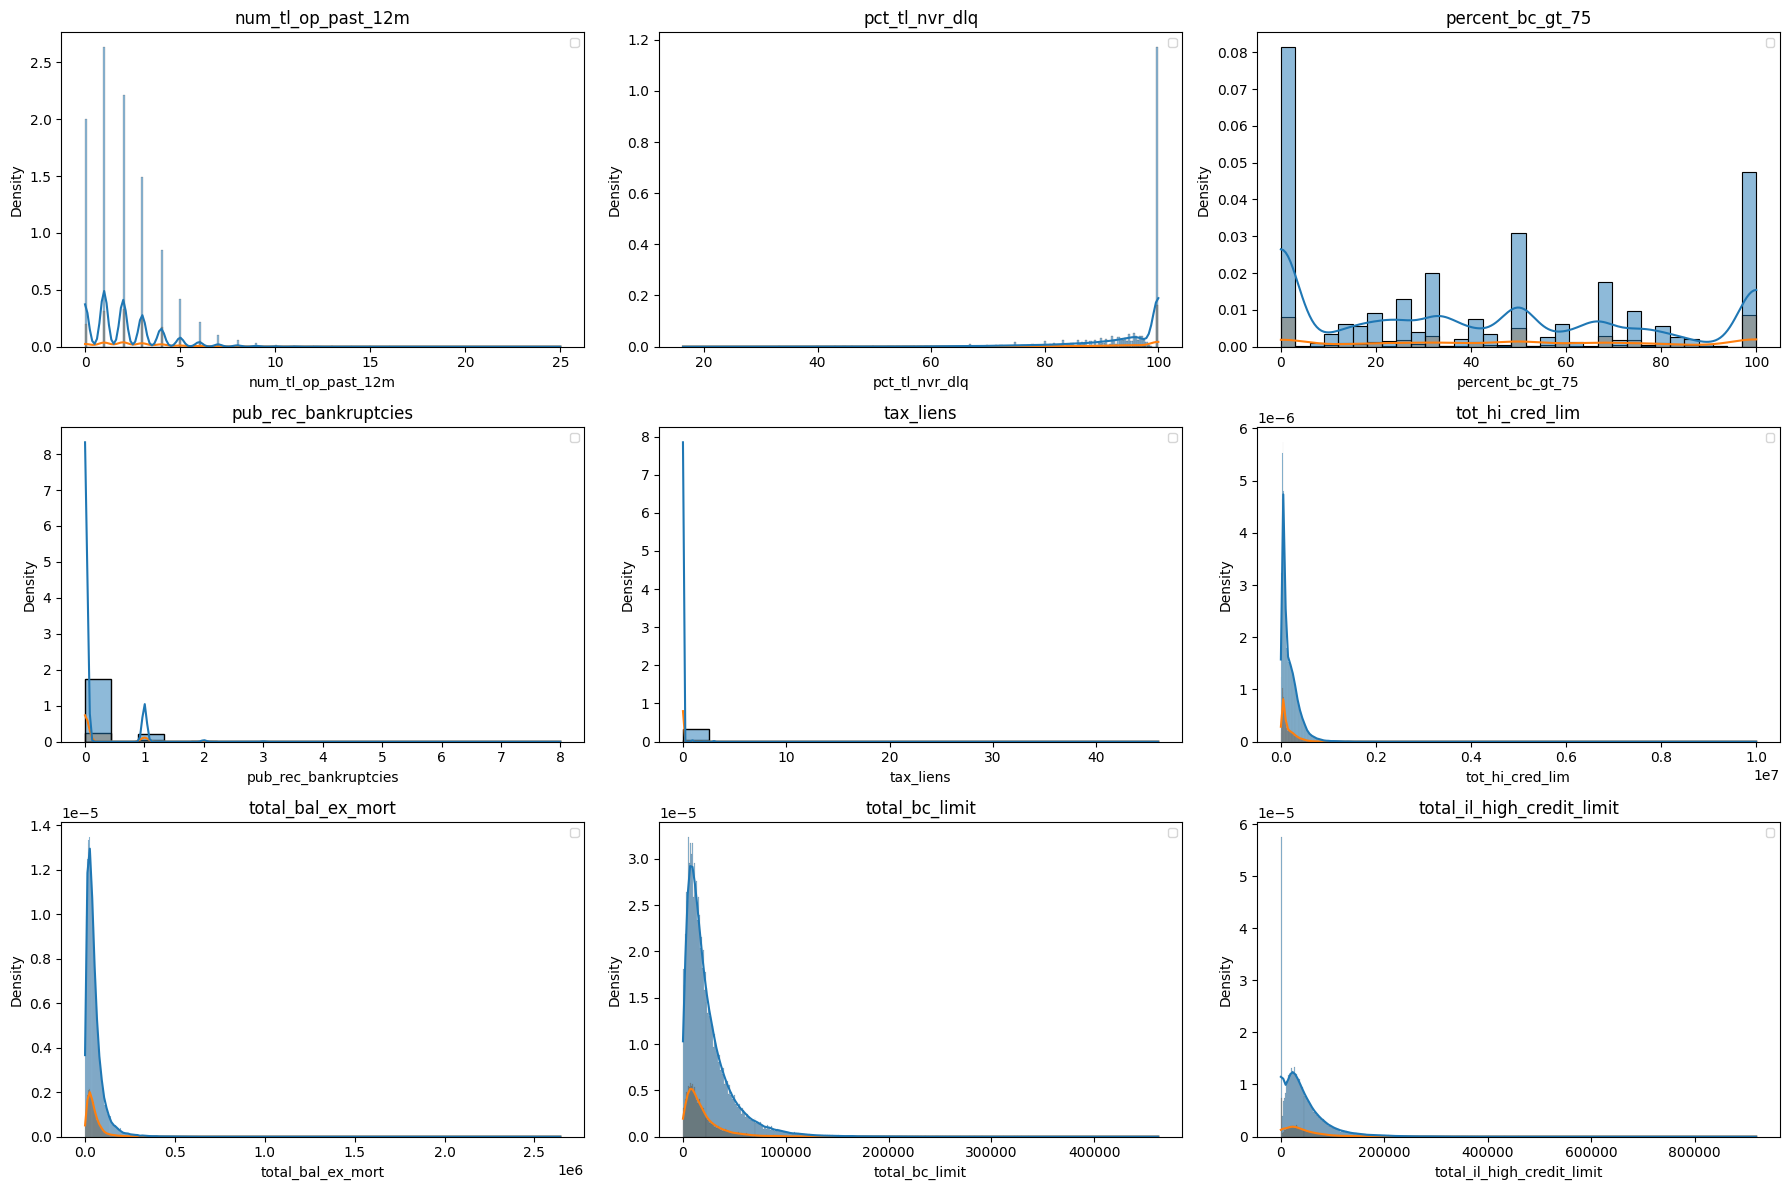

In [40]:
import warnings
import math

warnings.filterwarnings('ignore', category=FutureWarning)

cols_per_row = 3
plots_per_page = 9  # 3 rows × 3 cols per page

total_cols = len(num_cols)
pages = math.ceil(total_cols / plots_per_page)

for page in range(pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, total_cols)
    cols_subset = num_cols[start:end]
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_subset):
        sns.histplot(data=df_sample, x=col, hue='y', kde=True, ax=axes[i], stat='density', alpha=0.5)
        axes[i].set_title(col)
        axes[i].legend(loc='upper right', fontsize=8)
    
    # Remove empty subplots
    for j in range(len(cols_subset), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [41]:
flat_kde=['annual_inc','delinq_2yrs','inq_last_6mths','pub_rec','total_rec_late_fee','collections_12_mths_ex_med','acc_now_delinq',
          'tot_coll_amt','open_acc_6m','open_act_il','open_il_12m','open_il_24m','open_rv_12m','max_bal_bc','inq_fi','total_cu_tl','inq_last_12m',
         'delinq_amnt','mort_acc','pct_tl_nvr_dlq','tax_liens','pub_rec_bankruptcies']

for col in flat_kde:
    print(col,':\n',df[col].value_counts())

annual_inc :
 annual_inc
60000.0    87189
50000.0    76355
65000.0    64903
70000.0    62078
80000.0    59833
           ...  
6634.0         1
77516.0        1
69315.0        1
37048.0        1
55133.0        1
Name: count, Length: 89368, dtype: int64
delinq_2yrs :
 delinq_2yrs
0.0     1839108
1.0      281353
2.0       81289
3.0       29542
4.0       13179
5.0        6599
6.0        3717
7.0        2062
8.0        1223
9.0         818
10.0        556
11.0        363
12.0        263
13.0        165
14.0        120
15.0         87
16.0         55
17.0         30
18.0         30
19.0         23
20.0         17
21.0         12
22.0          5
24.0          4
26.0          3
30.0          2
25.0          2
23.0          2
29.0          2
39.0          1
28.0          1
27.0          1
32.0          1
35.0          1
58.0          1
42.0          1
36.0          1
Name: count, dtype: int64
inq_last_6mths :
 inq_last_6mths
0.0     1381722
1.0      584390
2.0      200212
3.0       69009
4.0  

In [42]:
"""warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['text.usetex'] = False 
cols_per_row = 2       # 2 plots per row
plots_per_page = 6     # 3 rows × 2 cols per page (adjust as needed)
total_cols = len(obj_cols)
pages = math.ceil(total_cols / plots_per_page)

for page in range(pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, total_cols)
    cols_subset = obj_cols[start:end]

    n_rows = math.ceil(len(cols_subset)/cols_per_row)
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(12, n_rows*4))
    axes = axes.flatten()

    for i, col in enumerate(cols_subset):
        sns.countplot(x=col, data=df_sample, ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots
    for j in range(len(cols_subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()"""

"warnings.filterwarnings('ignore', category=FutureWarning)\nplt.rcParams['text.usetex'] = False \ncols_per_row = 2       # 2 plots per row\nplots_per_page = 6     # 3 rows × 2 cols per page (adjust as needed)\ntotal_cols = len(obj_cols)\npages = math.ceil(total_cols / plots_per_page)\n\nfor page in range(pages):\n    start = page * plots_per_page\n    end = min(start + plots_per_page, total_cols)\n    cols_subset = obj_cols[start:end]\n\n    n_rows = math.ceil(len(cols_subset)/cols_per_row)\n    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(12, n_rows*4))\n    axes = axes.flatten()\n\n    for i, col in enumerate(cols_subset):\n        sns.countplot(x=col, data=df_sample, ax=axes[i])\n        axes[i].set_title(col)\n        axes[i].tick_params(axis='x', rotation=45)\n\n    # Remove empty subplots\n    for j in range(len(cols_subset), len(axes)):\n        fig.delaxes(axes[j])\n\n    plt.tight_layout()\n    plt.show()"

In [43]:
df_sample[num_cols].corr()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.999817         0.999105  0.099514   
funded_amnt                  0.999817     1.000000         0.999325  0.099358   
funded_amnt_inv              0.999105     0.999325         1.000000  0.099366   
int_rate                     0.099514     0.099358         0.099366  1.000000   
installment                  0.945290     0.945550         0.944649  0.124967   
...                               ...          ...              ...       ...   
tax_liens                    0.006510     0.006562         0.006708  0.012715   
tot_hi_cred_lim              0.325787     0.325787         0.325807 -0.122605   
total_bal_ex_mort            0.275219     0.275227         0.275209  0.005499   
total_bc_limit               0.372992     0.372994         0.373018 -0.241997   
total_il_high_credit_limit   0.209700     0.209700         0.209686 -0.002755   

                            installment  annual_inc       dti  delinq_2yrs  \
loan_amnt                      0.945290    0.105593  0.040281    -0.006137   
funded_amnt                    0.945550    0.105571  0.040411    -0.006039   
funded_amnt_inv                0.944649    0.105369  0.041020    -0.006001   
int_rate                       0.124967   -0.029214  0.129051     0.060267   
installment                    1.000000    0.102961  0.040489     0.007079   
...                                 ...         ...       ...          ...   
tax_liens                      0.012277    0.012277 -0.021273     0.014069   
tot_hi_cred_lim                0.292564    0.139444  0.033135     0.058004   
total_bal_ex_mort              0.258387    0.110903  0.200254     0.029225   
total_bc_limit                 0.337901    0.098891  0.038179    -0.078180   
total_il_high_credit_limit     0.193078    0.092089  0.230958     0.055709   

                            fico_range_low  fico_range_high  ...  \
loan_amnt                         0.109496         0.109493  ...   
funded_amnt                       0.109334         0.109331  ...   
funded_amnt_inv                   0.109159         0.109156  ...   
int_rate                         -0.417130        -0.417124  ...   
installment                       0.052336         0.052333  ...   
...                                    ...              ...  ...   
tax_liens                        -0.055150        -0.055149  ...   
tot_hi_cred_lim                   0.179931         0.179930  ...   
total_bal_ex_mort                 0.024239         0.024234  ...   
total_bc_limit                    0.366031         0.366031  ...   
total_il_high_credit_limit        0.068455         0.068451  ...   

                            num_tl_90g_dpd_24m  num_tl_op_past_12m  \
loan_amnt                            -0.020249           -0.019895   
funded_amnt                          -0.020249           -0.019895   
funded_amnt_inv                      -0.020270           -0.019915   
int_rate                              0.034952            0.183194   
installment                          -0.012995            0.002935   
...                                        ...                 ...   
tax_liens                             0.006014            0.019807   
tot_hi_cred_lim                       0.006234            0.099797   
total_bal_ex_mort                     0.022360            0.124127   
total_bc_limit                       -0.059334            0.054752   
total_il_high_credit_limit            0.037565            0.142407   

                            pct_tl_nvr_dlq  percent_bc_gt_75  \
loan_amnt                         0.091380          0.017364   
funded_amnt                       0.091380          0.017358   
funded_amnt_inv                   0.091406          0.017310   
int_rate                         -0.078664          0.269787   
installment                       0.070397          0.040466   
...                                    ...               ...   
tax_liens   

In [44]:
# Compute correlation matrix (numeric columns)
corr_matrix = df_sample[num_cols].corr().abs()

# Select upper triangle to avoid duplicates
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Filter pairs with correlation >= 0.9
high_corr = upper.stack().reset_index() # .stack() converts the upper triangle into a list of pairs
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr[high_corr['Correlation'] >= 0.9]

print("Highly correlated column pairs (corr >= 0.9):")
print(high_corr)

Highly correlated column pairs (corr >= 0.9):
             Feature1                    Feature2  Correlation
0           loan_amnt                 funded_amnt     0.999817
1           loan_amnt             funded_amnt_inv     0.999105
3           loan_amnt                 installment     0.945290
80        funded_amnt             funded_amnt_inv     0.999325
82        funded_amnt                 installment     0.945550
160   funded_amnt_inv                 installment     0.944649
612    fico_range_low             fico_range_high     1.000000
882          open_acc                    num_sats     0.998969
1160        out_prncp               out_prncp_inv     0.999999
1287      total_pymnt             total_pymnt_inv     0.999402
1288      total_pymnt             total_rec_prncp     0.966416
1349  total_pymnt_inv             total_rec_prncp     0.965814
1587       recoveries     collection_recovery_fee     0.969556
2060      tot_cur_bal             tot_hi_cred_lim     0.965455
2334     

In [45]:
# Find columns with correlation > 0.9
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Columns to drop due to multicollinearity:", to_drop)

Columns to drop due to multicollinearity: ['funded_amnt', 'funded_amnt_inv', 'installment', 'fico_range_high', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'num_rev_tl_bal_gt_0', 'num_sats', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [46]:
df=df.drop(columns=to_drop)

In [47]:
normal_cols = [col for col in normal_cols if col not in to_drop]

In [48]:
len(normal_cols)

93

In [49]:
# Object/string columns
obj_cols = df[normal_cols].select_dtypes(include='object').columns.tolist()
# Numerical columns
num_cols = df[normal_cols].select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()

In [50]:
missing = df[normal_cols].isnull().sum()
missing = missing[missing > 0]
print(missing.values)

[ 166969  146907       4   23326       1    1711      29      29      30
      29      29    1802      29    2427      72     145      29   70276
   70276  866130  866129  866129  866129  909924  866129 1068850  866129
  866129  866129  866348   70276  866129  866130  866130   50030   70346
   74935   76071     145      29  139071   70277   70277   70276   50030
   73412  295435   70276   70276   70276   58590   70276   70276   70276
   70277  153657   70276   70276   70276   70431   75379    1365     105
   50030]


In [51]:
dict(missing)

{'emp_title': 166969,
 'emp_length': 146907,
 'annual_inc': 4,
 'title': 23326,
 'zip_code': 1,
 'dti': 1711,
 'delinq_2yrs': 29,
 'earliest_cr_line': 29,
 'inq_last_6mths': 30,
 'open_acc': 29,
 'pub_rec': 29,
 'revol_util': 1802,
 'total_acc': 29,
 'last_pymnt_d': 2427,
 'last_credit_pull_d': 72,
 'collections_12_mths_ex_med': 145,
 'acc_now_delinq': 29,
 'tot_coll_amt': 70276,
 'tot_cur_bal': 70276,
 'open_acc_6m': 866130,
 'open_act_il': 866129,
 'open_il_12m': 866129,
 'open_il_24m': 866129,
 'mths_since_rcnt_il': 909924,
 'total_bal_il': 866129,
 'il_util': 1068850,
 'open_rv_12m': 866129,
 'open_rv_24m': 866129,
 'max_bal_bc': 866129,
 'all_util': 866348,
 'total_rev_hi_lim': 70276,
 'inq_fi': 866129,
 'total_cu_tl': 866130,
 'inq_last_12m': 866130,
 'acc_open_past_24mths': 50030,
 'avg_cur_bal': 70346,
 'bc_open_to_buy': 74935,
 'bc_util': 76071,
 'chargeoff_within_12_mths': 145,
 'delinq_amnt': 29,
 'mo_sin_old_il_acct': 139071,
 'mo_sin_old_rev_tl_op': 70277,
 'mo_sin_rcnt_re

In [52]:
missing_num = missing[missing.index.isin(num_cols)]
missing_cat = missing[missing.index.isin(obj_cols)]

In [53]:
dict(missing_num)

{'annual_inc': 4,
 'dti': 1711,
 'delinq_2yrs': 29,
 'inq_last_6mths': 30,
 'open_acc': 29,
 'pub_rec': 29,
 'revol_util': 1802,
 'total_acc': 29,
 'collections_12_mths_ex_med': 145,
 'acc_now_delinq': 29,
 'tot_coll_amt': 70276,
 'tot_cur_bal': 70276,
 'open_acc_6m': 866130,
 'open_act_il': 866129,
 'open_il_12m': 866129,
 'open_il_24m': 866129,
 'mths_since_rcnt_il': 909924,
 'total_bal_il': 866129,
 'il_util': 1068850,
 'open_rv_12m': 866129,
 'open_rv_24m': 866129,
 'max_bal_bc': 866129,
 'all_util': 866348,
 'total_rev_hi_lim': 70276,
 'inq_fi': 866129,
 'total_cu_tl': 866130,
 'inq_last_12m': 866130,
 'acc_open_past_24mths': 50030,
 'avg_cur_bal': 70346,
 'bc_open_to_buy': 74935,
 'bc_util': 76071,
 'chargeoff_within_12_mths': 145,
 'delinq_amnt': 29,
 'mo_sin_old_il_acct': 139071,
 'mo_sin_old_rev_tl_op': 70277,
 'mo_sin_rcnt_rev_tl_op': 70277,
 'mo_sin_rcnt_tl': 70276,
 'mort_acc': 50030,
 'mths_since_recent_bc': 73412,
 'mths_since_recent_inq': 295435,
 'num_accts_ever_120_pd'

In [54]:
dict(missing_cat)

{'emp_title': 166969,
 'emp_length': 146907,
 'title': 23326,
 'zip_code': 1,
 'earliest_cr_line': 29,
 'last_pymnt_d': 2427,
 'last_credit_pull_d': 72}

In [55]:
#df_sample['emp_title'].value_counts().plot(kind='bar',figsize=(12,6))

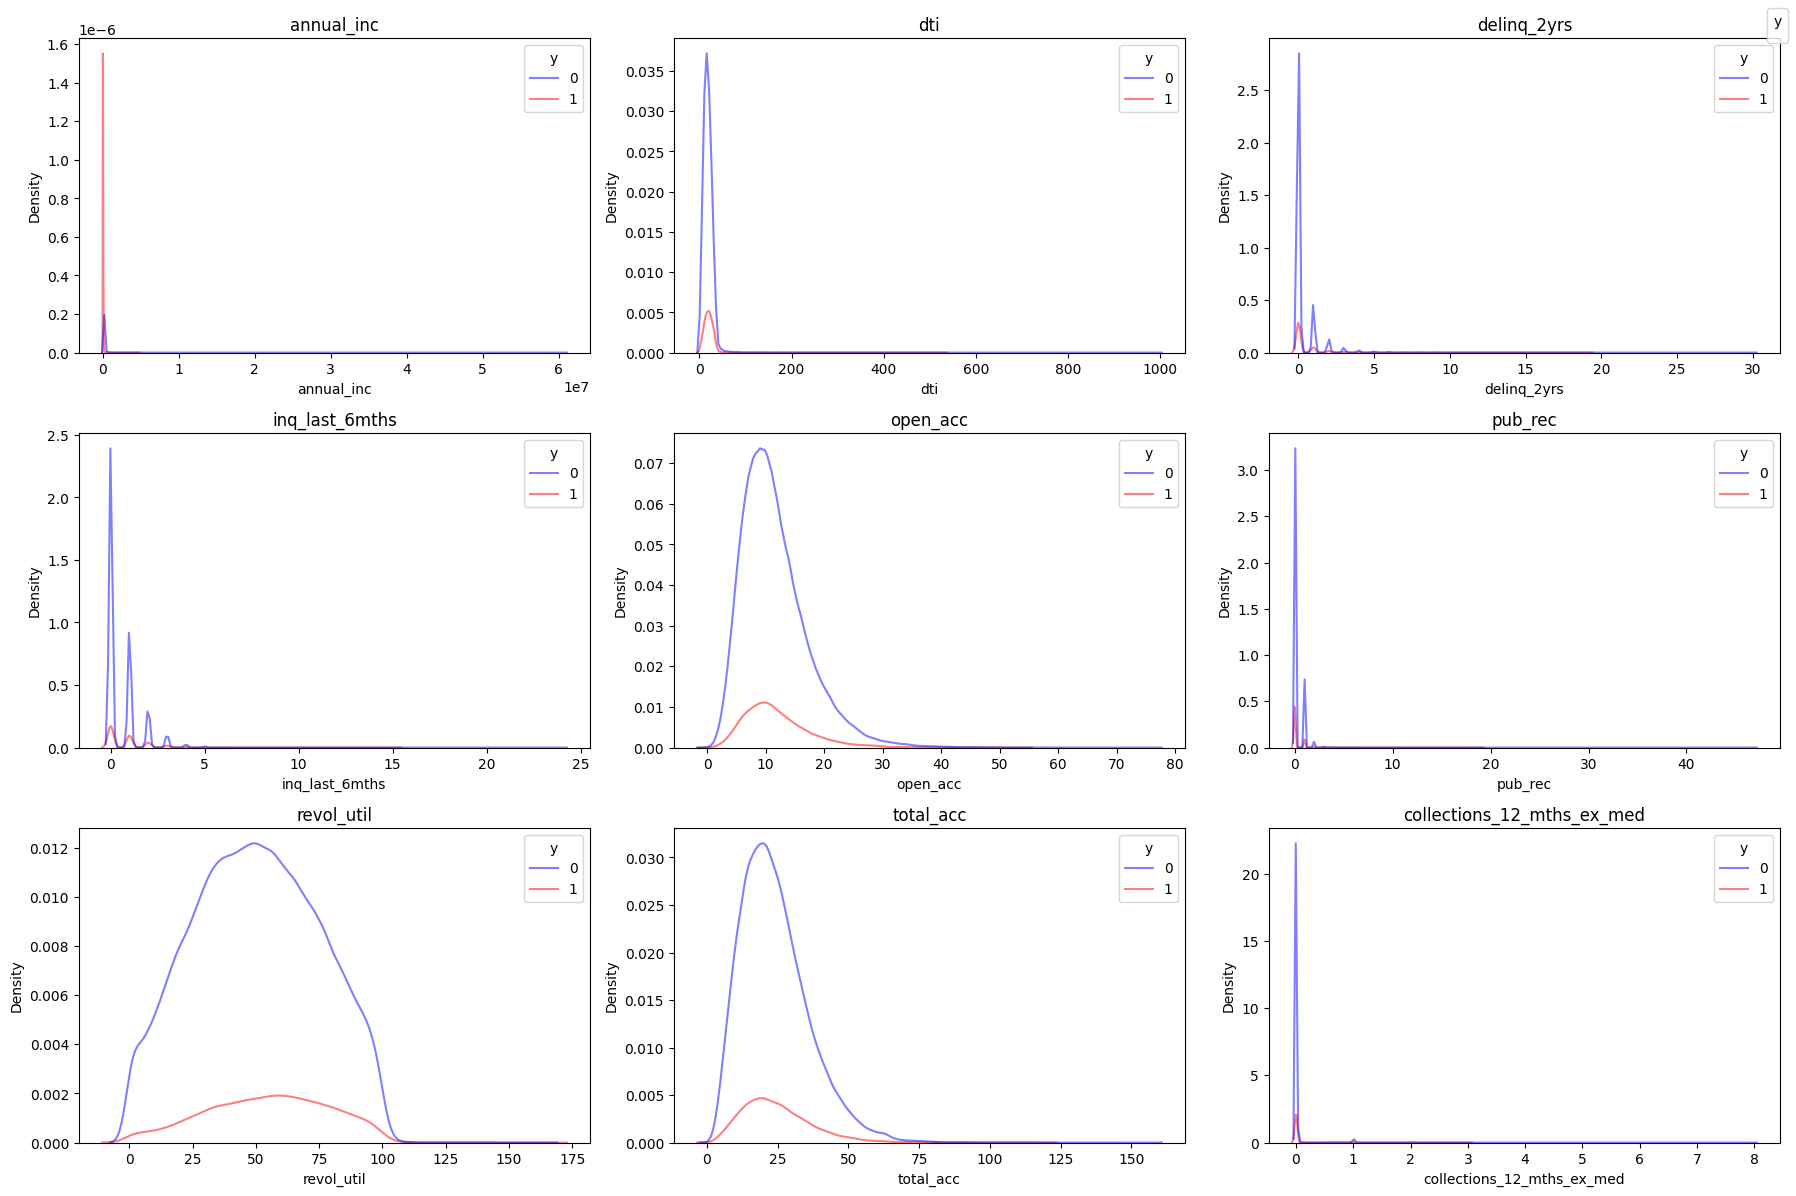

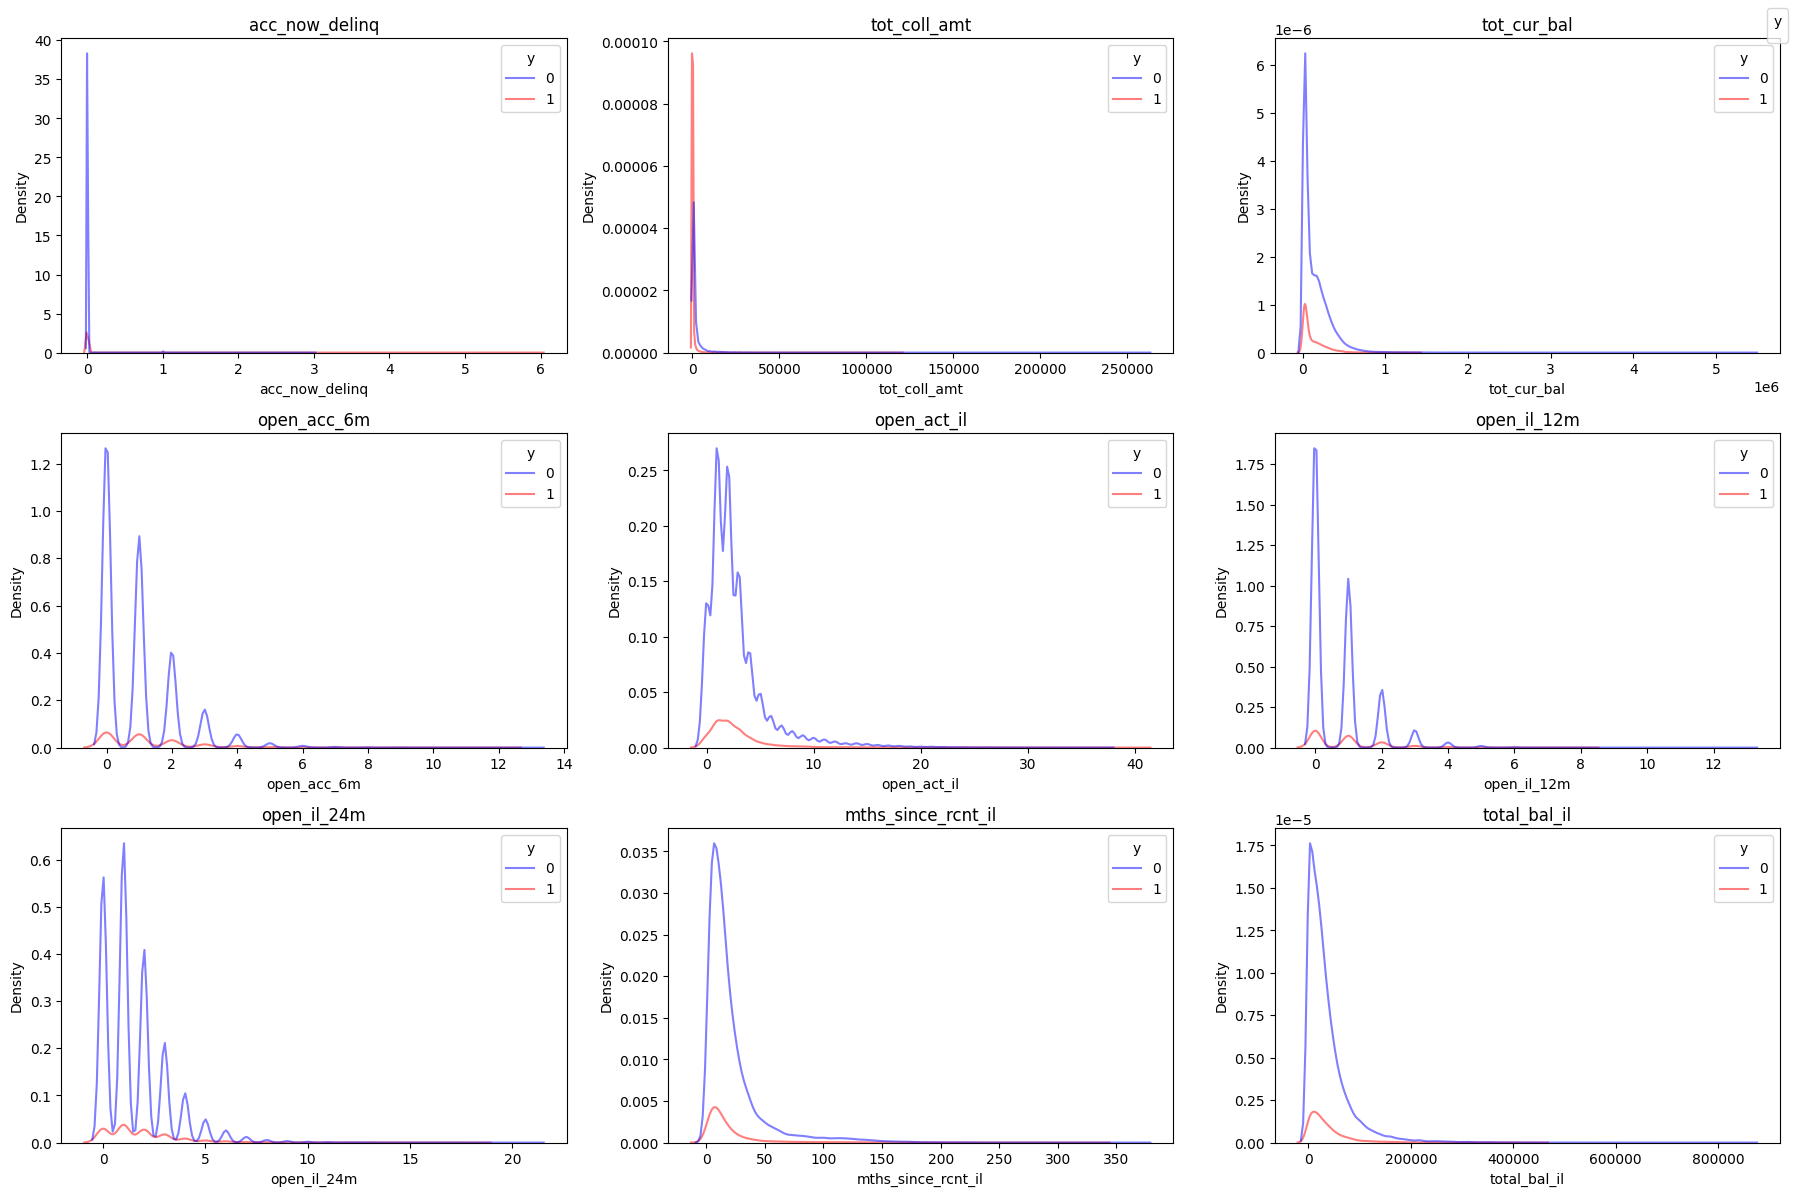

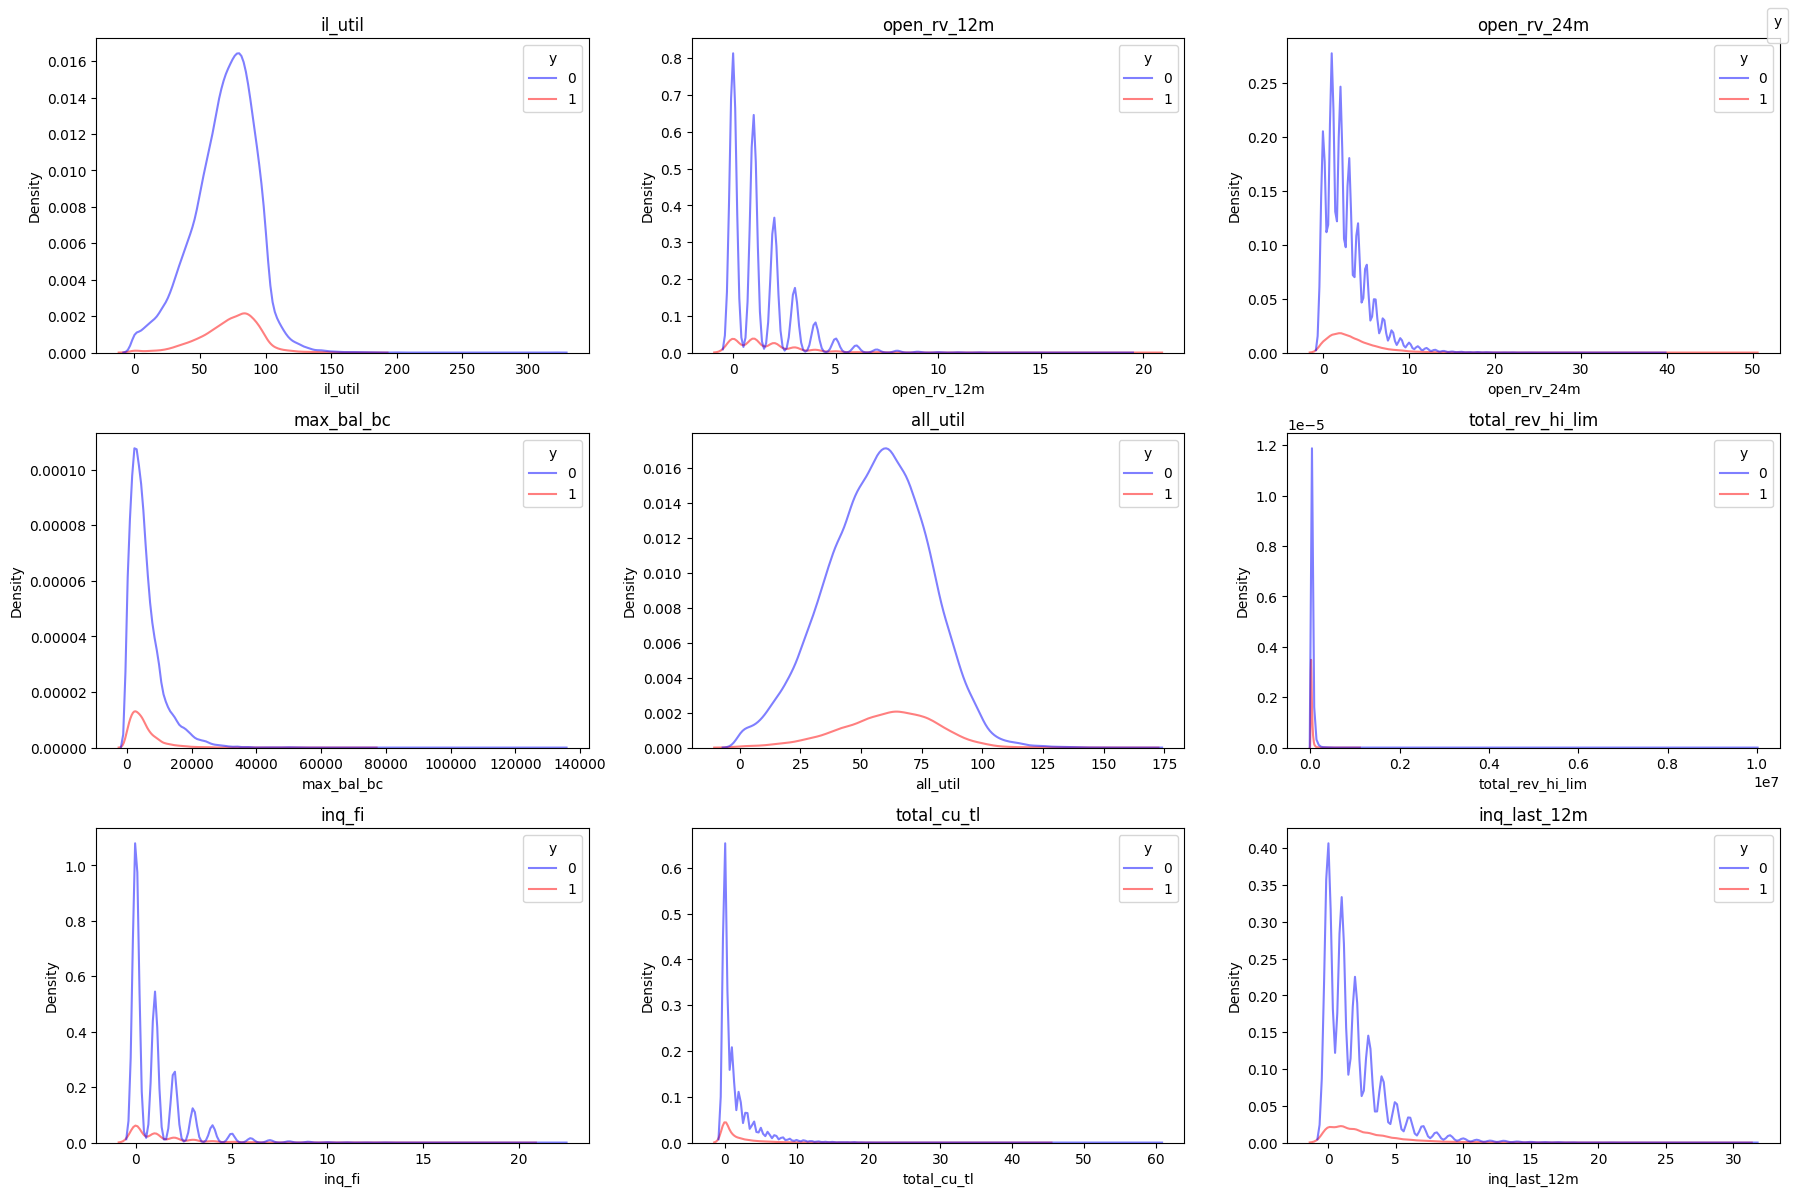

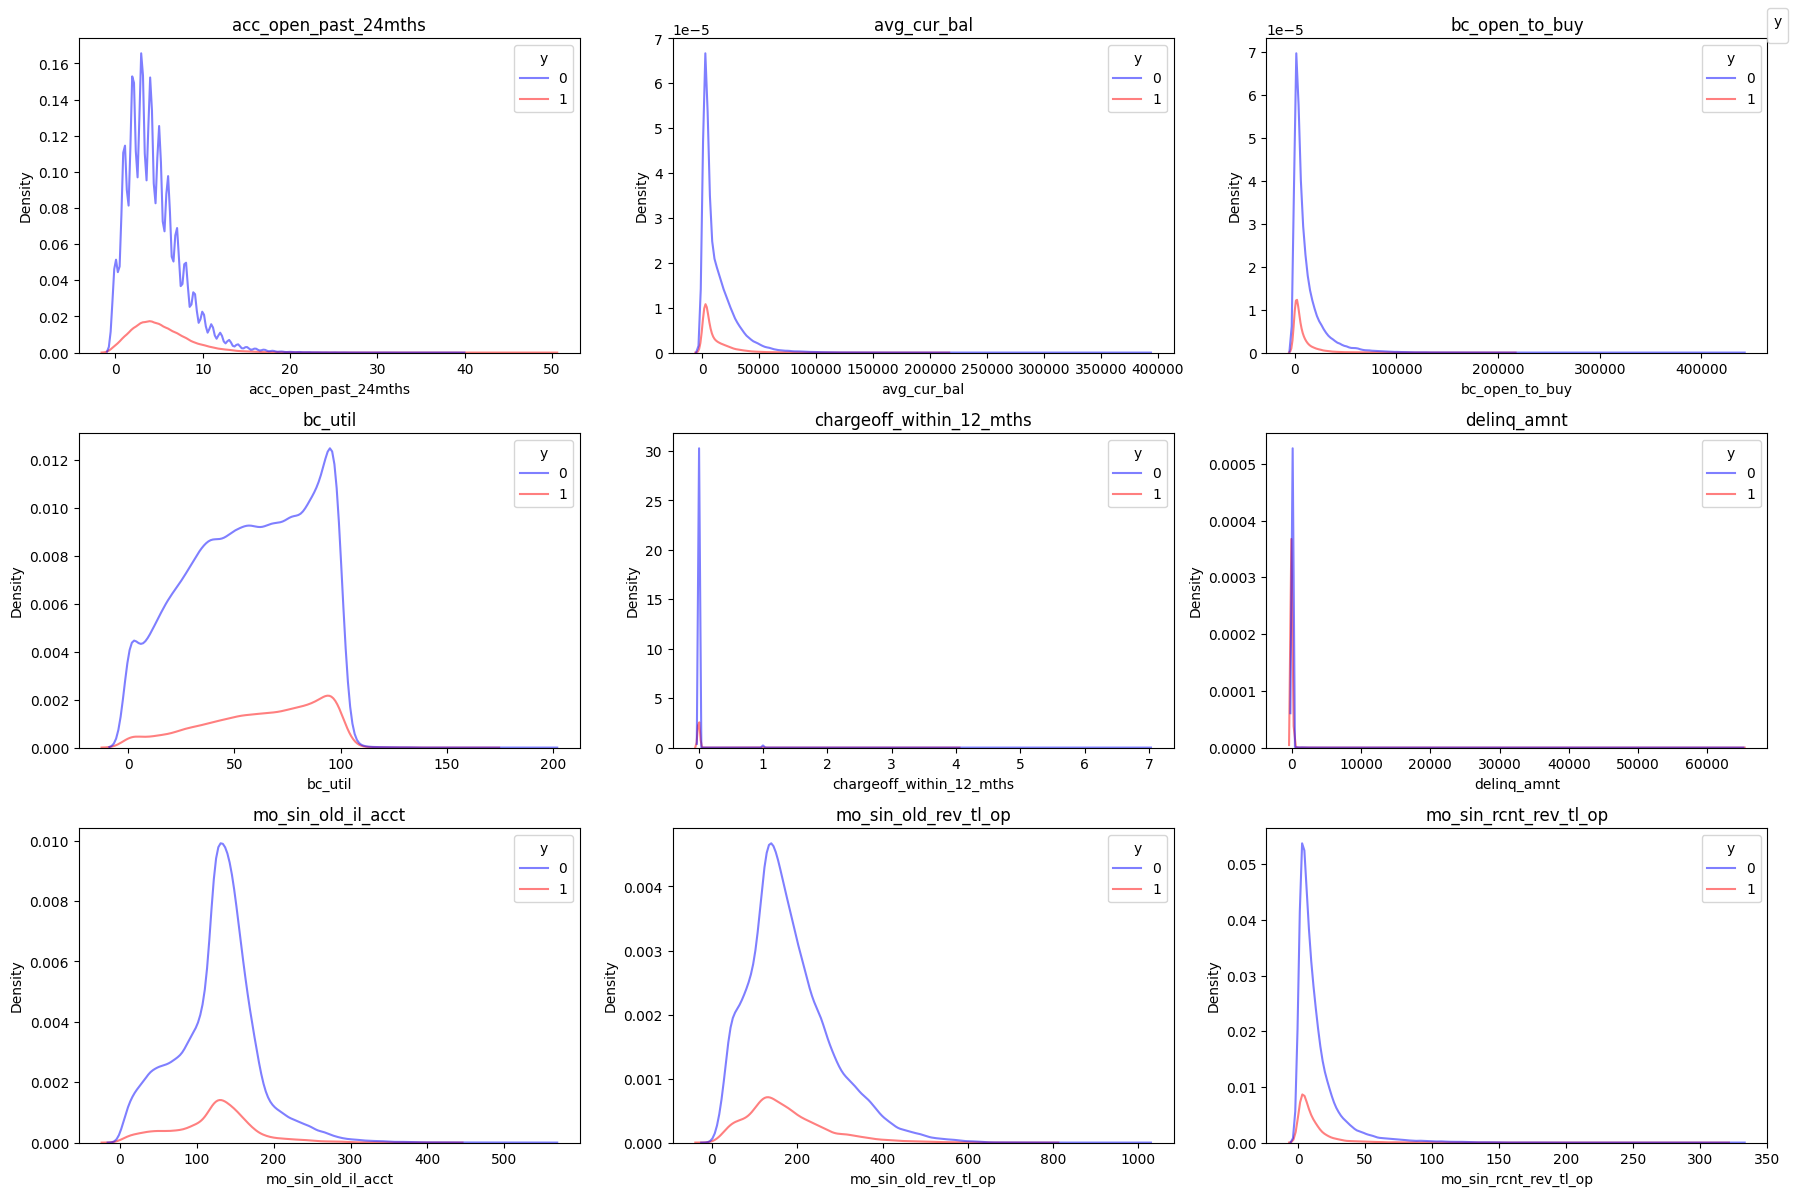

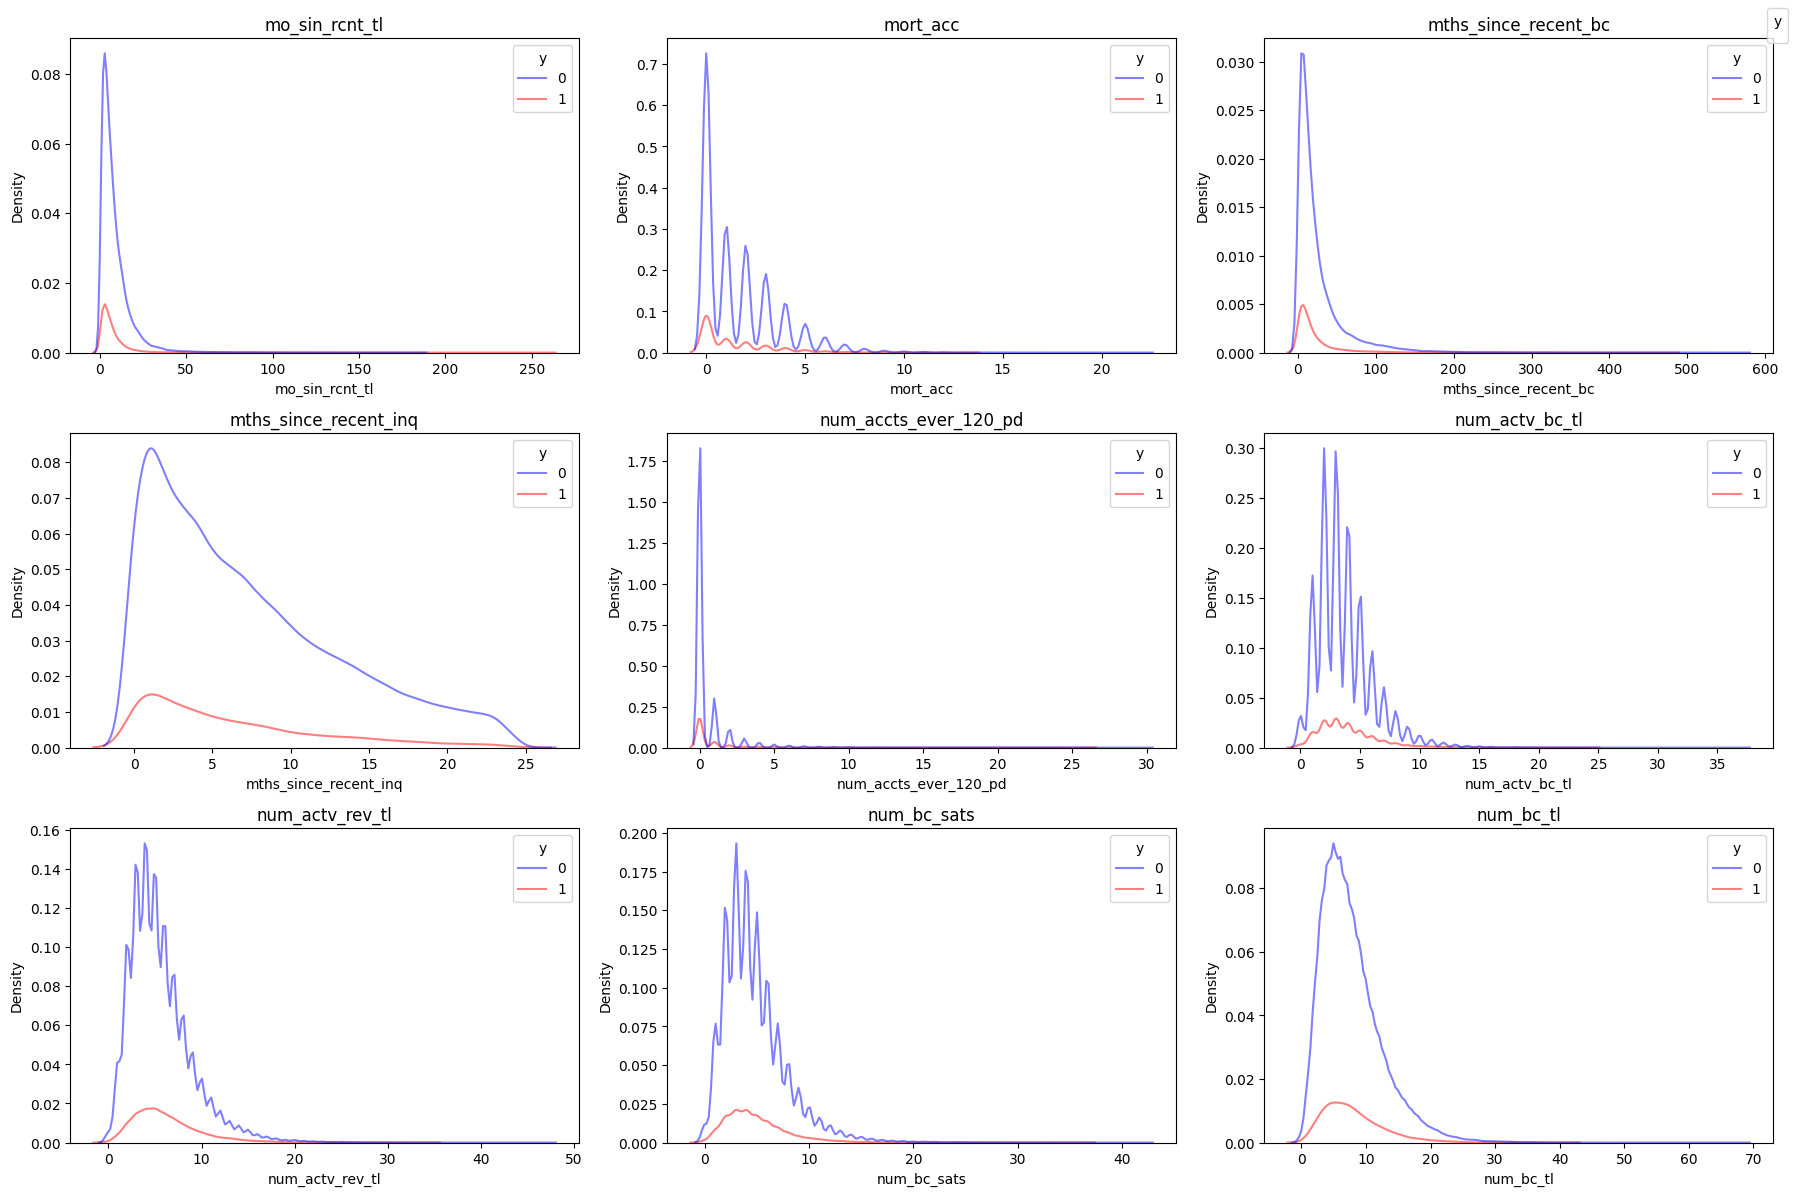

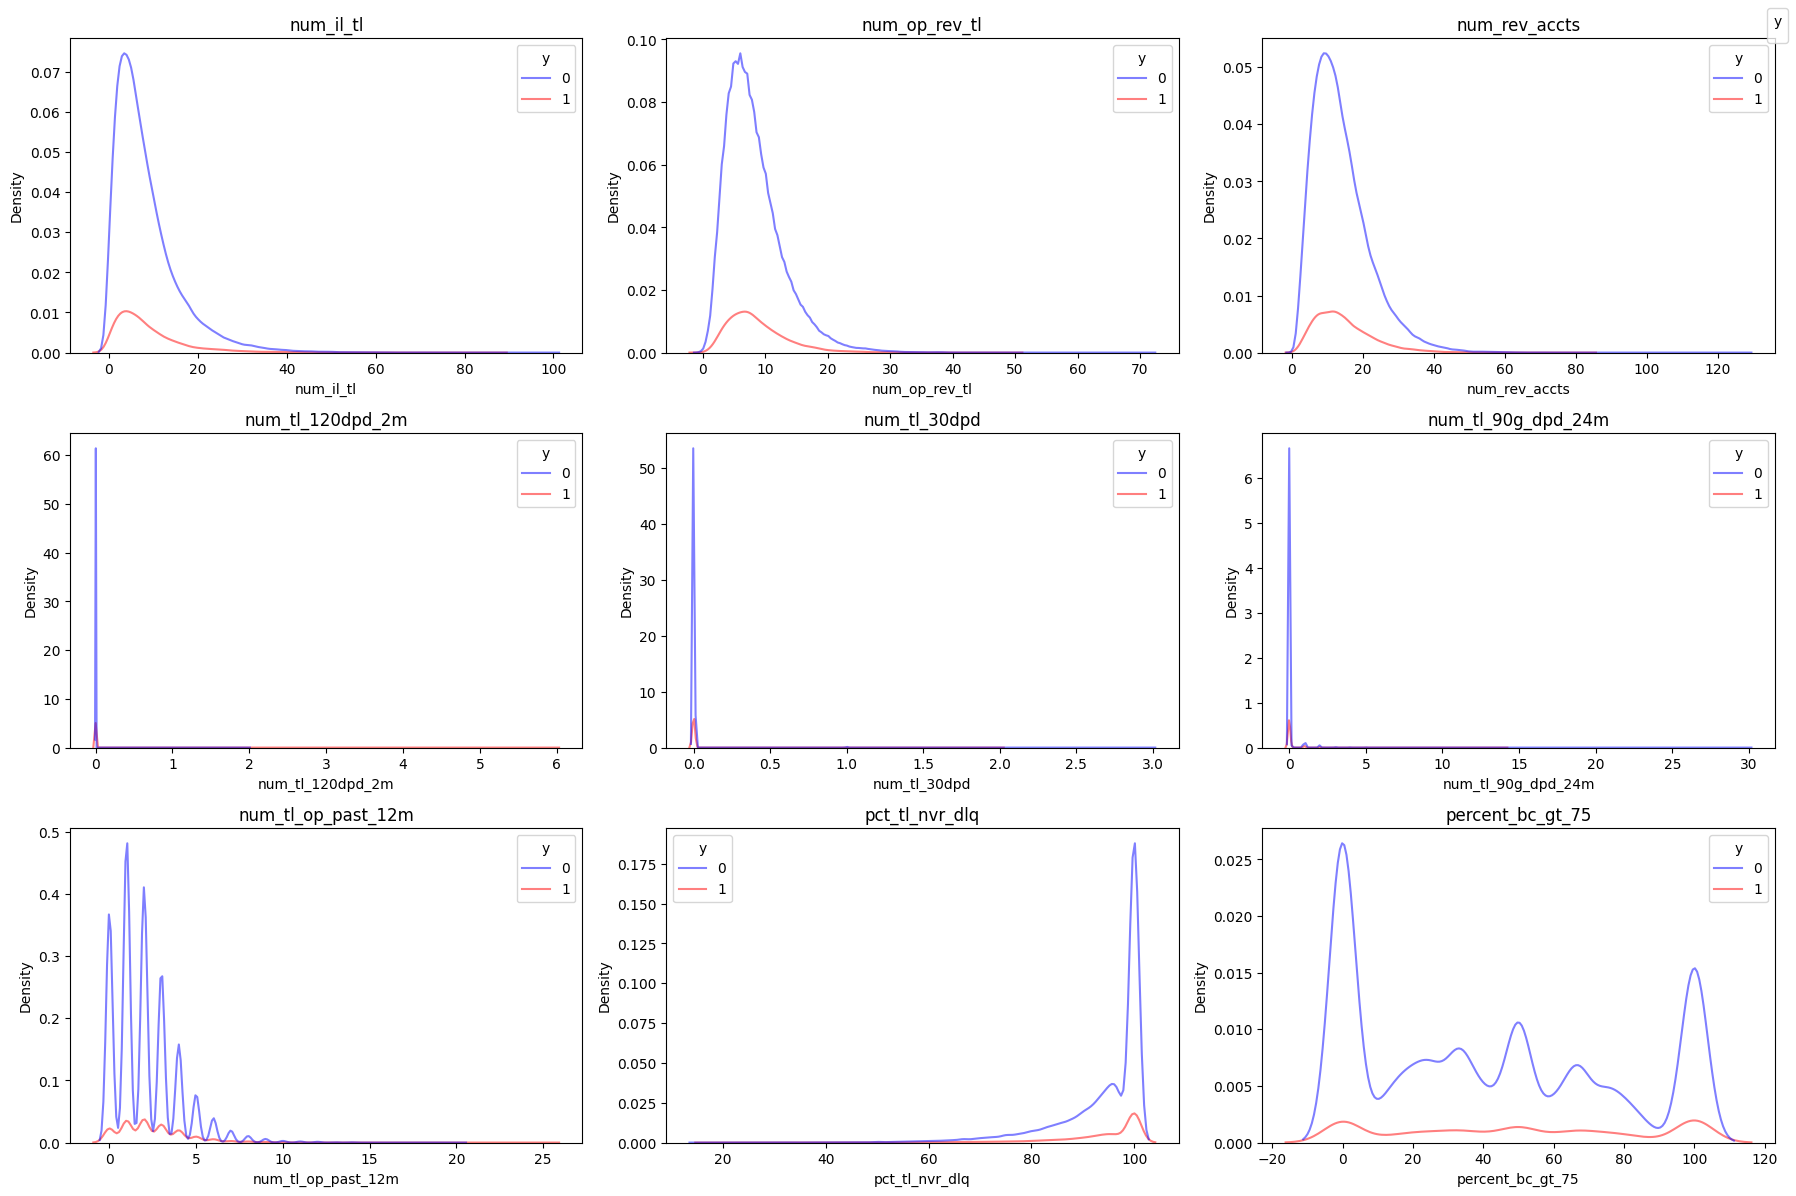

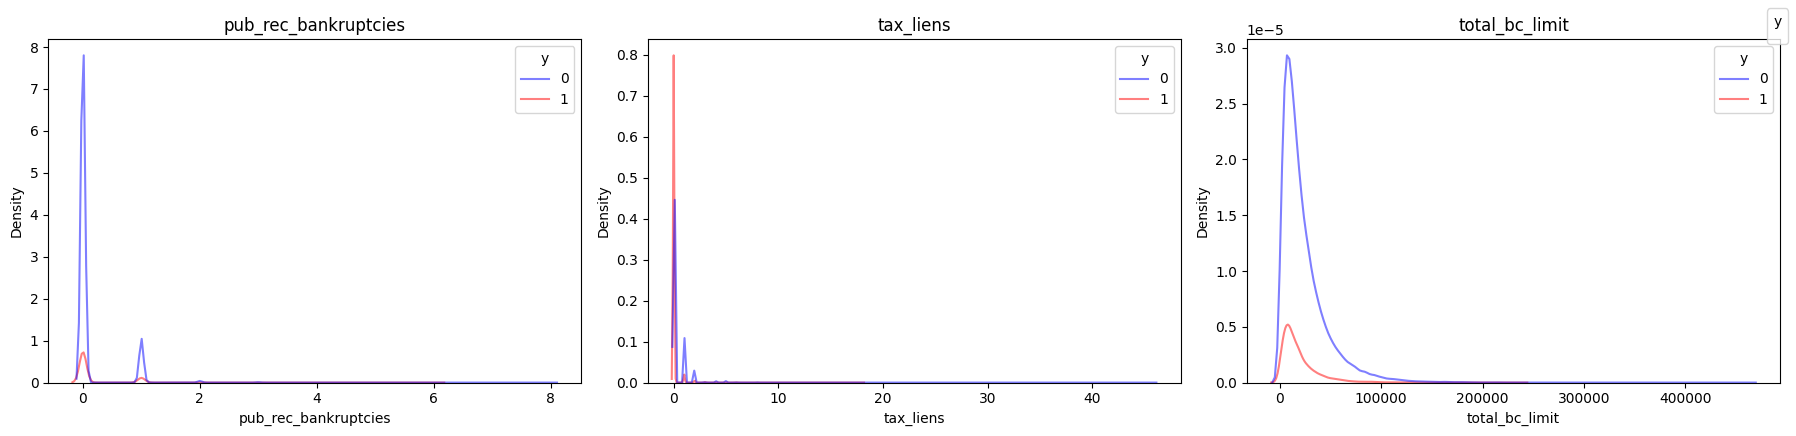

In [56]:
import warnings
import math

warnings.filterwarnings('ignore', category=FutureWarning)

cols_per_row = 3
plots_per_page = 9  # 3 rows × 3 cols per page

missing_num_cols=[]
for col in missing_num.index:
    missing_num_cols.append(col)

total_cols = len(missing_num_cols)
pages = math.ceil(total_cols / plots_per_page)

for page in range(pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, total_cols)
    cols_subset = missing_num_cols[start:end]
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_subset):
        sns.kdeplot(data=df_sample, x=col, hue='y', ax=axes[i], alpha=0.5,palette={0: "blue", 1: "red"})
        axes[i].set_title(col)
    handles, labels = axes[i].get_legend_handles_labels()
    fig.legend(handles, labels, title="y", fontsize=12)
    
    # Remove empty subplots
    for j in range(len(cols_subset), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [57]:
df[list(missing_num.index)].isnull().sum()

annual_inc                          4
dti                              1711
delinq_2yrs                        29
inq_last_6mths                     30
open_acc                           29
pub_rec                            29
revol_util                       1802
total_acc                          29
collections_12_mths_ex_med        145
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866130
open_act_il                    866129
open_il_12m                    866129
open_il_24m                    866129
mths_since_rcnt_il             909924
total_bal_il                   866129
il_util                       1068850
open_rv_12m                    866129
open_rv_24m                    866129
max_bal_bc                     866129
all_util                       866348
total_rev_hi_lim                70276
inq_fi                         866129
total_cu_tl                    866130
inq_last_12m

In [58]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='y')
y=df['y']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

y_train=pd.Series(y_train,name='y')
y_test=pd.Series(y_test,name='y')

In [59]:
#We randomly impute the values as for the distribution for each feature won't be distorted

for col in missing_num.index:
    X_test.loc[X_test[col].isnull(), col] = X_train[col].dropna().sample(X_test[col].isnull().sum(), random_state=42).values
    X_train.loc[X_train[col].isnull(), col] = X_train[col].dropna().sample(X_train[col].isnull().sum(), random_state=42).values

In [60]:
X_train[list(missing_num.index)].isnull().sum()

annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_12m                   0
open_il_24m                   0
mths_since_rcnt_il            0
total_bal_il                  0
il_util                       0
open_rv_12m                   0
open_rv_24m                   0
max_bal_bc                    0
all_util                      0
total_rev_hi_lim              0
inq_fi                        0
total_cu_tl                   0
inq_last_12m                  0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
chargeof

In [61]:
X_test[list(missing_num.index)].isnull().sum()

annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_12m                   0
open_il_24m                   0
mths_since_rcnt_il            0
total_bal_il                  0
il_util                       0
open_rv_12m                   0
open_rv_24m                   0
max_bal_bc                    0
all_util                      0
total_rev_hi_lim              0
inq_fi                        0
total_cu_tl                   0
inq_last_12m                  0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
chargeof

In [62]:
missing_cat

emp_title             166969
emp_length            146907
title                  23326
zip_code                   1
earliest_cr_line          29
last_pymnt_d            2427
last_credit_pull_d        72
dtype: int64

In [63]:
X_train[missing_cat.index]

emp_title emp_length                    title  \
1404536                logistics manager  10+ years       debt consolidation   
1686385     pyshiatric nurse pratitioner     1 year  credit card refinancing   
1919294                desert west obgyn     1 year                debt free   
749681                           teacher    5 years  credit card refinancing   
869087                      electrician     4 years       debt consolidation   
...                                  ...        ...                      ...   
732186                 claims supervisor    4 years       debt consolidation   
110268   director, enterprise operations     1 year  credit card refinancing   
1692766         principal clerk utility   10+ years       debt consolidation   
2229115            surveillance manager    < 1 year         home improvement   
2219141                        van sales    2 years  credit card refinancing   

        zip_code earliest_cr_line last_pymnt_d last_credit_pull_d  
1404536    301xx         jan-2003     mar-2019           mar-2019  
1686385    034xx         may-2004     mar-2019           mar-2019  
1919294    853xx         mar-2000     jul-2015           mar-2019  
749681     200xx         mar-2002     mar-2019           mar-2019  
869087     925xx         apr-2006     mar-2019           mar-2019  
...          ...              ...          ...                ...  
732186     174xx         mar-1998     oct-2017           dec-2018  
110268     068xx         aug-1988     oct-2018           mar-2019  
1692766    917xx         mar-1995     oct-2017           feb-2018  
2229115    707xx         oct-1997     oct-2017           mar-2019  
2219141    958xx         nov-1995     apr-2017           feb-2019  

[1695501 rows x 7 columns]

In [64]:
X_test[missing_cat.index]

emp_title emp_length                    title  \
1758074                regional manager  10+ years     pay off credit cards   
686539                     truck driver  10+ years       debt consolidation   
900731    therapist/clinical supervisor    9 years       debt consolidation   
1727935                 service advisor    2 years            car financing   
539695                          analyst   < 1 year                    other   
...                                 ...        ...                      ...   
413440                       life sales    9 years       debt consolidation   
1596977        ground support equipment     1 year       debt consolidation   
2142261         fire prevention officer     1 year  credit card refinancing   
1111967                           owner  10+ years       debt consolidation   
302421                       lieutenant  10+ years           major purchase   

        zip_code earliest_cr_line last_pymnt_d last_credit_pull_d  
1758074    184xx         feb-1998     dec-2016           mar-2019  
686539     983xx         jan-2004     oct-2017           mar-2019  
900731     331xx         feb-2005     mar-2019           mar-2019  
1727935    276xx         jun-2006     may-2017           apr-2018  
539695     201xx         aug-2002     mar-2019           mar-2019  
...          ...              ...          ...                ...  
413440     028xx         jan-1992     feb-2015           mar-2019  
1596977    891xx         dec-2009     feb-2019           mar-2019  
2142261    871xx         nov-2003     feb-2019           mar-2019  
1111967    446xx         may-1999     nov-2017           mar-2019  
302421     926xx         feb-2000     aug-2016           feb-2019  

[565167 rows x 7 columns]

In [65]:
for cols in missing_cat.index:
    print(X_train[cols].value_counts())
    print(X_train[cols].value_counts().shape,'\n')
    print('******************************************')
    print(X_test[cols].value_counts())
    print(X_test[cols].value_counts().shape,'\n')

emp_title
teacher                                 34586
manager                                 32106
owner                                   23771
registered nurse                        16211
driver                                  15519
                                        ...  
millwright business agent                   1
prin eng/sr proj manager                    1
school cleaner                              1
patient access and retention manager        1
bridgeton board of edu                      1
Name: count, Length: 352441, dtype: int64
(352441,) 

******************************************
emp_title
teacher                   11539
manager                   10716
owner                      7969
driver                     5267
registered nurse           5196
                          ...  
blanchard                     1
q.c.                          1
frenkel lambert               1
child support services        1
vp sales operations           1
Name: count, Length: 1495

In [66]:
X_train['emp_title'] = X_train['emp_title'].fillna("unknown")
X_train['title'] = X_train['title'].fillna("unknown")

X_test['emp_title'] = X_test['emp_title'].fillna("unknown")
X_test['title'] = X_test['title'].fillna("unknown")

In [67]:
mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Convert text -> numeric
X_train['emp_length_num'] = X_train['emp_length'].map(mapping)
X_test['emp_length_num'] = X_test['emp_length'].map(mapping)

X_train['emp_length_missing'] = X_train['emp_length_num'].isna().astype(int)
X_test['emp_length_missing'] = X_test['emp_length_num'].isna().astype(int)
# Fill missing with median
median_val = X_train['emp_length_num'].median()
X_train['emp_length_num'] = X_train['emp_length_num'].fillna(median_val)
X_test['emp_length_num'] = X_test['emp_length_num'].fillna(median_val)
X_train.drop(columns=['emp_length'],inplace=True)
X_test.drop(columns=['emp_length'],inplace=True)

/tmp/ipykernel_19/1917755981.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['emp_length_num'] = X_train['emp_length'].map(mapping)
/tmp/ipykernel_19/1917755981.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['emp_length_num'] = X_test['emp_length'].map(mapping)
/tmp/ipykernel_19/1917755981.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

In [68]:
X_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt        term   int_rate grade sub_grade  \
1404536    28200.0   36 months   8.190000     a        a4   
1686385    22950.0   60 months  13.490000     c        c2   
1919294    20000.0   36 months   7.900000     a        a4   
749681     10000.0   60 months  16.910000     c        c5   
869087     16000.0   60 months  18.940001     d        d2   

                            emp_title home_ownership  annual_inc  \
1404536             logistics manager           rent    185000.0   
1686385  pyshiatric nurse pratitioner       mortgage    125000.0   
1919294             desert west obgyn       mortgage     80000.0   
749681                        teacher           rent     52800.0   
869087                   electrician        mortgage     62400.0   

        verification_status   issue_d  ... disbursement_method  \
1404536     source verified  nov-2018  ...                cash   
1686385            verified  mar-2017  ...                cash   
1919294        not verified  jul-2012  ...                cash   
749681      source verified  sep-2018  ...                cash   
869087      source verified  jul-2018  ...                cash   

        debt_settlement_flag debt_settlement_flag_date settlement_status  \
1404536                    n                       NaN               NaN   
1686385                    n                       NaN               NaN   
1919294                    n                       NaN               NaN   
749681                     n                       NaN               NaN   
869087                     n                       NaN               NaN   

        settlement_date settlement_amount settlement_percentage  \
1404536             NaN               NaN                   NaN   
1686385             NaN               NaN                   NaN   
1919294             NaN               NaN                   NaN   
749681              NaN               NaN                   NaN   
869087              NaN               NaN                   NaN   

         settlement_term  emp_length_num emp_length_missing  
1404536              NaN            10.0                  0  
1686385              NaN             1.0                  0  
1919294              NaN             1.0                  0  
749681               NaN             5.0                  0  
869087               NaN             4.0                  0  

[5 rows x 136 columns]

In [69]:
X_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt        term   int_rate grade sub_grade  \
1758074    28000.0   36 months   6.620000     a        a2   
686539     10650.0   36 months  25.110001     f        f1   
900731     18000.0   36 months  10.910000     b        b4   
1727935     3975.0   36 months  17.990000     d        d2   
539695      4800.0   36 months  16.020000     c        c5   

                              emp_title home_ownership  annual_inc  \
1758074                regional manager       mortgage    125000.0   
686539                     truck driver       mortgage     83000.0   
900731    therapist/clinical supervisor       mortgage    104000.0   
1727935                 service advisor            any     43000.0   
539695                          analyst           rent     80000.0   

        verification_status   issue_d  ... disbursement_method  \
1758074            verified  dec-2013  ...                cash   
686539             verified  may-2016  ...                cash   
900731      source verified  jun-2017  ...                cash   
1727935     source verified  jan-2017  ...                cash   
539695      source verified  sep-2017  ...                cash   

        debt_settlement_flag debt_settlement_flag_date settlement_status  \
1758074                    n                       NaN               NaN   
686539                     n                       NaN               NaN   
900731                     n                       NaN               NaN   
1727935                    n                       NaN               NaN   
539695                     n                       NaN               NaN   

        settlement_date settlement_amount settlement_percentage  \
1758074             NaN               NaN                   NaN   
686539              NaN               NaN                   NaN   
900731              NaN               NaN                   NaN   
1727935             NaN               NaN                   NaN   
539695              NaN               NaN                   NaN   

         settlement_term  emp_length_num emp_length_missing  
1758074              NaN            10.0                  0  
686539               NaN            10.0                  0  
900731               NaN             9.0                  0  
1727935              NaN             2.0                  0  
539695               NaN             0.0                  0  

[5 rows x 136 columns]

In [70]:
X_train['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line'], format='%b-%Y')
X_test['earliest_cr_line'] = pd.to_datetime(X_test['earliest_cr_line'], format='%b-%Y')

X_train['credit_history_age'] = (pd.to_datetime('today') - X_train['earliest_cr_line']).dt.days // 30
X_test['credit_history_age'] = (pd.to_datetime('today') - X_test['earliest_cr_line']).dt.days // 30

/tmp/ipykernel_19/4006597315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['credit_history_age'] = (pd.to_datetime('today') - X_train['earliest_cr_line']).dt.days // 30
/tmp/ipykernel_19/4006597315.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['credit_history_age'] = (pd.to_datetime('today') - X_test['earliest_cr_line']).dt.days // 30


In [71]:
X_train.drop(columns=['earliest_cr_line'],inplace=True)
X_test.drop(columns=['earliest_cr_line'],inplace=True)

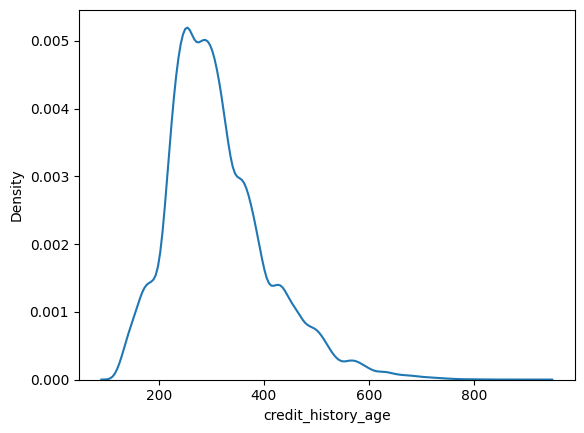

In [72]:
sns.kdeplot(data=X_train.sample(100000,random_state=42),x='credit_history_age')
plt.show()

In [73]:
print(X_train['credit_history_age'].isnull().sum())
print(X_test['credit_history_age'].isnull().sum())

18
11


In [74]:
X_train['credit_history_age']=X_train['credit_history_age'].fillna(X_train['credit_history_age'].median())
X_test['credit_history_age']=X_test['credit_history_age'].fillna(X_train['credit_history_age'].median())

In [75]:
print(X_train['credit_history_age'].isnull().sum())
print(X_test['credit_history_age'].isnull().sum())

0
0


/tmp/ipykernel_19/4082027754.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['months_since_last_pymnt'] = (pd.to_datetime('today') - X_train['last_pymnt_d']).dt.days // 30
/tmp/ipykernel_19/4082027754.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['months_since_last_pymnt'] = (pd.to_datetime('today') - X_test['last_pymnt_d']).dt.days // 30


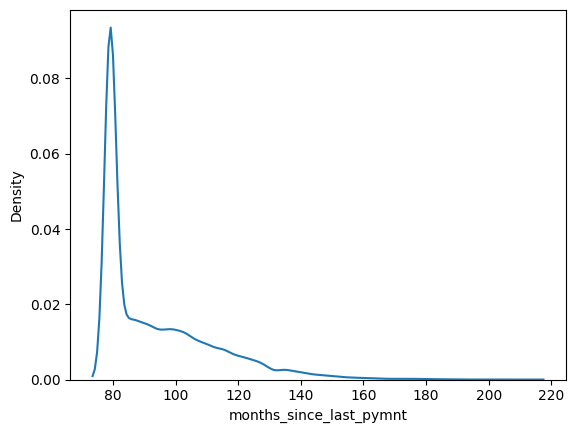

In [76]:
X_train['last_pymnt_d'] = pd.to_datetime(X_train['last_pymnt_d'], format='%b-%Y')
X_test['last_pymnt_d'] = pd.to_datetime(X_test['last_pymnt_d'], format='%b-%Y')

X_train['months_since_last_pymnt'] = (pd.to_datetime('today') - X_train['last_pymnt_d']).dt.days // 30
X_test['months_since_last_pymnt'] = (pd.to_datetime('today') - X_test['last_pymnt_d']).dt.days // 30

sns.kdeplot(data=X_train.sample(100000,random_state=42),x='months_since_last_pymnt')
plt.show()

/tmp/ipykernel_19/3524942549.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['months_since_last_pull'] = (pd.to_datetime('today') - X_train['last_credit_pull_d']).dt.days // 30
/tmp/ipykernel_19/3524942549.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['months_since_last_pull'] = (pd.to_datetime('today') - X_test['last_credit_pull_d']).dt.days // 30


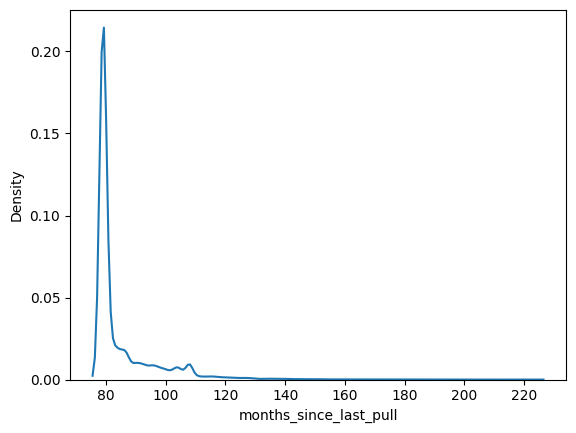

In [77]:
X_train['last_credit_pull_d'] = pd.to_datetime(X_train['last_credit_pull_d'], format='%b-%Y')
X_test['last_credit_pull_d'] = pd.to_datetime(X_test['last_credit_pull_d'], format='%b-%Y')

X_train['months_since_last_pull'] = (pd.to_datetime('today') - X_train['last_credit_pull_d']).dt.days // 30
X_test['months_since_last_pull'] = (pd.to_datetime('today') - X_test['last_credit_pull_d']).dt.days // 30

sns.kdeplot(data=X_train.sample(100000,random_state=42),x='months_since_last_pull')
plt.show()

In [78]:
missing_cat.index

Index(['emp_title', 'emp_length', 'title', 'zip_code', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [79]:
X_train[['emp_title', 'title', 'zip_code','last_pymnt_d', 'last_credit_pull_d']].isnull().sum()

emp_title                0
title                    0
zip_code                 1
last_pymnt_d          1810
last_credit_pull_d      54
dtype: int64

In [80]:
X_test[['emp_title', 'title', 'zip_code','last_pymnt_d', 'last_credit_pull_d']].isnull().sum()

emp_title               0
title                   0
zip_code                0
last_pymnt_d          617
last_credit_pull_d     18
dtype: int64

In [81]:
#We randomly impute the values as for the distribution for each feature won't be distorted
X_test.loc[X_test['months_since_last_pymnt'].isnull(), 'months_since_last_pymnt'] = X_train['months_since_last_pymnt'].dropna().sample(X_test['months_since_last_pymnt'].isnull().sum(), random_state=42).values
X_train.loc[X_train['months_since_last_pymnt'].isnull(), 'months_since_last_pymnt'] = X_train['months_since_last_pymnt'].dropna().sample(X_train['months_since_last_pymnt'].isnull().sum(), random_state=42).values

X_test.loc[X_test['months_since_last_pull'].isnull(), 'months_since_last_pull'] = X_train['months_since_last_pull'].dropna().sample(X_test['months_since_last_pull'].isnull().sum(), random_state=42).values
X_train.loc[X_train['months_since_last_pull'].isnull(), 'months_since_last_pull'] = X_train['months_since_last_pull'].dropna().sample(X_train['months_since_last_pull'].isnull().sum(), random_state=42).values


In [82]:
X_train.drop(columns=['last_pymnt_d', 'last_credit_pull_d'],inplace=True)
X_test.drop(columns=['last_pymnt_d', 'last_credit_pull_d'],inplace=True)

In [83]:
removed_cols=['emp_length','earliest_cr_line','last_pymnt_d', 'last_credit_pull_d']
added_cols=['emp_length_num','emp_length_missing','credit_history_age','months_since_last_pymnt','months_since_last_pull']
for col1,col2 in zip(removed_cols,added_cols):
    normal_cols.remove(col1)
    normal_cols.append(col2)

In [84]:
normal_cols.remove('y')

In [85]:
X_train[normal_cols].head()

loan_amnt        term   int_rate grade sub_grade  \
1404536    28200.0   36 months   8.190000     a        a4   
1686385    22950.0   60 months  13.490000     c        c2   
1919294    20000.0   36 months   7.900000     a        a4   
749681     10000.0   60 months  16.910000     c        c5   
869087     16000.0   60 months  18.940001     d        d2   

                            emp_title home_ownership  annual_inc  \
1404536             logistics manager           rent    185000.0   
1686385  pyshiatric nurse pratitioner       mortgage    125000.0   
1919294             desert west obgyn       mortgage     80000.0   
749681                        teacher           rent     52800.0   
869087                   electrician        mortgage     62400.0   

        verification_status   issue_d  ... pub_rec_bankruptcies tax_liens  \
1404536     source verified  nov-2018  ...                  0.0       0.0   
1686385            verified  mar-2017  ...                  0.0       0.0   
1919294        not verified  jul-2012  ...                  0.0       0.0   
749681      source verified  sep-2018  ...                  0.0       0.0   
869087      source verified  jul-2018  ...                  0.0       0.0   

        total_bc_limit hardship_flag disbursement_method debt_settlement_flag  \
1404536        23500.0             n                cash                    n   
1686385        37200.0             n                cash                    n   
1919294        23500.0             n                cash                    n   
749681        100100.0             n                cash                    n   
869087          2000.0             n                cash                    n   

         emp_length_num  emp_length_missing  credit_history_age  \
1404536            10.0                   0               276.0   
1686385             1.0                   0               259.0   
1919294             1.0                   0               310.0   
749681              5.0                   0               286.0   
869087              4.0                   0               236.0   

         months_since_last_pymnt  
1404536                     79.0  
1686385                     79.0  
1919294                    123.0  
749681                      79.0  
869087                      79.0  

[5 rows x 92 columns]

In [86]:
#We donot require zipcode in our data so we drop it 
X_train.drop(columns=['zip_code'],inplace=True)
X_test.drop(columns=['zip_code'],inplace=True)

In [87]:
normal_cols.remove('zip_code')

In [88]:
X_train[normal_cols].isnull().sum()[X_train[normal_cols].isnull().sum().values>0]

Series([], dtype: int64)

In [89]:
X_test[normal_cols].isnull().sum()[X_test[normal_cols].isnull().sum().values>0]

Series([], dtype: int64)

In [90]:
X_train[nan_col_50_per]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

desc  \
1404536                                                NaN   
1686385                                                NaN   
1919294    borrower added on 06/25/12 > we are young fa...   
749681                                                 NaN   
869087                                                 NaN   
...                                                    ...   
732186                                                 NaN   
110268                                                 NaN   
1692766                                                NaN   
2229115                                                NaN   
2219141                                                NaN   

         mths_since_last_delinq  mths_since_last_record next_pymnt_d  \
1404536                     NaN                     NaN     apr-2019   
1686385                     NaN                     NaN     apr-2019   
1919294                     NaN                     NaN          NaN   
749681                      NaN                     NaN     apr-2019   
869087                      NaN                     NaN     apr-2019   
...                         ...                     ...          ...   
732186                     17.0                     NaN          NaN   
110268                      NaN                     NaN          NaN   
1692766                    44.0                     NaN          NaN   
2229115                     NaN                     NaN          NaN   
2219141                     NaN                    57.0          NaN   

         mths_since_last_major_derog  annual_inc_joint  dti_joint  \
1404536                          NaN               NaN        NaN   
1686385                          NaN               NaN        NaN   
1919294                          NaN               NaN        NaN   
749681                           NaN               NaN        NaN   
869087                           NaN           97200.0      12.17   
...                              ...               ...        ...   
732186                          17.0               NaN        NaN   
110268                           NaN               NaN        NaN   
1692766                         44.0               NaN        NaN   
2229115                          NaN               NaN        NaN   
2219141                          NaN               NaN        NaN   

        verification_status_joint  mths_since_recent_bc_dlq  \
1404536                       NaN                       NaN   
1686385                       NaN                       NaN   
1919294                       NaN                       NaN   
749681                        NaN                       NaN   
869087            source verified                       NaN   
...                           ...                       ...   
732186                        NaN                      17.0   
110268                        NaN                       NaN   
1692766                       NaN                      44.0   
2229115                       NaN                       NaN   
2219141                       NaN                       NaN   

         mths_since_recent_revol_delinq  ...  hardship_loan_status  \
1404536                             NaN  ...                   NaN   
1686385                             NaN  ...                   NaN   
1919294                             NaN  ...                   NaN   
749681                              NaN  ...                   NaN   
869087                              NaN  ...                   NaN   
...                                 ...  ...                   ...   
732186                             17.0  ...                   NaN   
110268                              NaN  ...                   NaN   
1692766                            44.0  ...                   NaN   
2229115                             NaN  ...                   NaN   
2219141                             NaN  ...                   NaN   

         orig_pro

In [91]:
X_test[nan_col_50_per]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

desc  \
1758074    borrower added on 12/11/13 > i'm paying amer...   
686539                                                 NaN   
900731                                                 NaN   
1727935                                                NaN   
539695                                                 NaN   
...                                                    ...   
413440                                                 NaN   
1596977                                                NaN   
2142261                                                NaN   
1111967                                                NaN   
302421                                                 NaN   

         mths_since_last_delinq  mths_since_last_record next_pymnt_d  \
1758074                    53.0                     NaN          NaN   
686539                     83.0                     NaN          NaN   
900731                      NaN                     NaN     apr-2019   
1727935                     6.0                     NaN          NaN   
539695                      5.0                     NaN     apr-2019   
...                         ...                     ...          ...   
413440                      NaN                     NaN          NaN   
1596977                    36.0                     NaN     apr-2019   
2142261                     NaN                     NaN     apr-2019   
1111967                     NaN                     2.0          NaN   
302421                     39.0                     NaN          NaN   

         mths_since_last_major_derog  annual_inc_joint  dti_joint  \
1758074                          NaN               NaN        NaN   
686539                          83.0               NaN        NaN   
900731                           NaN               NaN        NaN   
1727935                          NaN               NaN        NaN   
539695                          18.0               NaN        NaN   
...                              ...               ...        ...   
413440                           NaN               NaN        NaN   
1596977                         36.0               NaN        NaN   
2142261                          NaN               NaN        NaN   
1111967                          NaN               NaN        NaN   
302421                          39.0               NaN        NaN   

        verification_status_joint  mths_since_recent_bc_dlq  \
1758074                       NaN                      53.0   
686539                        NaN                      83.0   
900731                        NaN                       NaN   
1727935                       NaN                       6.0   
539695                        NaN                       NaN   
...                           ...                       ...   
413440                        NaN                       NaN   
1596977                       NaN                      36.0   
2142261                       NaN                       NaN   
1111967                       NaN                       NaN   
302421                        NaN                       NaN   

         mths_since_recent_revol_delinq  ...  hardship_loan_status  \
1758074                            53.0  ...                   NaN   
686539                             83.0  ...                   NaN   
900731                              NaN  ...                   NaN   
1727935                             6.0  ...                   NaN   
539695                             17.0  ...                   NaN   
...                                 ...  ...                   ...   
413440                              NaN  ...                   NaN   
1596977                            36.0  ...                   NaN   
2142261                             NaN  ...                   NaN   
1111967                             NaN  ...                   NaN   
302421                             39.0  ...                   NaN   

         orig_pro

In [92]:
#For Columns that are having more than 50% nan values, we impute them with missing value indicator

In [93]:
X_train.sample(100000)[nan_col_50_per].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1076843 to 2149965
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   desc                                        5572 non-null   object 
 1   mths_since_last_delinq                      48675 non-null  float32
 2   mths_since_last_record                      15645 non-null  float32
 3   next_pymnt_d                                40227 non-null  object 
 4   mths_since_last_major_derog                 25603 non-null  float32
 5   annual_inc_joint                            5309 non-null   float32
 6   dti_joint                                   5309 non-null   float32
 7   verification_status_joint                   5114 non-null   object 
 8   mths_since_recent_bc_dlq                    23012 non-null  float32
 9   mths_since_recent_revol_delinq              32907 non-null  float32
 10  revol_

In [94]:
total_num = X_train.select_dtypes(include=['int64', 'float32', 'float64']).columns.tolist()

# Categorical columns (objects, strings, categories, etc.)
total_cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [95]:
print(len(X_train.columns))
print(len(X_test.columns))

135
135


In [96]:
sample=X_train.sample(100000)

In [97]:
# Correlation matrix
corr_matrix = sample[total_num].corr()

# Mask everything that is <=0.9 (keep diagonal = 1.0 if you want)
filtered_corr = corr_matrix.where(((corr_matrix > 0.9) & (corr_matrix < 1.0)), other=0)

print(filtered_corr)


                         loan_amnt  int_rate  annual_inc  dti  delinq_2yrs  \
loan_amnt                      0.0       0.0         0.0  0.0          0.0   
int_rate                       0.0       0.0         0.0  0.0          0.0   
annual_inc                     0.0       0.0         0.0  0.0          0.0   
dti                            0.0       0.0         0.0  0.0          0.0   
delinq_2yrs                    0.0       0.0         0.0  0.0          0.0   
...                            ...       ...         ...  ...          ...   
emp_length_num                 0.0       0.0         0.0  0.0          0.0   
emp_length_missing             0.0       0.0         0.0  0.0          0.0   
credit_history_age             0.0       0.0         0.0  0.0          0.0   
months_since_last_pymnt        0.0       0.0         0.0  0.0          0.0   
months_since_last_pull         0.0       0.0         0.0  0.0          0.0   

                         fico_range_low  inq_last_6mths  \
loan

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [98]:
# Take the upper triangle (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Dropping:", to_drop,len(to_drop))

Dropping: ['sec_app_fico_range_high', 'orig_projected_additional_accrued_interest', 'settlement_amount'] 3


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [99]:
# Drop from dataframe
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

In [100]:
X_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt        term   int_rate grade sub_grade  \
1404536    28200.0   36 months   8.190000     a        a4   
1686385    22950.0   60 months  13.490000     c        c2   
1919294    20000.0   36 months   7.900000     a        a4   
749681     10000.0   60 months  16.910000     c        c5   
869087     16000.0   60 months  18.940001     d        d2   

                            emp_title home_ownership  annual_inc  \
1404536             logistics manager           rent    185000.0   
1686385  pyshiatric nurse pratitioner       mortgage    125000.0   
1919294             desert west obgyn       mortgage     80000.0   
749681                        teacher           rent     52800.0   
869087                   electrician        mortgage     62400.0   

        verification_status   issue_d  ... debt_settlement_flag_date  \
1404536     source verified  nov-2018  ...                       NaN   
1686385            verified  mar-2017  ...                       NaN   
1919294        not verified  jul-2012  ...                       NaN   
749681      source verified  sep-2018  ...                       NaN   
869087      source verified  jul-2018  ...                       NaN   

        settlement_status settlement_date settlement_percentage  \
1404536               NaN             NaN                   NaN   
1686385               NaN             NaN                   NaN   
1919294               NaN             NaN                   NaN   
749681                NaN             NaN                   NaN   
869087                NaN             NaN                   NaN   

        settlement_term emp_length_num  emp_length_missing  \
1404536             NaN           10.0                   0   
1686385             NaN            1.0                   0   
1919294             NaN            1.0                   0   
749681              NaN            5.0                   0   
869087              NaN            4.0                   0   

         credit_history_age  months_since_last_pymnt  months_since_last_pull  
1404536               276.0                     79.0                    79.0  
1686385               259.0                     79.0                    79.0  
1919294               310.0                    123.0                    79.0  
749681                286.0                     79.0                    79.0  
869087                236.0                     79.0                    79.0  

[5 rows x 132 columns]

In [101]:
X_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt        term   int_rate grade sub_grade  \
1758074    28000.0   36 months   6.620000     a        a2   
686539     10650.0   36 months  25.110001     f        f1   
900731     18000.0   36 months  10.910000     b        b4   
1727935     3975.0   36 months  17.990000     d        d2   
539695      4800.0   36 months  16.020000     c        c5   

                              emp_title home_ownership  annual_inc  \
1758074                regional manager       mortgage    125000.0   
686539                     truck driver       mortgage     83000.0   
900731    therapist/clinical supervisor       mortgage    104000.0   
1727935                 service advisor            any     43000.0   
539695                          analyst           rent     80000.0   

        verification_status   issue_d  ... debt_settlement_flag_date  \
1758074            verified  dec-2013  ...                       NaN   
686539             verified  may-2016  ...                       NaN   
900731      source verified  jun-2017  ...                       NaN   
1727935     source verified  jan-2017  ...                       NaN   
539695      source verified  sep-2017  ...                       NaN   

        settlement_status settlement_date settlement_percentage  \
1758074               NaN             NaN                   NaN   
686539                NaN             NaN                   NaN   
900731                NaN             NaN                   NaN   
1727935               NaN             NaN                   NaN   
539695                NaN             NaN                   NaN   

        settlement_term emp_length_num  emp_length_missing  \
1758074             NaN           10.0                   0   
686539              NaN           10.0                   0   
900731              NaN            9.0                   0   
1727935             NaN            2.0                   0   
539695              NaN            0.0                   0   

         credit_history_age  months_since_last_pymnt  months_since_last_pull  
1758074               335.0                    106.0                    79.0  
686539                263.0                     96.0                    79.0  
900731                250.0                     79.0                    79.0  
1727935               234.0                    101.0                    90.0  
539695                281.0                     79.0                    79.0  

[5 rows x 132 columns]

In [102]:
nan_col_50_per=[x for x in nan_col_50_per if x not in to_drop]

In [103]:
X_train[nan_col_50_per]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

desc  \
1404536                                                NaN   
1686385                                                NaN   
1919294    borrower added on 06/25/12 > we are young fa...   
749681                                                 NaN   
869087                                                 NaN   
...                                                    ...   
732186                                                 NaN   
110268                                                 NaN   
1692766                                                NaN   
2229115                                                NaN   
2219141                                                NaN   

         mths_since_last_delinq  mths_since_last_record next_pymnt_d  \
1404536                     NaN                     NaN     apr-2019   
1686385                     NaN                     NaN     apr-2019   
1919294                     NaN                     NaN          NaN   
749681                      NaN                     NaN     apr-2019   
869087                      NaN                     NaN     apr-2019   
...                         ...                     ...          ...   
732186                     17.0                     NaN          NaN   
110268                      NaN                     NaN          NaN   
1692766                    44.0                     NaN          NaN   
2229115                     NaN                     NaN          NaN   
2219141                     NaN                    57.0          NaN   

         mths_since_last_major_derog  annual_inc_joint  dti_joint  \
1404536                          NaN               NaN        NaN   
1686385                          NaN               NaN        NaN   
1919294                          NaN               NaN        NaN   
749681                           NaN               NaN        NaN   
869087                           NaN           97200.0      12.17   
...                              ...               ...        ...   
732186                          17.0               NaN        NaN   
110268                           NaN               NaN        NaN   
1692766                         44.0               NaN        NaN   
2229115                          NaN               NaN        NaN   
2219141                          NaN               NaN        NaN   

        verification_status_joint  mths_since_recent_bc_dlq  \
1404536                       NaN                       NaN   
1686385                       NaN                       NaN   
1919294                       NaN                       NaN   
749681                        NaN                       NaN   
869087            source verified                       NaN   
...                           ...                       ...   
732186                        NaN                      17.0   
110268                        NaN                       NaN   
1692766                       NaN                      44.0   
2229115                       NaN                       NaN   
2219141                       NaN                       NaN   

         mths_since_recent_revol_delinq  ...  hardship_length  hardship_dpd  \
1404536                             NaN  ...              NaN           NaN   
1686385                             NaN  ...              NaN           NaN   
1919294                             NaN  ...              NaN           NaN   
749681                              NaN  ...              NaN           NaN   
869087                              NaN  ...              NaN           NaN   
...                                 ...  ...              ...           ...   
732186                             17.0  ...              NaN           NaN   
110268                              NaN  ...              NaN           NaN   
1692766                            44.0  ...              NaN           NaN   
2229115                             NaN  ...              NaN       

In [104]:
X_test[nan_col_50_per]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

desc  \
1758074    borrower added on 12/11/13 > i'm paying amer...   
686539                                                 NaN   
900731                                                 NaN   
1727935                                                NaN   
539695                                                 NaN   
...                                                    ...   
413440                                                 NaN   
1596977                                                NaN   
2142261                                                NaN   
1111967                                                NaN   
302421                                                 NaN   

         mths_since_last_delinq  mths_since_last_record next_pymnt_d  \
1758074                    53.0                     NaN          NaN   
686539                     83.0                     NaN          NaN   
900731                      NaN                     NaN     apr-2019   
1727935                     6.0                     NaN          NaN   
539695                      5.0                     NaN     apr-2019   
...                         ...                     ...          ...   
413440                      NaN                     NaN          NaN   
1596977                    36.0                     NaN     apr-2019   
2142261                     NaN                     NaN     apr-2019   
1111967                     NaN                     2.0          NaN   
302421                     39.0                     NaN          NaN   

         mths_since_last_major_derog  annual_inc_joint  dti_joint  \
1758074                          NaN               NaN        NaN   
686539                          83.0               NaN        NaN   
900731                           NaN               NaN        NaN   
1727935                          NaN               NaN        NaN   
539695                          18.0               NaN        NaN   
...                              ...               ...        ...   
413440                           NaN               NaN        NaN   
1596977                         36.0               NaN        NaN   
2142261                          NaN               NaN        NaN   
1111967                          NaN               NaN        NaN   
302421                          39.0               NaN        NaN   

        verification_status_joint  mths_since_recent_bc_dlq  \
1758074                       NaN                      53.0   
686539                        NaN                      83.0   
900731                        NaN                       NaN   
1727935                       NaN                       6.0   
539695                        NaN                       NaN   
...                           ...                       ...   
413440                        NaN                       NaN   
1596977                       NaN                      36.0   
2142261                       NaN                       NaN   
1111967                       NaN                       NaN   
302421                        NaN                       NaN   

         mths_since_recent_revol_delinq  ...  hardship_length  hardship_dpd  \
1758074                            53.0  ...              NaN           NaN   
686539                             83.0  ...              NaN           NaN   
900731                              NaN  ...              NaN           NaN   
1727935                             6.0  ...              NaN           NaN   
539695                             17.0  ...              NaN           NaN   
...                                 ...  ...              ...           ...   
413440                              NaN  ...              NaN           NaN   
1596977                            36.0  ...              NaN           NaN   
2142261                             NaN  ...              NaN           NaN   
1111967                             NaN  ...              NaN       

In [105]:
sample=X_train.sample(100000,random_state=42)

In [106]:
sample[nan_col_50_per].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1926939 to 1758245
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   desc                                 5616 non-null   object 
 1   mths_since_last_delinq               48912 non-null  float32
 2   mths_since_last_record               16005 non-null  float32
 3   next_pymnt_d                         40515 non-null  object 
 4   mths_since_last_major_derog          25741 non-null  float32
 5   annual_inc_joint                     5401 non-null   float32
 6   dti_joint                            5401 non-null   float32
 7   verification_status_joint            5172 non-null   object 
 8   mths_since_recent_bc_dlq             23084 non-null  float32
 9   mths_since_recent_revol_delinq       32830 non-null  float32
 10  revol_bal_joint                      4863 non-null   float32
 11  sec_app_fico_range_low  

In [107]:
num_50_per = X_train[nan_col_50_per].select_dtypes(include=['int64', 'float32', 'float64']).columns.tolist()

# Categorical columns (objects, strings, categories, etc.)
cat_50_per = X_train[nan_col_50_per].select_dtypes(include=['object', 'category']).columns.tolist()

In [108]:
x_train_navalues=pd.DataFrame({'Missing count':X_train.isnull().sum(),'Percentage':(X_train.isnull().sum()/df.shape[0])*100},index=X_train.isnull().sum().index)

In [109]:
x_train_navalues=x_train_navalues.loc[x_train_navalues['Missing count']>0]

In [110]:
x_train_navalues

Missing count  Percentage
desc                                       1600969   70.818404
mths_since_last_delinq                      868810   38.431561
mths_since_last_record                     1425681   63.064590
next_pymnt_d                               1009200   44.641672
mths_since_last_major_derog                1259734   55.723972
annual_inc_joint                           1605001   70.996758
dti_joint                                  1605005   70.996935
verification_status_joint                  1608710   71.160825
mths_since_recent_bc_dlq                   1305764   57.760096
mths_since_recent_revol_delinq             1140552   50.451990
revol_bal_joint                            1614605   71.421589
sec_app_fico_range_low                     1614605   71.421589
sec_app_earliest_cr_line                   1614605   71.421589
sec_app_inq_last_6mths                     1614605   71.421589
sec_app_mort_acc                           1614605   71.421589
sec_app_open_acc                           1614605   71.421589
sec_app_revol_util                         1615969   71.481925
sec_app_open_act_il                        1614605   71.421589
sec_app_num_rev_accts                      1614605   71.421589
sec_app_chargeoff_within_12_mths           1614605   71.421589
sec_app_collections_12_mths_ex_med         1614605   71.421589
sec_app_mths_since_last_major_derog        1668695   73.814244
hardship_type                              1687282   74.636435
hardship_reason                            1687282   74.636435
hardship_status                            1687282   74.636435
deferral_term                              1687282   74.636435
hardship_amount                            1687282   74.636435
hardship_start_date                        1687282   74.636435
hardship_end_date                          1687282   74.636435
payment_plan_start_date                    1687282   74.636435
hardship_length                            1687282   74.636435
hardship_dpd                               1687282   74.636435
hardship_loan_status                       1687282   74.636435
hardship_payoff_balance_amount             1687282   74.636435
hardship_last_payment_amount               1687282   74.636435
debt_settlement_flag_date                  1669849   73.865291
settlement_status                          1669849   73.865291
settlement_date                            1669849   73.865291
settlement_percentage                      1669849   73.865291
settlement_term                            1669849   73.865291

In [111]:
nan_col_50_per=list(x_train_navalues.index)

In [112]:
for col in nan_col_50_per:
    X_train[col+'_missing']=X_train[col].isnull().astype(int)
    X_test[col+'_missing']=X_test[col].isnull().astype(int)

/tmp/ipykernel_19/3832585888.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[col+'_missing']=X_train[col].isnull().astype(int)
/tmp/ipykernel_19/3832585888.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col+'_missing']=X_test[col].isnull().astype(int)
/tmp/ipykernel_19/3832585888.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

In [113]:
nan_col_50_per

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_percentage',
 'settlement_term']

In [114]:
# numeric missing-value cols
num_nan_cols = [col for col in nan_col_50_per if col in X_train.select_dtypes(include=['number']).columns]

# categorical missing-value cols
cat_nan_cols = [col for col in nan_col_50_per if col in X_train.select_dtypes(exclude=['number']).columns]


In [115]:
num_nan_cols

['mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'deferral_term',
 'hardship_amount',
 'hardship_length',
 'hardship_dpd',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'settlement_percentage',
 'settlement_term']

In [116]:
sample=X_train.sample(100000,random_state=42)

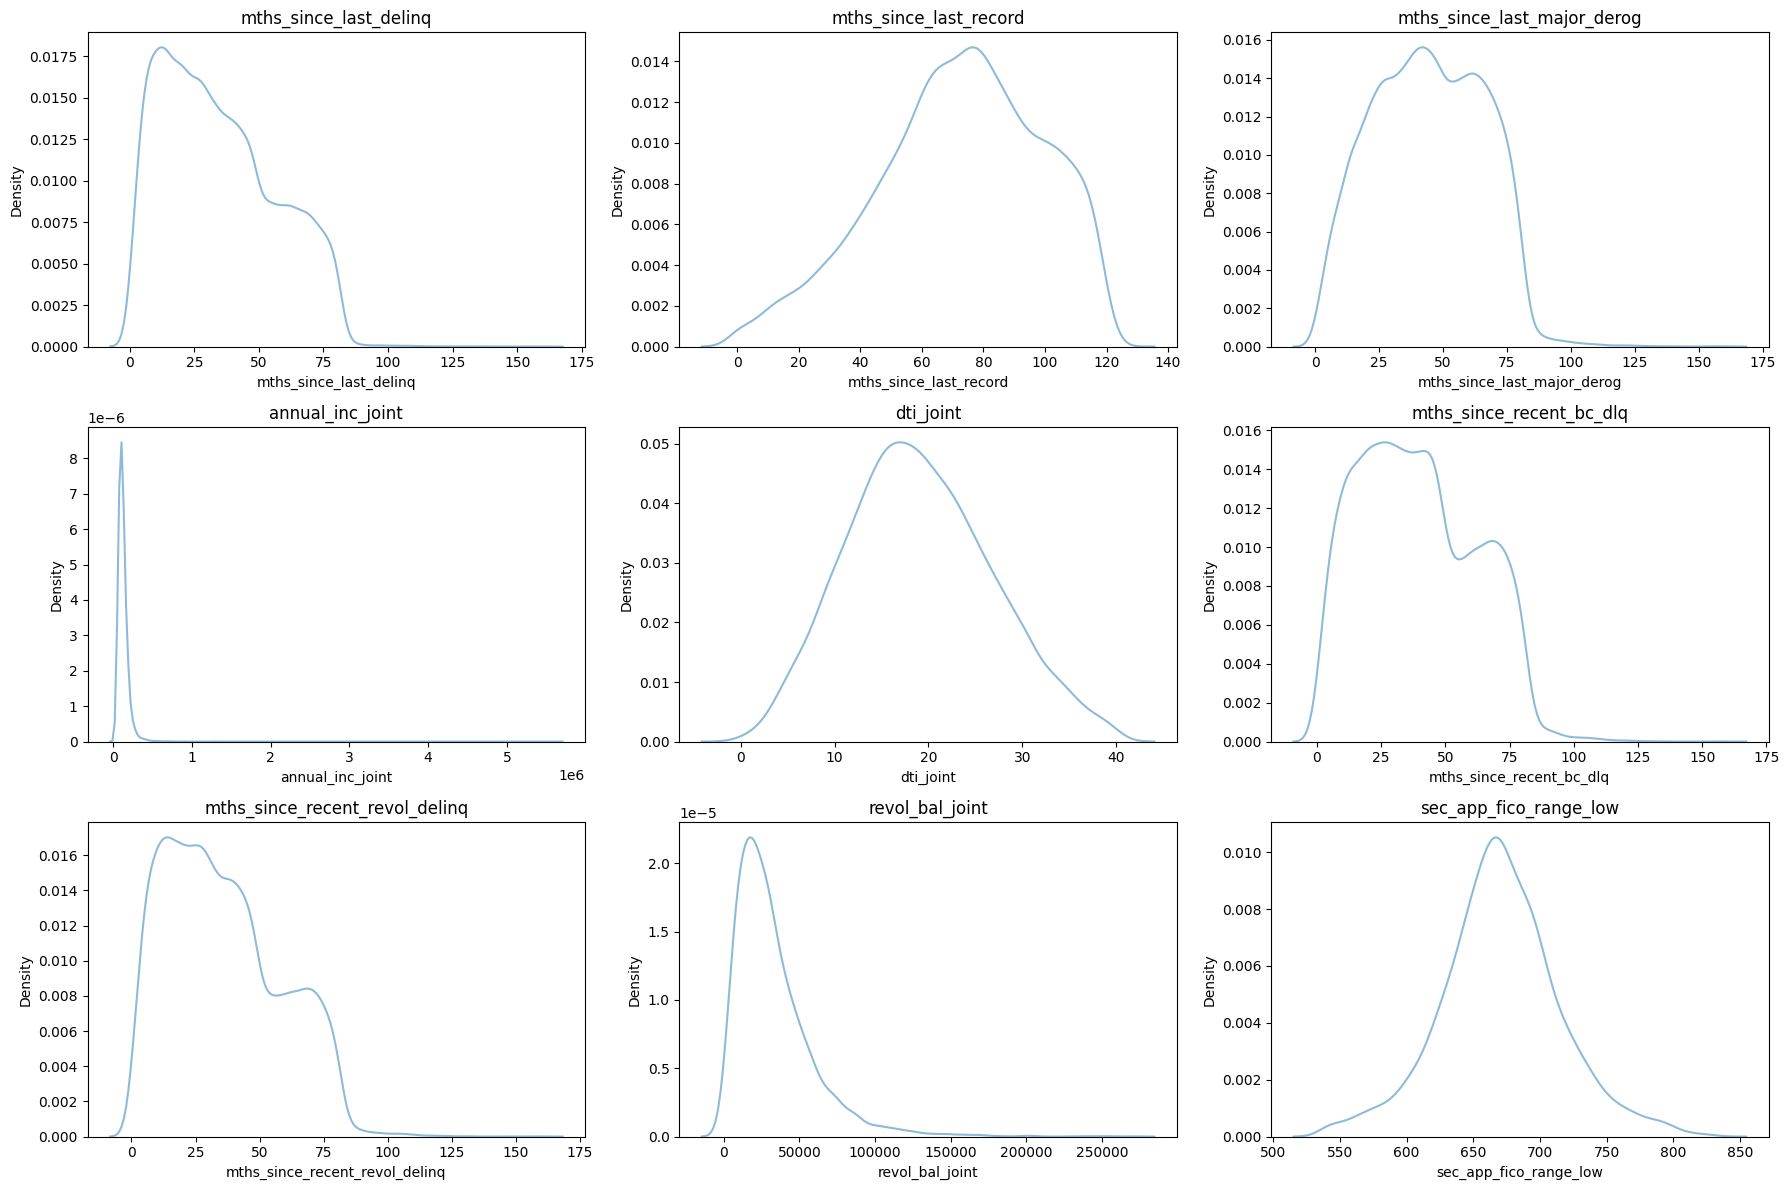

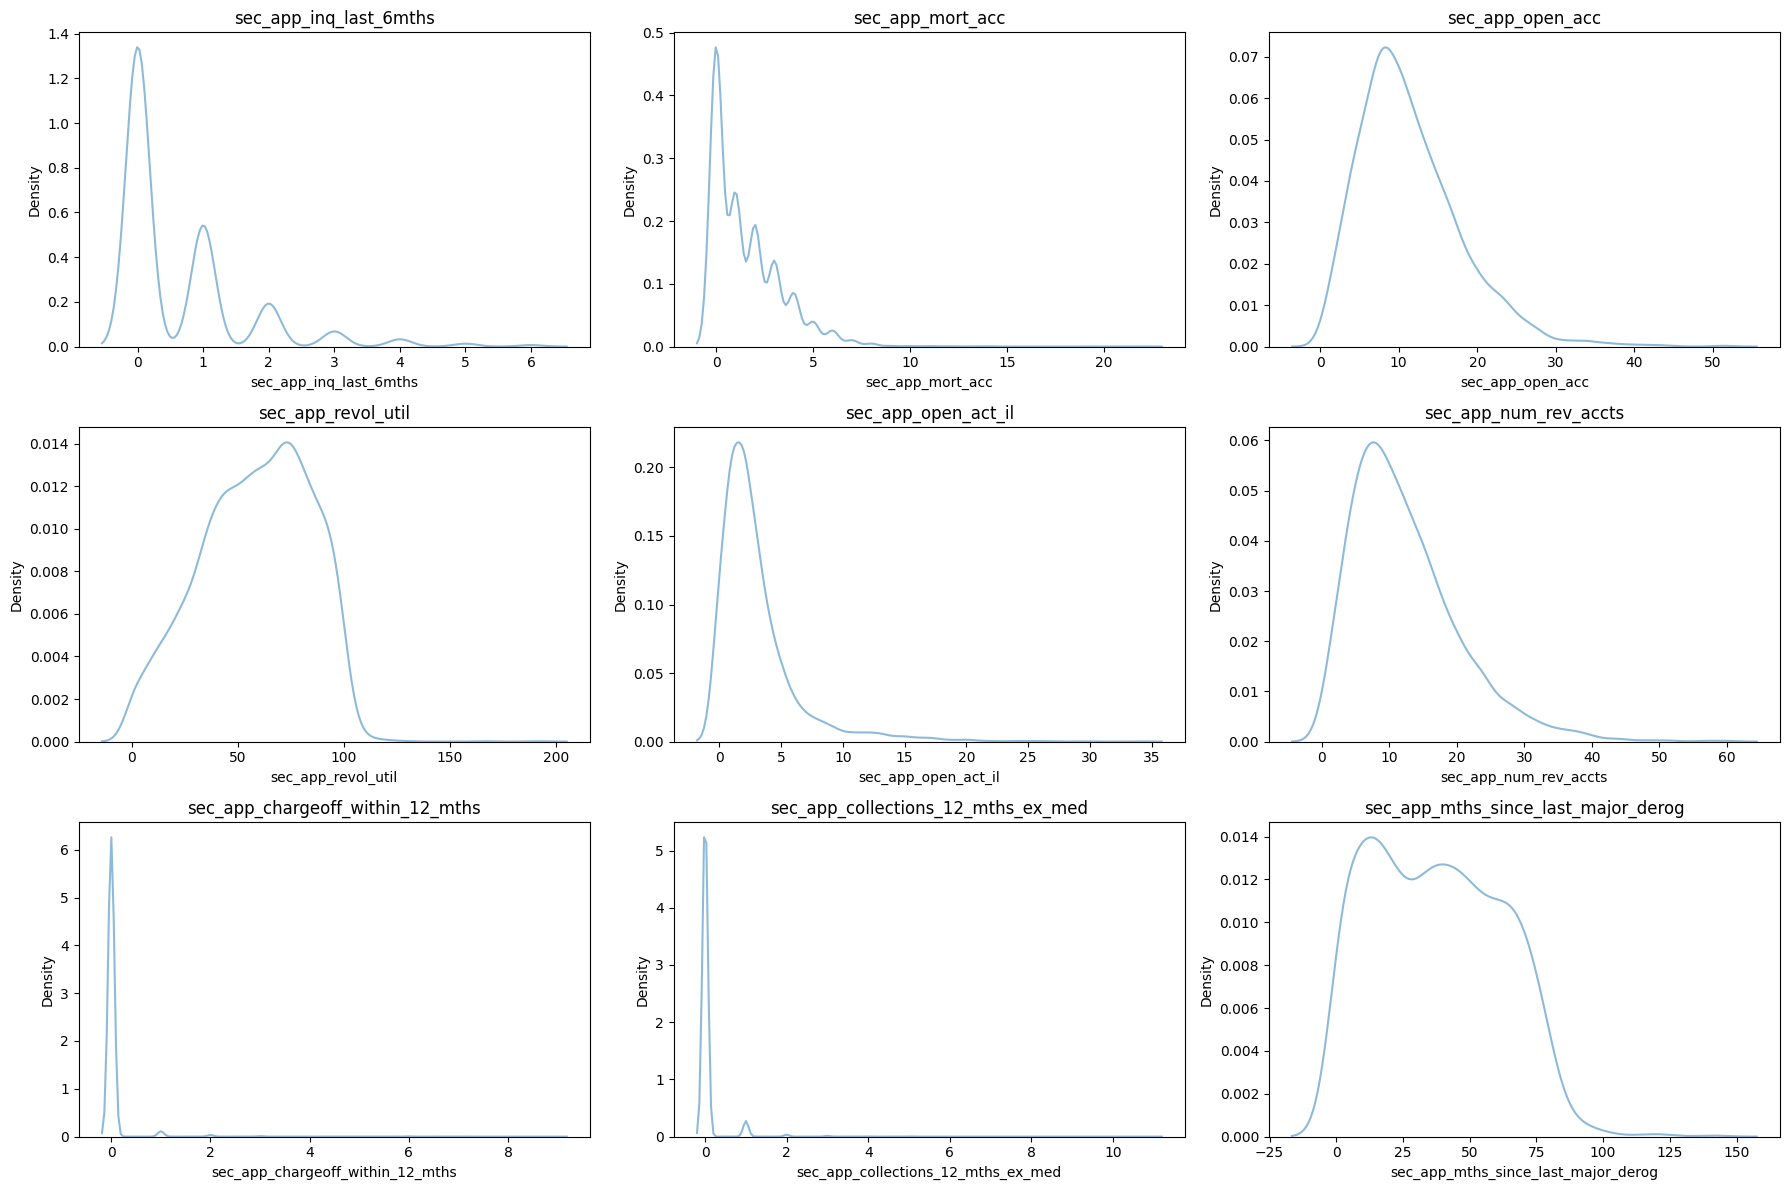

/tmp/ipykernel_19/4003305279.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=sample, x=col, ax=axes[i], alpha=0.5)
/tmp/ipykernel_19/4003305279.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=sample, x=col, ax=axes[i], alpha=0.5)


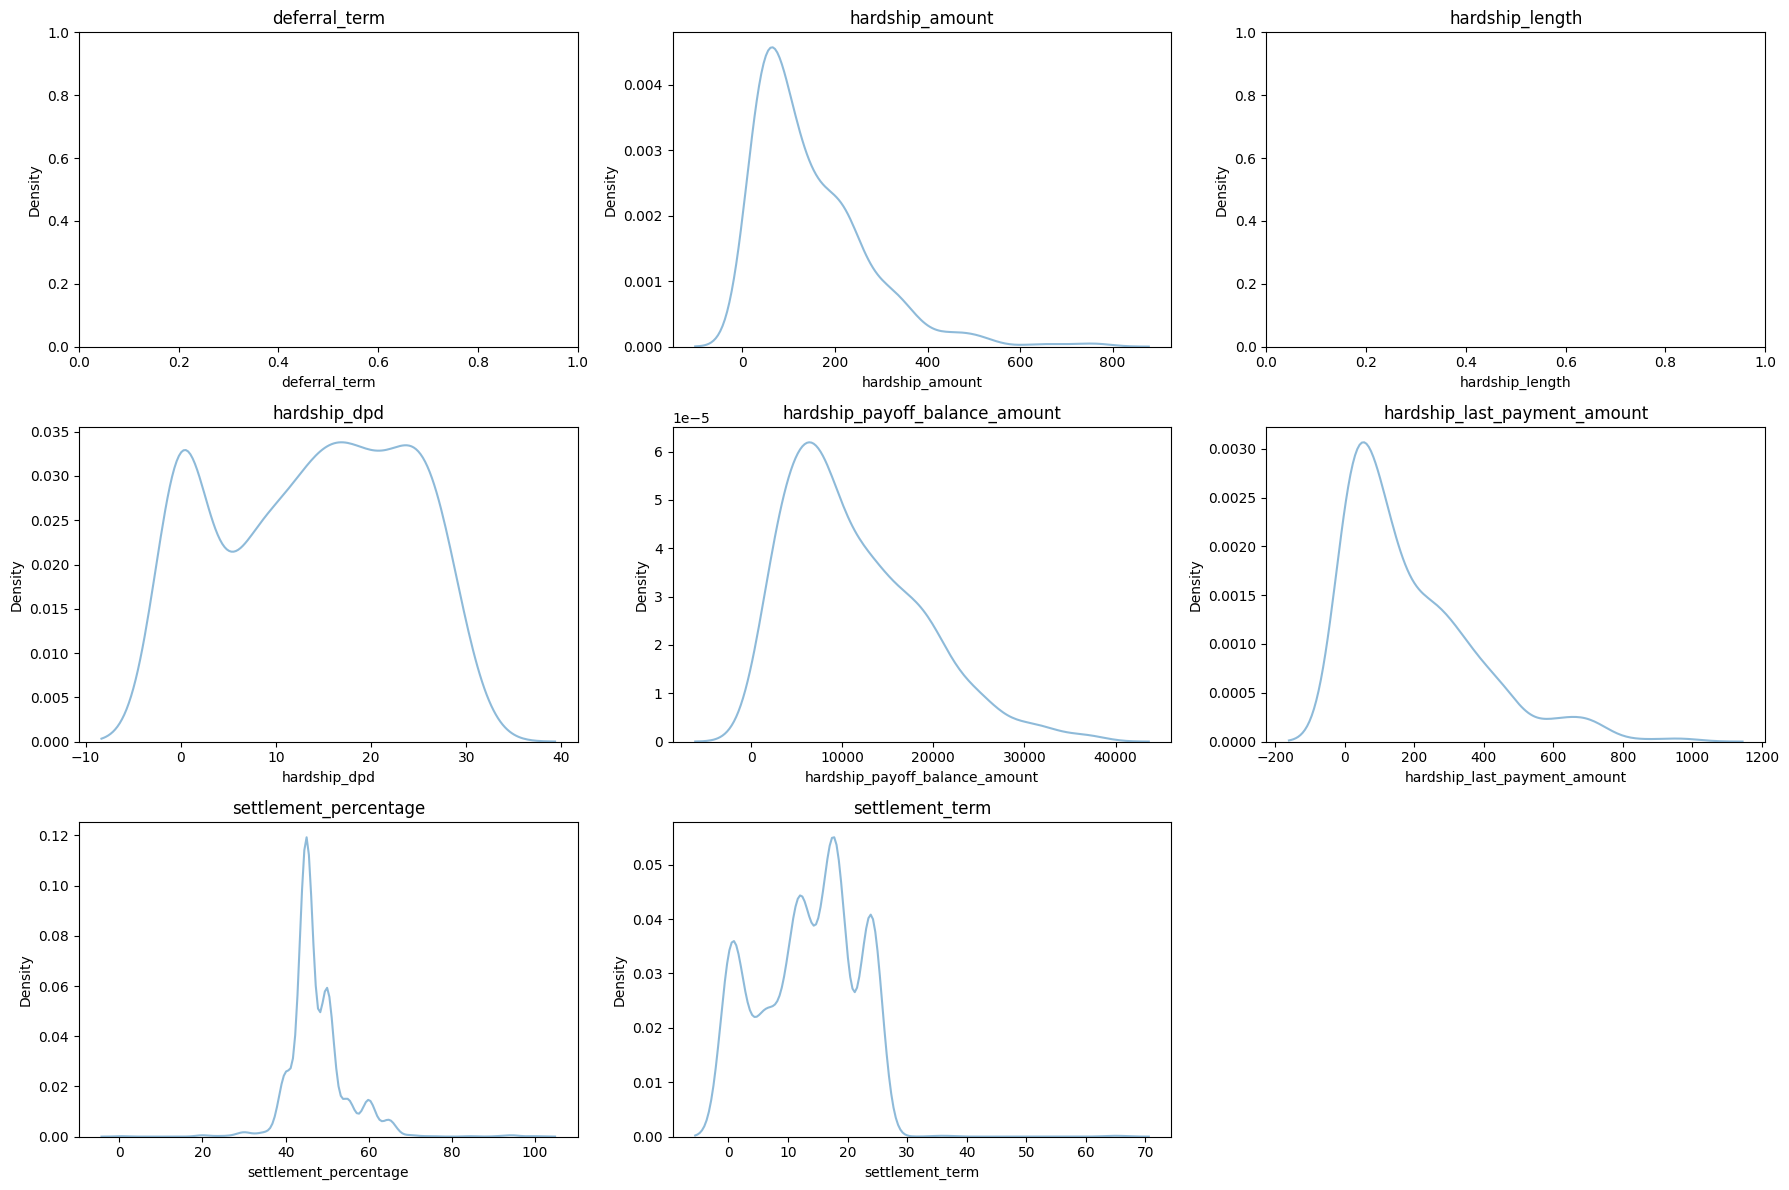

In [117]:
import warnings
import math

warnings.filterwarnings('ignore', category=FutureWarning)

cols_per_row = 3
plots_per_page = 9  # 3 rows × 3 cols per page

total_cols = len(num_nan_cols)
pages = math.ceil(total_cols / plots_per_page)

for page in range(pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, total_cols)
    cols_subset = num_nan_cols[start:end]
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_subset):
        sns.kdeplot(data=sample, x=col, ax=axes[i], alpha=0.5)
        axes[i].set_title(col)
    
    # Remove empty subplots
    for j in range(len(cols_subset), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [118]:
df[num_nan_cols].isnull().sum()

mths_since_last_delinq                 1158502
mths_since_last_record                 1901512
mths_since_last_major_derog            1679893
annual_inc_joint                       2139958
dti_joint                              2139962
mths_since_recent_bc_dlq               1740967
mths_since_recent_revol_delinq         1520309
revol_bal_joint                        2152648
sec_app_fico_range_low                 2152647
sec_app_inq_last_6mths                 2152647
sec_app_mort_acc                       2152647
sec_app_open_acc                       2152647
sec_app_revol_util                     2154484
sec_app_open_act_il                    2152647
sec_app_num_rev_accts                  2152647
sec_app_chargeoff_within_12_mths       2152647
sec_app_collections_12_mths_ex_med     2152647
sec_app_mths_since_last_major_derog    2224726
deferral_term                          2249751
hardship_amount                        2249751
hardship_length                        2249751
hardship_dpd 

In [119]:
for col in num_nan_cols:
    for cls in [0, 1]:
        X_test.loc[(X_test[col].isnull()) & (y_test == cls), col] = X_train.loc[(X_train[col].notnull()) & (y_train == cls), col].sample(((X_test[col].isnull()) & (y_test == cls)).sum(), random_state=42, replace=True).values
        X_train.loc[(X_train[col].isnull()) & (y_train == cls), col] = X_train.loc[(X_train[col].notnull()) & (y_train == cls), col].sample(((X_train[col].isnull()) & (y_train == cls)).sum(), random_state=42, replace=True).values

In [120]:
X_train[num_nan_cols].isnull().sum()

mths_since_last_delinq                 0
mths_since_last_record                 0
mths_since_last_major_derog            0
annual_inc_joint                       0
dti_joint                              0
mths_since_recent_bc_dlq               0
mths_since_recent_revol_delinq         0
revol_bal_joint                        0
sec_app_fico_range_low                 0
sec_app_inq_last_6mths                 0
sec_app_mort_acc                       0
sec_app_open_acc                       0
sec_app_revol_util                     0
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_since_last_major_derog    0
deferral_term                          0
hardship_amount                        0
hardship_length                        0
hardship_dpd                           0
hardship_payoff_balance_amount         0
hardship_last_payment_amount           0
settlement_perce

In [121]:
X_test[num_nan_cols].isnull().sum()

mths_since_last_delinq                 0
mths_since_last_record                 0
mths_since_last_major_derog            0
annual_inc_joint                       0
dti_joint                              0
mths_since_recent_bc_dlq               0
mths_since_recent_revol_delinq         0
revol_bal_joint                        0
sec_app_fico_range_low                 0
sec_app_inq_last_6mths                 0
sec_app_mort_acc                       0
sec_app_open_acc                       0
sec_app_revol_util                     0
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_since_last_major_derog    0
deferral_term                          0
hardship_amount                        0
hardship_length                        0
hardship_dpd                           0
hardship_payoff_balance_amount         0
hardship_last_payment_amount           0
settlement_perce

In [122]:
X_train[cat_nan_cols].isnull().sum()

desc                         1600969
next_pymnt_d                 1009200
verification_status_joint    1608710
sec_app_earliest_cr_line     1614605
hardship_type                1687282
hardship_reason              1687282
hardship_status              1687282
hardship_start_date          1687282
hardship_end_date            1687282
payment_plan_start_date      1687282
hardship_loan_status         1687282
debt_settlement_flag_date    1669849
settlement_status            1669849
settlement_date              1669849
dtype: int64

In [123]:
X_test[cat_nan_cols].isnull().sum()

desc                         533634
next_pymnt_d                 336110
verification_status_joint    536228
sec_app_earliest_cr_line     538042
hardship_type                562469
hardship_reason              562469
hardship_status              562469
hardship_start_date          562469
hardship_end_date            562469
payment_plan_start_date      562469
hardship_loan_status         562469
debt_settlement_flag_date    556573
settlement_status            556573
settlement_date              556573
dtype: int64

In [124]:
for col in cat_nan_cols:
    print(X_train[col].value_counts())

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         188
debt consolidation                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [125]:
date_cols = [
    "next_pymnt_d",
    "sec_app_earliest_cr_line",
    "hardship_start_date",
    "hardship_end_date",
    "payment_plan_start_date",
    "debt_settlement_flag_date",
    "settlement_date"
]


for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%Y', errors='coerce')
    X_test[col] = pd.to_datetime(X_test[col], format='%b-%Y', errors='coerce')
    X_train[col + "_months_since"] = (pd.to_datetime('today') - X_train[col]).dt.days // 30
    X_test[col + "_months_since"] = (pd.to_datetime('today') - X_test[col]).dt.days // 30

X_train.drop(columns=date_cols, inplace=True)
X_test.drop(columns=date_cols, inplace=True)

/tmp/ipykernel_19/2757021724.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[col + "_months_since"] = (pd.to_datetime('today') - X_train[col]).dt.days // 30
/tmp/ipykernel_19/2757021724.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col + "_months_since"] = (pd.to_datetime('today') - X_test[col]).dt.days // 30
/tmp/ipykernel_19/2757021724.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

In [126]:
X_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

loan_amnt        term   int_rate grade sub_grade  \
1404536    28200.0   36 months   8.190000     a        a4   
1686385    22950.0   60 months  13.490000     c        c2   
1919294    20000.0   36 months   7.900000     a        a4   
749681     10000.0   60 months  16.910000     c        c5   
869087     16000.0   60 months  18.940001     d        d2   

                            emp_title home_ownership  annual_inc  \
1404536             logistics manager           rent    185000.0   
1686385  pyshiatric nurse pratitioner       mortgage    125000.0   
1919294             desert west obgyn       mortgage     80000.0   
749681                        teacher           rent     52800.0   
869087                   electrician        mortgage     62400.0   

        verification_status   issue_d  ... settlement_date_missing  \
1404536     source verified  nov-2018  ...                       1   
1686385            verified  mar-2017  ...                       1   
1919294        not verified  jul-2012  ...                       1   
749681      source verified  sep-2018  ...                       1   
869087      source verified  jul-2018  ...                       1   

        settlement_percentage_missing settlement_term_missing  \
1404536                             1                       1   
1686385                             1                       1   
1919294                             1                       1   
749681                              1                       1   
869087                              1                       1   

        next_pymnt_d_months_since sec_app_earliest_cr_line_months_since  \
1404536                      78.0                                   NaN   
1686385                      78.0                                   NaN   
1919294                       NaN                                   NaN   
749681                       78.0                                   NaN   
869087                       78.0                                 250.0   

        hardship_start_date_months_since  hardship_end_date_months_since  \
1404536                              NaN                             NaN   
1686385                              NaN                             NaN   
1919294                              NaN                             NaN   
749681                               NaN                             NaN   
869087                               NaN                             NaN   

         payment_plan_start_date_months_since  \
1404536                                   NaN   
1686385                                   NaN   
1919294                                   NaN   
749681                                    NaN   
869087                                    NaN   

         debt_settlement_flag_date_months_since  settlement_date_months_since  
1404536                                     NaN                           NaN  
1686385                                     NaN                           NaN  
1919294                                     NaN                           NaN  
749681                                      NaN                           NaN  
869087                                      NaN                           NaN  

[5 rows x 172 columns]

In [127]:
added_cols = [
    "next_pymnt_d_months_since",
    "sec_app_earliest_cr_line_months_since",
    "hardship_start_date_months_since",
    "hardship_end_date_months_since",
    "payment_plan_start_date_months_since",
    "debt_settlement_flag_date_months_since",
    "settlement_date_months_since"
]

In [128]:
sample=X_train.sample(100000,random_state=42)

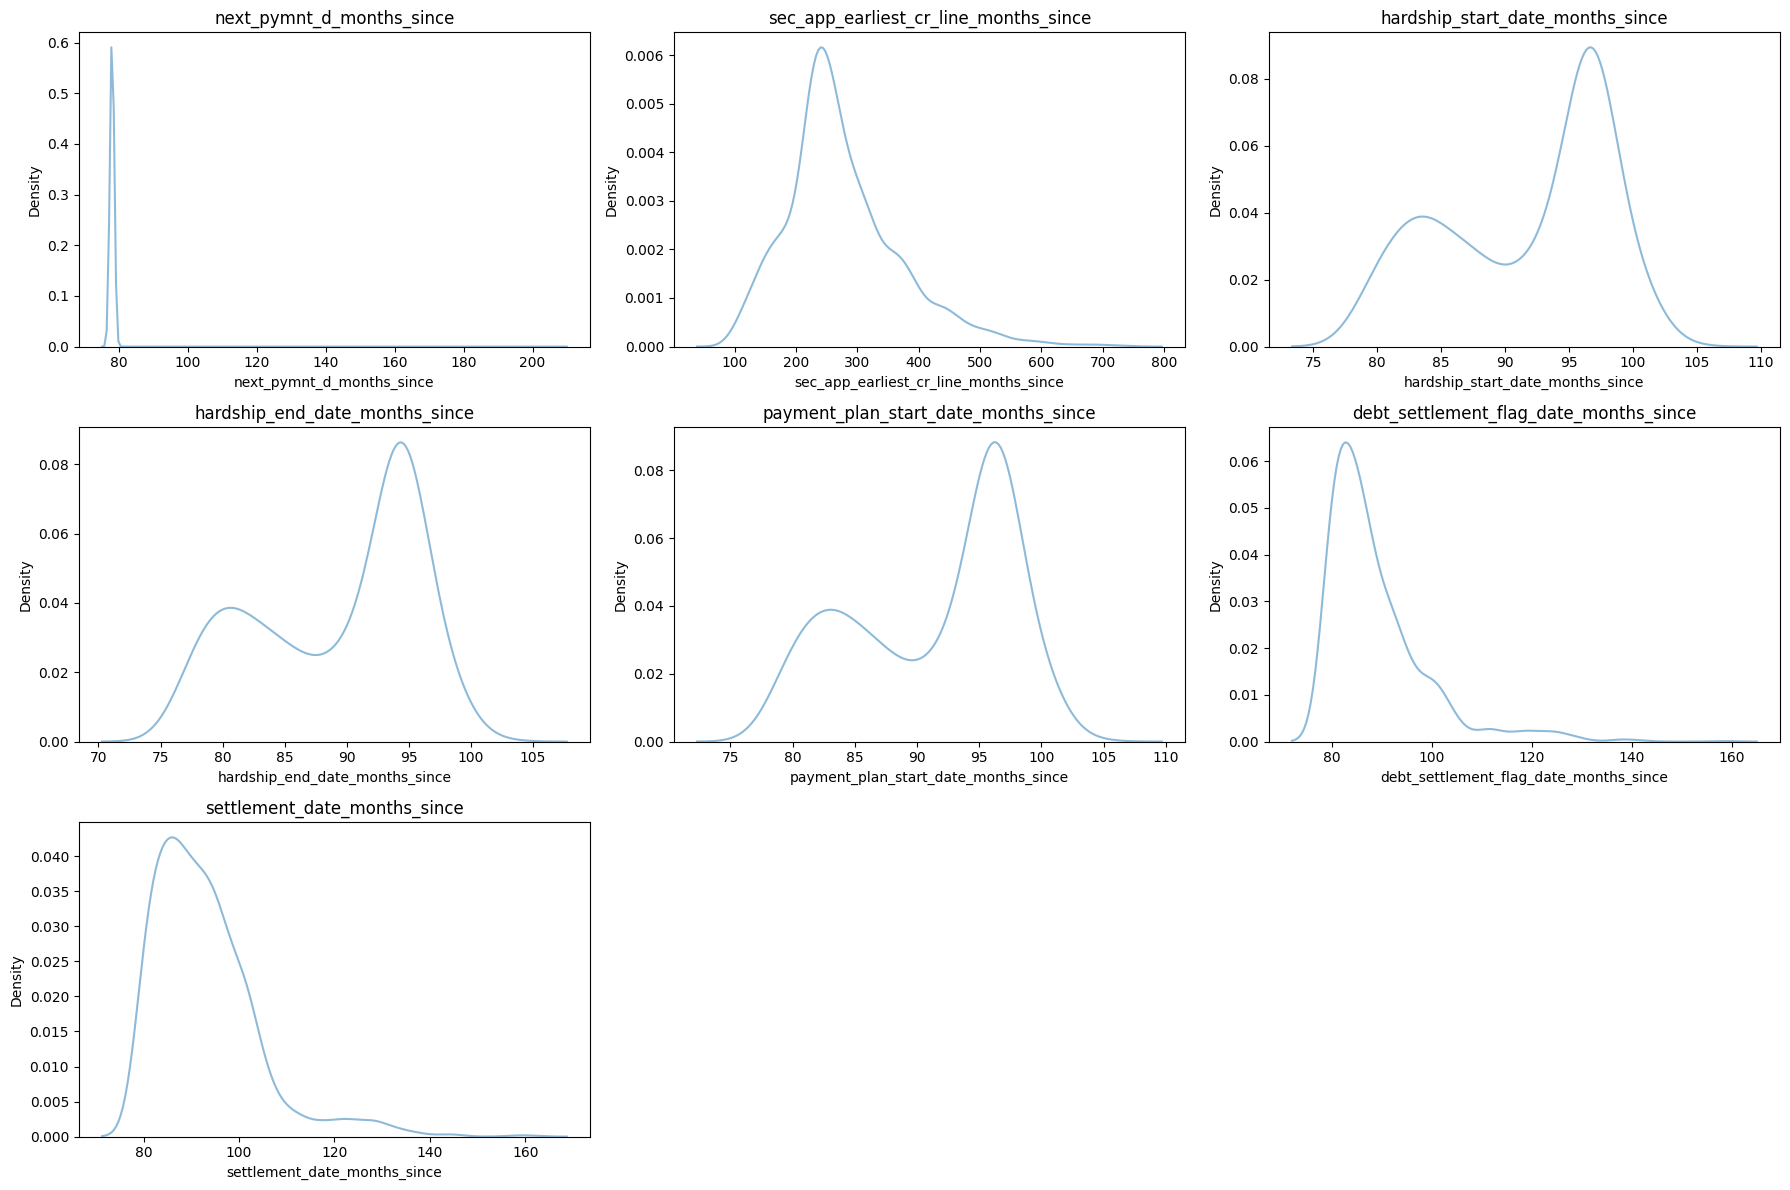

In [129]:
import warnings
import math

warnings.filterwarnings('ignore', category=FutureWarning)

cols_per_row = 3
plots_per_page = 9  # 3 rows × 3 cols per page

total_cols = len(added_cols)
pages = math.ceil(total_cols / plots_per_page)

for page in range(pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, total_cols)
    cols_subset = added_cols[start:end]
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_subset):
        sns.kdeplot(data=sample, x=col, ax=axes[i], alpha=0.5)
        axes[i].set_title(col)
    
    # Remove empty subplots
    for j in range(len(cols_subset), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [130]:
for col in added_cols:
    for cls in [0, 1]:
        X_test.loc[(X_test[col].isnull()) & (y_test == cls), col] = X_train.loc[(X_train[col].notnull()) & (y_train == cls), col].sample(((X_test[col].isnull()) & (y_test == cls)).sum(), random_state=42, replace=True).values
        X_train.loc[(X_train[col].isnull()) & (y_train == cls), col] = X_train.loc[(X_train[col].notnull()) & (y_train == cls), col].sample(((X_train[col].isnull()) & (y_train == cls)).sum(), random_state=42, replace=True).values

In [131]:
for cols in date_cols:
    cat_nan_cols.remove(cols)

In [132]:
cat_nan_cols

['desc',
 'verification_status_joint',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_loan_status',
 'settlement_status']

In [133]:
X_train.drop(columns=['desc'],inplace=True)
X_test.drop(columns=['desc'],inplace=True)

In [134]:
cat_nan_cols.remove('desc')

In [135]:
X_train[cat_nan_cols].isnull().sum()

verification_status_joint    1608710
hardship_type                1687282
hardship_reason              1687282
hardship_status              1687282
hardship_loan_status         1687282
settlement_status            1669849
dtype: int64

In [136]:
for col in cat_nan_cols:
    X_train[col]=X_train[col].fillna('unknown')
    X_test[col]=X_test[col].fillna('unknown')

In [137]:
X_train[cat_nan_cols].isnull().sum()

verification_status_joint    0
hardship_type                0
hardship_reason              0
hardship_status              0
hardship_loan_status         0
settlement_status            0
dtype: int64

In [138]:
X_test[cat_nan_cols].isnull().sum()

verification_status_joint    0
hardship_type                0
hardship_reason              0
hardship_status              0
hardship_loan_status         0
settlement_status            0
dtype: int64

In [139]:
X_train.head()

loan_amnt        term   int_rate grade sub_grade  \
1404536    28200.0   36 months   8.190000     a        a4   
1686385    22950.0   60 months  13.490000     c        c2   
1919294    20000.0   36 months   7.900000     a        a4   
749681     10000.0   60 months  16.910000     c        c5   
869087     16000.0   60 months  18.940001     d        d2   

                            emp_title home_ownership  annual_inc  \
1404536             logistics manager           rent    185000.0   
1686385  pyshiatric nurse pratitioner       mortgage    125000.0   
1919294             desert west obgyn       mortgage     80000.0   
749681                        teacher           rent     52800.0   
869087                   electrician        mortgage     62400.0   

        verification_status   issue_d  ... settlement_date_missing  \
1404536     source verified  nov-2018  ...                       1   
1686385            verified  mar-2017  ...                       1   
1919294        not verified  jul-2012  ...                       1   
749681      source verified  sep-2018  ...                       1   
869087      source verified  jul-2018  ...                       1   

        settlement_percentage_missing settlement_term_missing  \
1404536                             1                       1   
1686385                             1                       1   
1919294                             1                       1   
749681                              1                       1   
869087                              1                       1   

        next_pymnt_d_months_since sec_app_earliest_cr_line_months_since  \
1404536                      78.0                                 351.0   
1686385                      78.0                                 413.0   
1919294                      78.0                                 471.0   
749681                       78.0                                 267.0   
869087                       78.0                                 250.0   

         hardship_start_date_months_since  hardship_end_date_months_since  \
1404536                              90.0                            87.0   
1686385                              97.0                            94.0   
1919294                              96.0                            93.0   
749681                               96.0                            94.0   
869087                               84.0                            82.0   

         payment_plan_start_date_months_since  \
1404536                                  90.0   
1686385                                  96.0   
1919294                                  95.0   
749681                                   96.0   
869087                                   84.0   

         debt_settlement_flag_date_months_since  settlement_date_months_since  
1404536                                    89.0                          89.0  
1686385                                    91.0                          91.0  
1919294                                    82.0                          82.0  
749681                                     89.0                          89.0  
869087                                     86.0                          86.0  

[5 rows x 171 columns]

In [140]:
total_num = X_train.select_dtypes(include=['int64', 'float32', 'float64']).columns.tolist()

# Categorical columns (objects, strings, categories, etc.)
total_cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [141]:
len(total_cat)

23

In [142]:
len(total_num)

148

In [143]:
for col in total_cat:
    print(X_train[col].value_counts())
    print('**************************')
    print(X_test[col].value_counts())
    print('**************************')
    print('**************************')

term
36 months    1207042
60 months     488459
Name: count, dtype: int64
**************************
term
36 months    402712
60 months    162455
Name: count, dtype: int64
**************************
**************************
grade
b    497437
c    487602
a    324582
d    243437
e    101795
f     31471
g      9177
Name: count, dtype: int64
**************************
grade
b    166120
c    162451
a    108445
d     80987
e     33844
f     10329
g      2991
Name: count, dtype: int64
**************************
**************************
sub_grade
c1    109275
b5    104968
b4    104778
b3     98721
c2     98428
c3     97030
c4     95232
b2     95062
b1     93908
c5     87637
a5     80658
a4     71802
a1     65111
d1     61436
a3     54865
d2     54464
a2     52146
d3     48765
d4     42647
d5     36125
e1     25178
e2     22589
e3     20033
e5     17005
e4     16990
f1     10059
f2      7024
f3      5872
f4      4601
f5      3915
g1      3072
g2      2028
g3      1563
g4      1322
g5      11

In [144]:
#Extract no. of months from issue_d
#Convert emp_title into simple groups (like education etc.)
#Extract meaningful information from title
#See what can you do with loan status otherwise drop it

In [145]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'], format='%b-%Y')
X_test['issue_d'] = pd.to_datetime(X_test['issue_d'], format='%b-%Y')

X_train['months_since_issue'] = (pd.to_datetime('today') - X_train['issue_d']).dt.days // 30
X_test['months_since_issue'] = (pd.to_datetime('today') - X_test['issue_d']).dt.days // 30

X_train.drop(columns=['issue_d'],inplace=True)
X_test.drop(columns=['issue_d'],inplace=True)

total_num.append('months_since_issue')
total_cat.remove('issue_d')

/tmp/ipykernel_19/3233598109.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['months_since_issue'] = (pd.to_datetime('today') - X_train['issue_d']).dt.days // 30
/tmp/ipykernel_19/3233598109.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['months_since_issue'] = (pd.to_datetime('today') - X_test['issue_d']).dt.days // 30


In [146]:
sample=X_train.sample(100000,random_state=42)

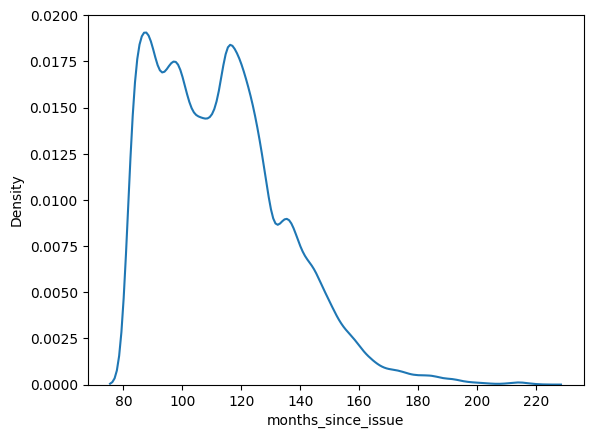

In [147]:
sns.kdeplot(data=sample,x='months_since_issue')
plt.show()

In [148]:
X_train.drop(columns='url',inplace=True)
X_test.drop(columns='url',inplace=True)

In [149]:
print(len(list(X_train['emp_title'].unique())))
print(len(list(X_test['emp_title'].unique())))

352442
149508


In [150]:
X_train=X_train.drop(columns=['emp_title','title'])
X_test=X_test.drop(columns=['emp_title','title'])

In [151]:
total_cat.remove('emp_title')
total_cat.remove('title')

In [152]:
total_cat.remove('url')

In [153]:
# lowercase state mapping
us_state_map = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia'
}

# Replace abbreviations with full names
X_train['addr_state'] = X_train['addr_state'].map(us_state_map)
X_test['addr_state'] = X_test['addr_state'].map(us_state_map)

In [154]:
# Quick check
X_train['addr_state'].value_counts()

addr_state
california              236348
texas                   139789
new york                139640
florida                 121285
illinois                 68548
new jersey               62403
pennsylvania             57692
ohio                     56215
georgia                  55520
virginia                 47046
north carolina           47027
michigan                 44231
arizona                  40345
maryland                 40338
massachusetts            38660
colorado                 36116
washington               35340
minnesota                29589
indiana                  28235
missouri                 27115
connecticut              26900
tennessee                26535
nevada                   24566
wisconsin                22448
south carolina           21109
alabama                  20478
oregon                   20113
louisiana                19316
kentucky                 16505
oklahoma                 15494
kansas                   14408
arkansas                 128

In [155]:
# Quick check
X_test['addr_state'].value_counts()

addr_state
california              78185
new york                46749
texas                   46546
florida                 40706
illinois                22625
new jersey              20729
pennsylvania            19247
ohio                    18917
georgia                 18676
virginia                15908
north carolina          15703
michigan                14539
maryland                13670
arizona                 13432
massachusetts           13124
colorado                12067
washington              11720
minnesota                9928
indiana                  9280
missouri                 8969
tennessee                8948
connecticut              8885
nevada                   8091
wisconsin                7429
south carolina           6894
alabama                  6806
oregon                   6676
louisiana                6443
kentucky                 5382
oklahoma                 5197
kansas                   4701
arkansas                 4259
utah                     3827

In [156]:
total_cat

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'settlement_status']

In [157]:
X_train['term']

1404536     36 months
1686385     60 months
1919294     36 months
749681      60 months
869087      60 months
              ...    
732186      36 months
110268      36 months
1692766     60 months
2229115     36 months
2219141     36 months
Name: term, Length: 1695501, dtype: object

In [158]:
"""def default_rate_by_category(df, col, target='y'):
    
    Maps each category in `col` to its default rate.
    
    df: DataFrame
    col: categorical column name
    target: binary target column (1 = default, 0 = non-default)
    
    # calculate default rate per category
    mapping = df.groupby(col)[target].mean().to_dict()
    
    # create a new column with mapped values
    df[col + '_default_rate'] = df[col].map(mapping)
    
    return df, mapping"""

"def default_rate_by_category(df, col, target='y'):\n    \n    Maps each category in `col` to its default rate.\n    \n    df: DataFrame\n    col: categorical column name\n    target: binary target column (1 = default, 0 = non-default)\n    \n    # calculate default rate per category\n    mapping = df.groupby(col)[target].mean().to_dict()\n    \n    # create a new column with mapped values\n    df[col + '_default_rate'] = df[col].map(mapping)\n    \n    return df, mapping"

In [159]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [160]:
X_train.head()

loan_amnt        term   int_rate grade sub_grade home_ownership  \
1404536    28200.0   36 months   8.190000     a        a4           rent   
1686385    22950.0   60 months  13.490000     c        c2       mortgage   
1919294    20000.0   36 months   7.900000     a        a4       mortgage   
749681     10000.0   60 months  16.910000     c        c5           rent   
869087     16000.0   60 months  18.940001     d        d2       mortgage   

         annual_inc verification_status pymnt_plan             purpose  ...  \
1404536    185000.0     source verified          n  debt_consolidation  ...   
1686385    125000.0            verified          n         credit_card  ...   
1919294     80000.0        not verified          n  debt_consolidation  ...   
749681      52800.0     source verified          n         credit_card  ...   
869087      62400.0     source verified          n  debt_consolidation  ...   

        settlement_term_missing  next_pymnt_d_months_since  \
1404536                       1                       78.0   
1686385                       1                       78.0   
1919294                       1                       78.0   
749681                        1                       78.0   
869087                        1                       78.0   

         sec_app_earliest_cr_line_months_since  \
1404536                                  351.0   
1686385                                  413.0   
1919294                                  471.0   
749681                                   267.0   
869087                                   250.0   

         hardship_start_date_months_since  hardship_end_date_months_since  \
1404536                              90.0                            87.0   
1686385                              97.0                            94.0   
1919294                              96.0                            93.0   
749681                               96.0                            94.0   
869087                               84.0                            82.0   

         payment_plan_start_date_months_since  \
1404536                                  90.0   
1686385                                  96.0   
1919294                                  95.0   
749681                                   96.0   
869087                                   84.0   

         debt_settlement_flag_date_months_since  settlement_date_months_since  \
1404536                                    89.0                          89.0   
1686385                                    91.0                          91.0   
1919294                                    82.0                          82.0   
749681                                     89.0                          89.0   
869087                                     86.0                          86.0   

         months_since_issue  y  
1404536                  83  0  
1686385                 103  0  
1919294                 160  0  
749681                   85  0  
869087                   87  0  

[5 rows x 169 columns]

In [161]:
X_test.head()

loan_amnt        term   int_rate grade sub_grade home_ownership  \
1758074    28000.0   36 months   6.620000     a        a2       mortgage   
686539     10650.0   36 months  25.110001     f        f1       mortgage   
900731     18000.0   36 months  10.910000     b        b4       mortgage   
1727935     3975.0   36 months  17.990000     d        d2            any   
539695      4800.0   36 months  16.020000     c        c5           rent   

         annual_inc verification_status pymnt_plan             purpose  ...  \
1758074    125000.0            verified          n         credit_card  ...   
686539      83000.0            verified          n  debt_consolidation  ...   
900731     104000.0     source verified          n  debt_consolidation  ...   
1727935     43000.0     source verified          n                 car  ...   
539695      80000.0     source verified          n               other  ...   

        settlement_term_missing  next_pymnt_d_months_since  \
1758074                       1                       78.0   
686539                        1                       78.0   
900731                        1                       78.0   
1727935                       1                       78.0   
539695                        1                       78.0   

         sec_app_earliest_cr_line_months_since  \
1758074                                  351.0   
686539                                   413.0   
900731                                   471.0   
1727935                                  267.0   
539695                                   265.0   

         hardship_start_date_months_since  hardship_end_date_months_since  \
1758074                              90.0                            87.0   
686539                               97.0                            94.0   
900731                               96.0                            93.0   
1727935                              96.0                            94.0   
539695                               84.0                            82.0   

         payment_plan_start_date_months_since  \
1758074                                  90.0   
686539                                   96.0   
900731                                   95.0   
1727935                                  96.0   
539695                                   84.0   

         debt_settlement_flag_date_months_since  settlement_date_months_since  \
1758074                                    89.0                          89.0   
686539                                     91.0                          91.0   
900731                                     82.0                          82.0   
1727935                                    89.0                          89.0   
539695                                     86.0                          86.0   

         months_since_issue  y  
1758074                 143  0  
686539                  113  0  
900731                  100  0  
1727935                 105  0  
539695                   97  0  

[5 rows x 169 columns]

In [162]:
mappings = {}   # store mappings for future use
def_rate_global= X_train['y'].mean()
for col in total_cat:
    # compute default rate per category
    mapping = X_train.groupby(col)['y'].mean().to_dict()
    
    # create new numeric column
    X_train[col + '_default_rate'] = X_train[col].map(mapping)
    X_test[col + '_default_rate'] = X_test[col].map(mapping).fillna(def_rate_global)
    
    # save mapping
    mappings[col] = mapping

# optionally drop original categorical cols
X_train = X_train.drop(columns=total_cat)
X_test = X_test.drop(columns=total_cat)

In [163]:
X_train.drop(columns=['y'],inplace=True)
X_test.drop(columns=['y'],inplace=True)

In [164]:
X_train.loc[:, X_train.columns.str.endswith('_default_rate')].sample(20)

term_default_rate  grade_default_rate  sub_grade_default_rate  \
51788             0.175806            0.282430                0.283678   
1063292           0.109670            0.086437                0.107919   
2168624           0.109670            0.143927                0.136293   
443227            0.109670            0.086437                0.107919   
761532            0.109670            0.035957                0.054130   
516186            0.109670            0.086437                0.107919   
1648631           0.109670            0.086437                0.107919   
1884003           0.109670            0.035957                0.041197   
2082574           0.109670            0.035957                0.017908   
990782            0.109670            0.035957                0.054130   
776406            0.175806            0.143927                0.160135   
534524            0.109670            0.086437                0.086881   
1214149           0.175806            0.143927                0.160135   
221826            0.175806            0.086437                0.095965   
902248            0.109670            0.035957                0.041197   
1162091           0.109670            0.035957                0.041197   
2175876           0.109670            0.086437                0.086881   
300971            0.175806            0.086437                0.095965   
1721138           0.109670            0.203424                0.187659   
932346            0.175806            0.143927                0.136293   

         home_ownership_default_rate  verification_status_default_rate  \
51788                       0.149961                          0.169206   
1063292                     0.149961                          0.133920   
2168624                     0.128333                          0.169206   
443227                      0.149961                          0.088316   
761532                      0.149961                          0.169206   
516186                      0.111765                          0.088316   
1648631                     0.149961                          0.088316   
1884003                     0.111765                          0.169206   
2082574                     0.149961                          0.088316   
990782                      0.149961                          0.088316   
776406                      0.149961                          0.133920   
534524                      0.149961                          0.133920   
1214149                     0.111765                          0.088316   
221826                      0.111765                          0.169206   
902248                      0.111765                          0.169206   
1162091                     0.111765                          0.133920   
2175876                     0.111765                          0.088316   
300971                      0.111765                          0.088316   
1721138                     0.149961                          0.133920   
932346                      0.128333                          0.169206   

         pymnt_plan_default_rate  purpose_default_rate  \
51788                   0.128493              0.104413   
1063292                 0.128493              0.139213   
2168624                 0.128493              0.129949   
443227                  0.128493              0.104413   
761532                  0.128493              0.104413   
516186                  0.128493              0.104413   
1648631                 0.128493              0.096681   
1884003                 0.128493              0.104413   
2082574                 0.128493              0.129949   
990782                  0.128493              0.104413   
776406                  0.128493              0.104413   
534524                  0.128493              0.139213   
1214149                 0.128493              0.139213   
221826                  0.128493              0.139213   
902248                  0.128

In [165]:
X_train[total_num]

loan_amnt   int_rate  annual_inc        dti  delinq_2yrs  \
1404536    28200.0   8.190000    185000.0  10.220000          0.0   
1686385    22950.0  13.490000    125000.0  22.580000          0.0   
1919294    20000.0   7.900000     80000.0  15.560000          0.0   
749681     10000.0  16.910000     52800.0  27.360001          0.0   
869087     16000.0  18.940001     62400.0   9.250000          0.0   
...            ...        ...         ...        ...          ...   
732186     15000.0   6.970000     55000.0  23.190001          6.0   
110268     35000.0   7.890000    150000.0  13.080000          0.0   
1692766    16000.0  26.240000     80000.0  27.209999          0.0   
2229115     7475.0  13.490000     52000.0  10.480000          0.0   
2219141     4200.0  12.740000     50000.0  12.050000          0.0   

         fico_range_low  inq_last_6mths  mths_since_last_delinq  \
1404536           730.0             0.0                    29.0   
1686385           685.0             0.0                    25.0   
1919294           745.0             0.0                    18.0   
749681            695.0             1.0                    25.0   
869087            680.0             1.0                    30.0   
...                 ...             ...                     ...   
732186            705.0             2.0                    17.0   
110268            720.0             0.0                    12.0   
1692766           700.0             1.0                    44.0   
2229115           760.0             1.0                    47.0   
2219141           705.0             3.0                    43.0   

         mths_since_last_record  open_acc  ...  settlement_percentage_missing  \
1404536                    46.0      12.0  ...                              1   
1686385                    76.0      17.0  ...                              1   
1919294                    79.0      13.0  ...                              1   
749681                     93.0      20.0  ...                              1   
869087                     69.0       4.0  ...                              1   
...                         ...       ...  ...                            ...   
732186                     91.0      16.0  ...                              1   
110268                     87.0       7.0  ...                              1   
1692766                    69.0      22.0  ...                              1   
2229115                    65.0       3.0  ...                              1   
2219141                    57.0      14.0  ...                              1   

         settlement_term_missing  next_pymnt_d_months_since  \
1404536                        1                       78.0   
1686385                        1                       78.0   
1919294                        1                       78.0   
749681                         1                       78.0   
869087                         1                       78.0   
...                          ...                        ...   
732186                         1                       78.0   
110268                         1                       78.0   
1692766                        1                       78.0   
2229115                        1                       78.0   
2219141                        1                       78.0   

         sec_app_earliest_cr_line_months_since  \
1404536                                  351.0   
1686385                                  413.0   
1919294                                  471.0   
749681                                   267.0   
869087                                   250.0   
...                                        ...   
732186                                   298.0   
110268                                   222.0   
1692766                                  195.0   
2229115                                  335.0   
2219141                                  193.0   

         hardship_start_date_months_since  h

In [166]:
"""for cols in total_num:
    if(len(df[cols].unique())<=25):
        print(df[cols].value_counts())
        print('*******************************')"""

"for cols in total_num:\n    if(len(df[cols].unique())<=25):\n        print(df[cols].value_counts())\n        print('*******************************')"

In [167]:
X_train.to_csv('loan_default_train.csv')
X_test.to_csv('loan_default_test.csv')

y_train.to_csv('output_train.csv')
y_test.to_csv('output_test.csv')